# Run the file containing the functions used in this script
## By default this is a file called "Methane_functions.r" in the working directory of this script
## Do NOT change the working directory at any point while using this script.

In [871]:
methaneFunctions<-paste(getwd(),"/Methane_functions.r",sep="")
methaneFunctions
if (file.exists(methaneFunctions)){
    source(methaneFunctions)
} else {
    print("manually correct the location and/or name of Methane_functions.ipynb")
}

[1] "/home/pleocavee/Documents/github/SensorDataProcessing/methane_tests/Methane_functions.ipynb"

[1] TRUE

# Clear session

In [816]:
# ### garbage collection lines ###
# rm(list = ls()) # clear R working memory
# graphics.off() # close any open plots

# Install packages and load from library as necessary

In [1]:
# # Package names
# packages <- c("dplyr", "doBy", "lubridate", "ggplot2", "Hmisc", "zoo", "viridis")

# # Install packages if necessary
# installed_packages <- packages %in% rownames(installed.packages())
# if (any(installed_packages == FALSE)) {
#   install.packages(packages[!installed_packages])
# }

# # Load packages
# invisible(lapply(packages, library, character.only = TRUE))

# Define all the functions used

## Function to delete a file if it exists

In [818]:
# # check if file at path exists, delete if it does
# # will only call in functions that generate new files
# cleanFile<-function(path){
#   if(file.exists(path)){
#     cat(sprintf("Deleting old file: %s\n",path))
#     file.remove(path)
#   }
# }

## Function to create a new directory if it does not exist

In [819]:
# # check if directory exists, create if not
# newDir<-function(dirPath){
#   if(dir.exists(dirPath)){
#     cat(sprintf("Output directory, %s, already exists\n", dirPath))
#   }
#   else{
#     cat(sprintf("Output directory not found, creating: %s\n",dirPath))
#     dir.create(dirPath)
#   }
# }

## Function to save a list of plots

In [820]:
# #input list of plots, output directory, custom directory path or tag
# #output save each plot to output directory
# #800 is a little over 5" on my screen at 1920x1080
# savePlotList<-function(plotList, tag="", width=800, height=800, od=outputDir){
#   plots<-names(plotList)
#   for(i in 1:length(plots)){
#     pngPath = paste(sep="", od, tag, plots[i], ".png")
#     png(file=pngPath, width=width, height=height)
#     print(plotList[[ plots[i] ]])
#     dev.off()
#   }
# }

## Function to save a list of list of plots

In [821]:
# savePlotListList<-function(pll, tag="", width=800, height=800, od=outputDir){
#     for(i in 1:length(pll)){
#         savePlotList(pll[[i]], od, tag=paste(tag,names(pll[i]),"_",sep=""), width=width, height=height)
#     }
# }

## Function for concatenating .CSV files larger than 300 bytes within one project folder and subfolders and removing debug lines

In [822]:
# concat_run<-function(directory){
#     #define custom call to read.csv and remove debug lines & where logger is not populated
#     readCSV<-function(filePath){
#         fileData<-read.csv(filePath,header=TRUE)
#         fileData<-subset(fileData, type!="debug" & !is.na(logger))
#     }
    
#     #list all .CSV in folders and subfolders
#     wb_files<-list.files(path=directory, recursive=TRUE, pattern="*.CSV$", full.names=TRUE)
    
#     #subset files larger than 500 bytes
#     wb_files<-subset(wb_files, file.info(wb_files)[,1]>300)
    
#     #read each file and output a single dataframe
#     data<-do.call(rbind, lapply(wb_files,readCSV))
#     return(data)
# }

## Function to process column data types

In [823]:
# process_rriv_columns<-function(df){
#     df$type<-as.factor(df$type)
#     df$site<-as.factor(df$site)
#     df$logger<-as.factor(df$logger)
#     df$deployment<-as.factor(df$deployment)
#     df$deployed_at<-as.integer(df$deployed_at)
#     df$uuid<-as.factor(df$uuid)
#     df$time.s<-as.numeric(df$time.s)
#     df$time.h<-lubridate::as_datetime(df$time.h)
    
#     cols<-names(df)
#     if("measurementCycle" %in% cols & "burstCycle" %in% cols){
#         df$measurementCycle<-as.numeric(df$measurementCycle)
#         df$burstCycle<-as.factor(df$burstCycle)
#     }
    
#     ##hardcoded, but could be all columns between time.h and user_note? or measurementCycle when included
#     df$battery.V<-as.numeric(df$battery.V)
#     df$dht_C<-as.numeric(df$dht_C)
#     df$dht_RH<-as.numeric(df$dht_RH)
    
#     if("atlas_CO2_ppm" %in% cols){
#         df$atlas_CO2_ppm<-as.numeric(df$atlas_CO2_ppm)
#     }
    
#     df$ch4rf_raw<-as.numeric(df$ch4rf_raw)
#     df$ch4rf_cal<-as.numeric(df$ch4rf_cal)
#     df$ch4_raw<-as.numeric(df$ch4_raw)
#     df$ch4_cal<-as.numeric(df$ch4_cal)
    
#     return(df)
# }

## Function that parses through the data and assigns a burst number and then counts each measurement in a burst. (Data will eventually have measurementCycle and burstCycle natively)

In [824]:
# parse_data<-function(df,burst_interval_threshold,measure_cycle_size){
#     #check if measurementCycle and burstCycle already present in data:
#     cols<-names(df)
#     if("measurementCycle" %in% cols & "burstCycle" %in% cols){
#         return(df)
#     }
    
#     df$interval<-df$time.s-Lag(df$time.s,shift=1)

#     measurementCycle<-1
#     burstCycle<-1
#     reading<-1
#     df$measurementCycle<-1
#     df$burstCycle<-1
#     df$reading<-1
#     comp_rows<-nrow(df)
    
#     for(i in 1:comp_rows){
#         if(!is.na(df$interval[i])){
#             if(df$interval[i]>burst_interval_threshold){
#                 burstCycle<-burstCycle+1
#                 reading<-1
#                 df$burstCycle[i:comp_rows]<-burstCycle
#                 df$reading[i]<-reading
#             }else{
#                 df$reading[i]<-reading
#                 reading<-reading+1
#             }
#             if(burstCycle == measure_cycle_size){
#                 measurementCycle<-measurementCycle+1
#                 df$measurementCycle[i:comp_rows]<-measurementCycle
#                 burstCycle<-0
#             }            
#         }
#     }
#     df$burstCycle<-as.factor(df$burstCycle)
# #     df$measurementCycle<-as.factor(df$measurementCycle)
#     return(df)
# }

## Function to process each logger individually and output single dataframe

In [825]:
# parseIndividualLoggers<-function(df, ll=loggerList, lc=loggerCount){
#     loggerDataList<-vector("list", lc) #empty list to hold temporary data frames
    
#     #subset each logger's data and parse
#     for(i in 1:lc){
#         loggerDataList[[i]]<-parse_data(subset(df, logger==ll[i]), 30, 30)
#     }
#     return(bind_rows(loggerDataList))
# }

## Function to create basic plots of burst vs raw methane reading colored by measurement cycle

In [826]:
# cycleVsCH4_plots<-function(processed_data, dataType, lc=loggerCount, ll=loggerList){
#     plots<-vector("list", lc)
#     names(plots)<-ll
#     for(i in 1:lc){
#         data<-subset(processed_data, logger==ll[i] & type==dataType)

#         plots[[i]]<-ggplot(data, aes(burstCycle, ch4_raw))+
#             geom_point(aes(color=measurementCycle))+scale_color_viridis()+
#             ggtitle(paste("Logger: ", ll[i], "\nData type: ", dataType))
#     }
#     return(plots)
# }

## Function to calculate rolling CV for warm-up detection
Starting with using the summary data for calculations

In [827]:
# calculateCV<-function(processed_data, dataType, lc=loggerCount, ll=loggerList){
#     temp_cv<-data.frame()
#     calculated_cv_list<-vector("list", lc)
#     for(i in 1:lc){
#         df<-subset(processed_data, logger==ll[i] & type==dataType)

#         measurementCycles<-unique(df$measurementCycle)
#         for(i in 1:length(measurementCycles)){
#             temp<-subset(df,measurementCycle==measurementCycles[i])
#             temp$roll_mean<-rollapply(data=temp$ch4_raw,width=4,align=c("right"),FUN=mean,fill=NA)
#             temp$roll_sd<-rollapply(data=temp$ch4_raw,width=4,align=c("right"),FUN=sd,fill=NA)
#             temp$roll_cv<-temp$roll_sd/temp$roll_mean #optionally multiply by 100 for %
#             temp_cv<-bind_rows(temp_cv,temp)
#         }
#         calculated_cv_list[[i]]<-temp_cv
#     }
#     return(bind_rows(calculated_cv_list))
# }

## Function to save a dataframe as an rds

In [828]:
# saveDFrds<-function(inputDF, od=outputDir){
#     dfName<-substitute(inputDF)
#     outputPath<-paste(od,dfName,".rds",sep="")
#     print(outputPath)
#     saveRDS(inputDF, outputPath)
# }

## Function to save a dataframe as a csv

In [829]:
# saveDFcsv<-function(inputDF, tag="", od=outputDir){
#     dfName<-substitute(inputDF)
#     outputPath<-paste(od,dfName,"_",tag,".csv",sep="")
#     print(outputPath)
#     write.csv(inputDF, outputPath)
# }

## Function to plot rolling cv vs burst cycle and colored by measurement cycle

In [830]:
# rollCV_plots<-function(parseDataCV, ll=loggerList, lc=loggerCount){
#     plots<-vector("list", lc)
#     names(plots)<-ll
#     for(i in 1:lc){
#         data<-subset(parseDataCV, logger==ll[i])
#         plots[[i]]<-ggplot(data, aes(burstCycle, roll_cv))+
#         geom_point(aes(color=as.integer(measurementCycle)))+
#         scale_y_log10()+scale_color_viridis()+
#         ggtitle(paste("Rolling CV for Logger: ",ll[i]))
#     }
#     return(plots)
# }

# Initial Setup

## Define location of data

In [831]:
#directory<-"/Users/jhosen/Library/CloudStorage/GoogleDrive-jakehosen@gmail.com/My Drive/WaterBear/CH4DHT22/20221110_pull/bin"
# directory<-"~/Desktop/data/mesoBinTests/20221110_pull"
# directory<-"~/Desktop/data/mesoBinTests/20221118_pull"
# directory<-"~/Desktop/data/mesoBinTests/20221127_pull"
# directory<-"~/Desktop/data/mesoBinTests/20221205_pull"
# directory<-"~/Desktop/data/mesoBinTests/20221214_pull"
# directory<-"~/Desktop/data/mesoBinTests/20221216_Experiment/RRIV"
# directory<-"~/Desktop/data/mesoBinTests//20230106_pull"
# directory<-"~/Desktop/data/mesoBinTests/20230111_floatingbucket"
# directory<-"~/Desktop/data/20230111_bench"

# directory<-"~/Desktop/data/mesoBinTests/20230118_floatingbucket/RRIV" #didn't have enough data here
# directory<-"~/Desktop/data/mesoBinTests/20230119_floatingbucket/RRIV"
# directory<-"~/Desktop/data/mesoBinTests/20230126_floatingbucket/RRIV"

# directory<-"~/Desktop/data/mesoBinTests/20230201_pull"
# directory<-"~/Desktop/data/mesoBinTests/20230203_pull"

## V0 tests with gas analyzer
# directory<-"~/Desktop/data/Methane Calibration/V0_tests/20230202_calibration_70F/RRIV"
# directory<-"~/Desktop/data/Methane Calibration/V0_tests/20230203_calibration_4C/RRIV"
# directory<-"~/Desktop/data/Methane Calibration/V0_tests/20230206_calibration_room/RRIV"
# directory<-"~/Desktop/data/Methane Calibration/V0_tests/20230207_calibration_93F/RRIV"
# directory<-"~/Desktop/data/Methane Calibration/V0_tests/20230209_cal_ignore_roomAir/RRIV"
# directory<-"~/Desktop/data/Methane Calibration/V0_tests/20230210_calibration_roomAir/RRIV"

## concentration tests with gas samples for GC
directory<-"~/Desktop/data/Methane Calibration/concentration_tests/20230220_1000ppm_20230221_1210/RRIV"
# directory<-"~/Desktop/data/Methane Calibration/concentration_tests/20230221_100ppm_20230222_1330/RRIV"
# directory<-"~/Desktop/data/Methane Calibration/concentration_tests/20230222_20ppm_20230223_1130/RRIV"
# directory<-"~/Desktop/data/Methane Calibration/concentration_tests/20230223_10ppm_202230224_1139/RRIV"
# directory<-"~/Desktop/data/Methane Calibration/concentration_tests/20230224_5ppm_20230225_1150/RRIV"
# directory<-"~/Desktop/data/Methane Calibration/concentration_tests/20230225_1000ppm_20230227_1115/RRIV"

## dissipation test preliminary pull
# directory<-"/home/pleocavee/Desktop/data/Methane Calibration/20230227_1000ppm_2ppm_dissipation/RRIV"



## TODO: detect presence of Gas Analyzer, RRIV, GC folders

## Create global variable directory for outputs based on data directory

In [832]:
outputDir<-paste(directory,"_output/",sep="")
newDir(outputDir)

Output directory, ~/Desktop/data/mesoBinTests/20230220_1000ppm_20230221_1210/RRIV_output/, already exists


## Import experiment data into a dataframe and process its columns

In [833]:
# comp_data<-concat_run(directory)
comp_data<-concat_dirs(directory, read_rriv_CSV, minFileSize=300)
comp_data<-process_columns(comp_data)
# TODO: count NAs in each column for error checking?

In [834]:
head(comp_data)

type site logger deployment                                   deployed_at
8  raw  C1   21010  calCH001-57FF70068387575129270167-1676933668 1676933668 
15 raw  C1   21010  calCH001-57FF70068387575129270167-1676933668 1676933668 
22 raw  C1   21010  calCH001-57FF70068387575129270167-1676933668 1676933668 
29 raw  C1   21010  calCH001-57FF70068387575129270167-1676933668 1676933668 
36 raw  C1   21010  calCH001-57FF70068387575129270167-1676933668 1676933668 
43 raw  C1   21010  calCH001-57FF70068387575129270167-1676933668 1676933668 
   uuid                     time.s     time.h              battery.V
8  57FF70068387575129270167 1676934004 2023-02-20 23:00:04 1305     
15 57FF70068387575129270167 1676934006 2023-02-20 23:00:06 1501     
22 57FF70068387575129270167 1676934009 2023-02-20 23:00:08 1363     
29 57FF70068387575129270167 1676934011 2023-02-20 23:00:11 1270     
36 57FF70068387575129270167 1676934014 2023-02-20 23:00:13 1180     
43 57FF70068387575129270167 1676934016 2023-02-20 23:00:16 1184     
   measurementCycle burstCycle dht_C dht_RH ch4rf_raw ch4rf_cal ch4_raw ch4_cal
8  1                1          20.8  17.7   1866      0          551    0      
15 1                1          20.8  17.7   1867      0         2316    0      
22 1                1          20.8  17.7   1866      0         1473    0      
29 1                1          20.8  17.7   1866      0         1171    0      
36 1                1          20.8  17.7   1869      0         1039    0      
43 1                1          20.7  19.1   1867      0          983    0      
   user_note user_value
8  NA        NA        
15 NA        NA        
22 NA        NA        
29 NA        NA        
36 NA        NA        
43 NA        NA

## Process data and global create variables for use later

In [835]:
loggerList<-unique(comp_data$logger) #save each individual logger
loggerList

loggerCount<-length(loggerList) #how many loggers
loggerCount

#for measurementCycle and burstCycle, not necessary with updated code
processed_data<-parseIndividualLoggers(comp_data)

[1] 21010 21011 kcdev 21012 21013 21001
Levels: 21001 21010 21011 21012 21013 kcdev

[1] 6

## Specific processing depending on data

In [836]:
# This data had a timestamp issue on measurement cycle 51 to 52, first change in day from 12-01 to 12-02, for all data loggers
# add 1 day's worth of seconds to all data after that point to correct (1*24*60*60)
if(basename(directory)=="20221205_pull"){
    processed_data$time.s<-ifelse(processed_data$measurementCycle>51, processed_data$time.s+86400, processed_data$time.s)
    processed_data$time.h<-lubridate::as_datetime(processed_data$time.s)
}

## Save processed dataframe as .rds to output folder

In [837]:
saveDFrds(processed_data)
saveDFcsv(processed_data)

[1] "~/Desktop/data/mesoBinTests/20230220_1000ppm_20230221_1210/RRIV_output/processed_data.rds"
[1] "~/Desktop/data/mesoBinTests/20230220_1000ppm_20230221_1210/RRIV_output/processed_data_.csv"


### Create plots of raw data and summary data and save them

In [838]:
raw_cycleVsCH4_plots<-cycleVsCH4_plots(processed_data, "raw")
summary_cycleVsCH4_plots<-cycleVsCH4_plots(processed_data, "summary")

savePlotList(raw_cycleVsCH4_plots, "raw_cycleVsCH4_")
savePlotList(summary_cycleVsCH4_plots, "summary_cycleVsCH4_")

In [839]:
# class(raw_cycleVsCH4_plots)
# raw_cycleVsCH4_plots[1]

In [840]:
# tail(processed_data)

In [841]:
# range(processed_data$time.h)
# # # subset_pd<-processed_data[processed_data$time.h > "2023-02-02 16:00",]
# # # range(subset_pd$time.h)

# # # ggplot(processed_data,aes(x=time.h,y=dht_C))+geom_point()

# # ggplot(processed_data[processed_data$time.h > "2023-02-02 16:00",],aes(x=time.h,y=dht_C))+geom_point()

# # ggplot(processed_data[processed_data$time.h > "2023-02-03",],aes(x=time.h,y=dht_C))+geom_point()

# startTime<-"2023-02-21 11:00:00 UTC"

# ggplot(summary_processed_data[summary_processed_data$time.h > startTime,],aes(x=time.h,y=dht_C,color=site))+geom_point()

# ggplot(summary_processed_data[summary_processed_data$time.h > startTime,],aes(x=time.h,y=dht_RH,color=site))+geom_point()

# ggplot(summary_processed_data[summary_processed_data$time.h > startTime,],aes(x=time.h,y=ch4_raw,color=site))+geom_point()

# # ggplot(raw_processed_data[raw_processed_data$time.h > startTime,],aes(x=time.h,y=dht_C,color=site))+geom_point()

# # ggplot(raw_processed_data[raw_processed_data$time.h > startTime,],aes(x=time.h,y=dht_RH,color=site))+geom_point()

# # ggplot(raw_processed_data[raw_processed_data$time.h > startTime,],aes(x=time.h,y=ch4_raw,color=site))+geom_point()

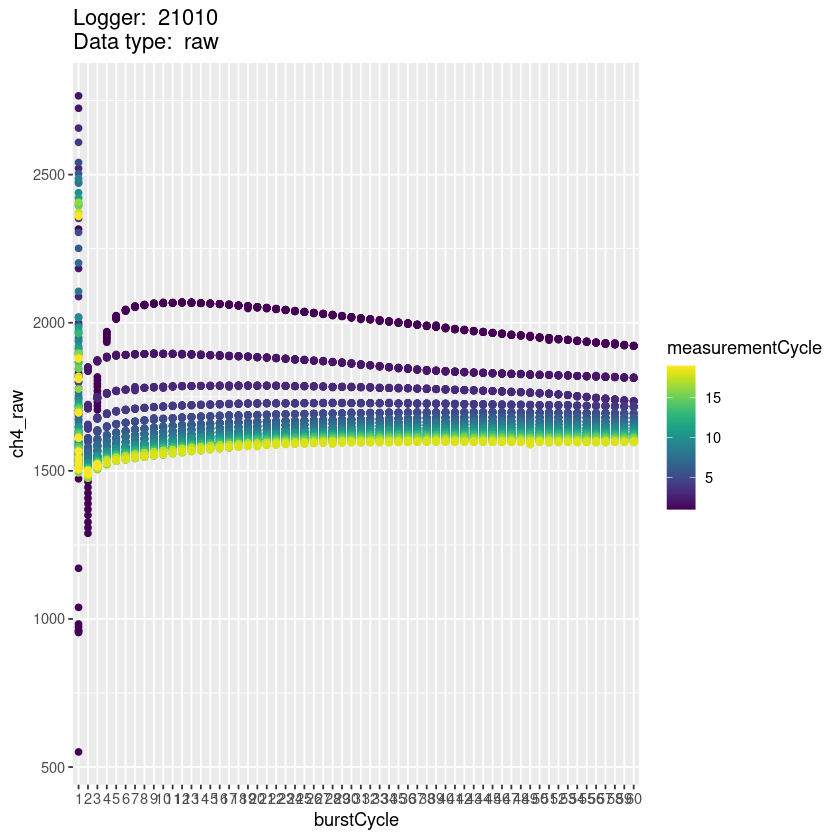

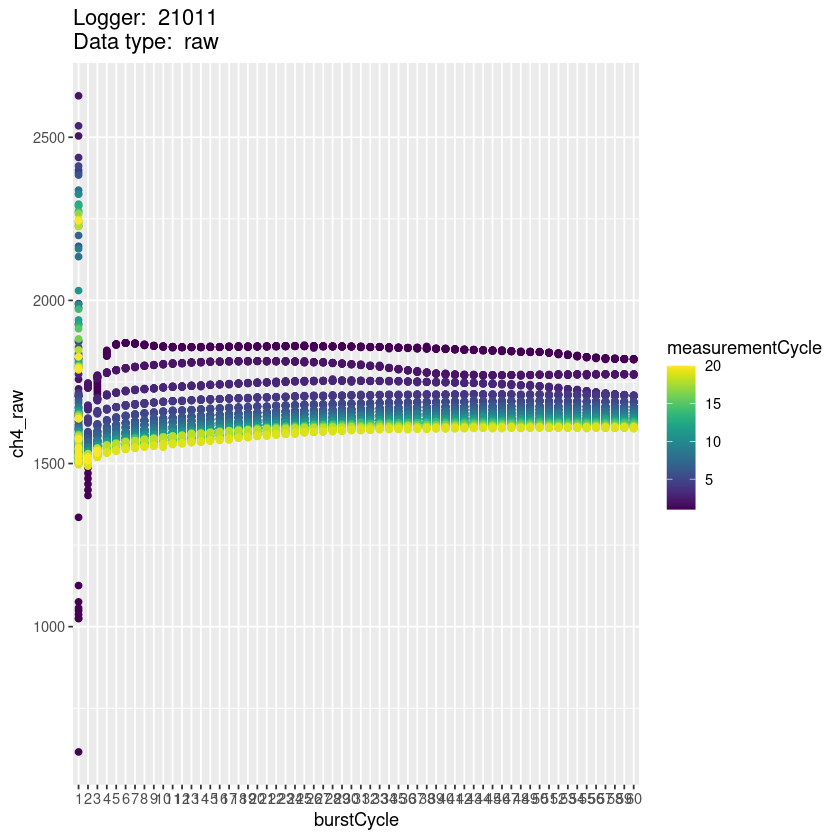

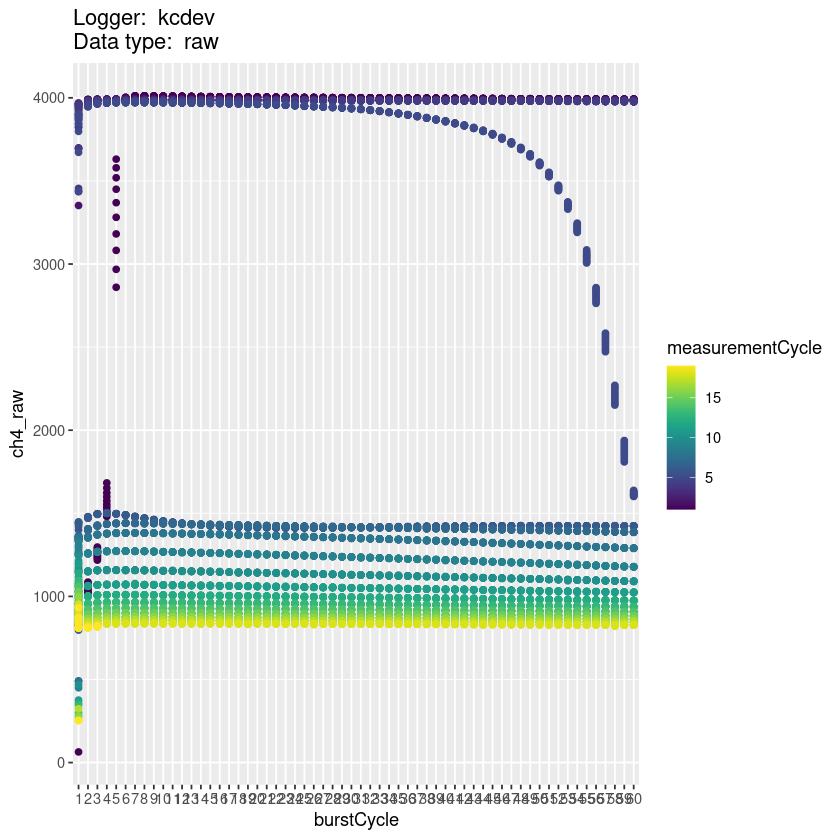

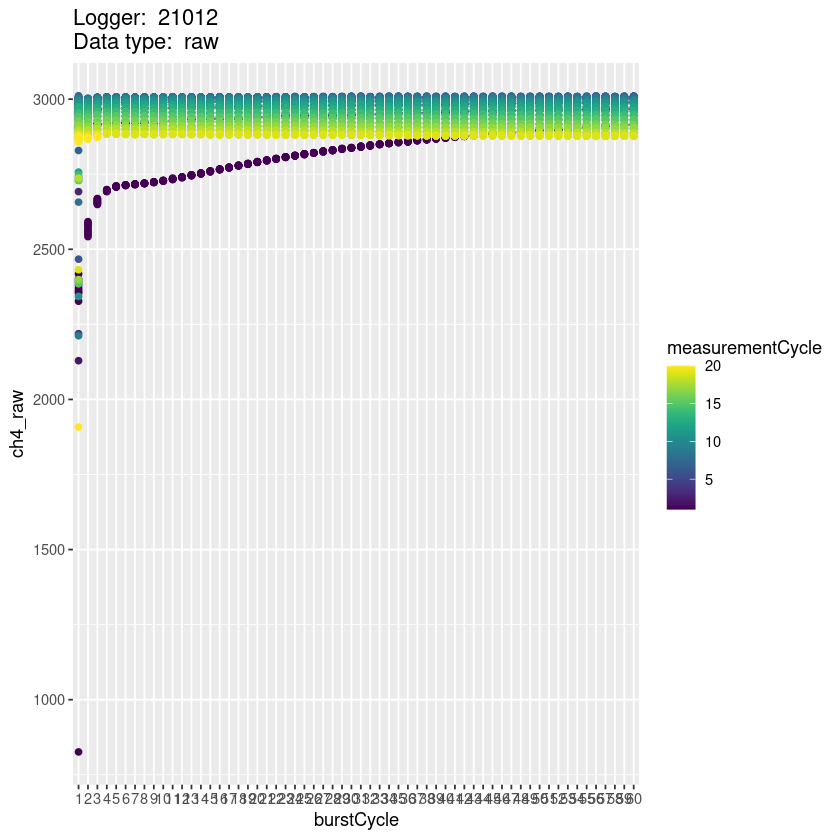

$`21010`

$`21011`

$kcdev

$`21012`

$`21013`

$`21001`


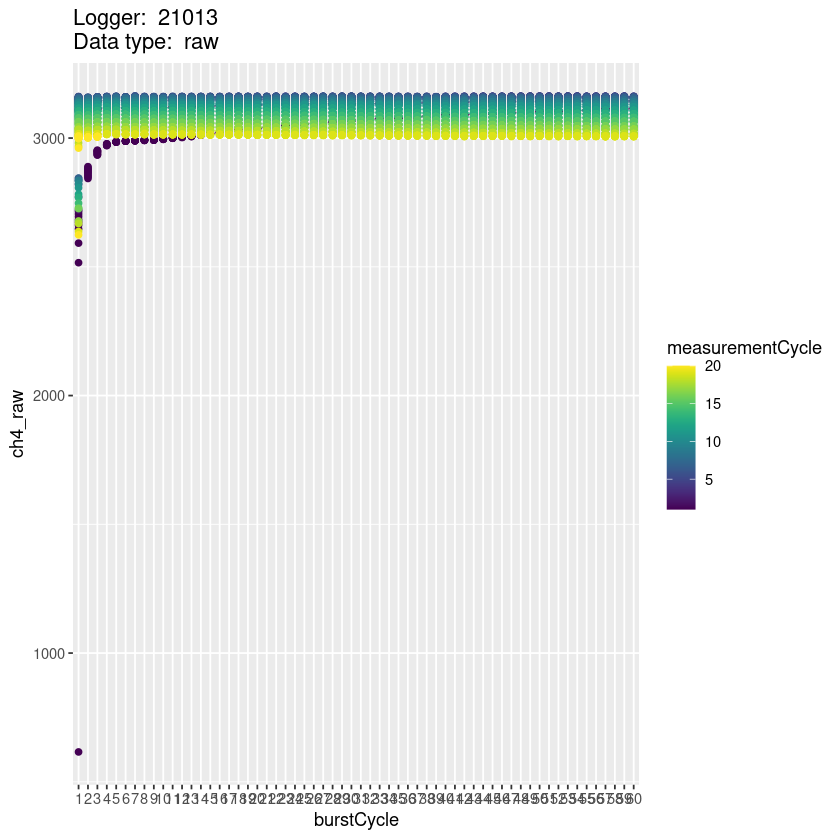

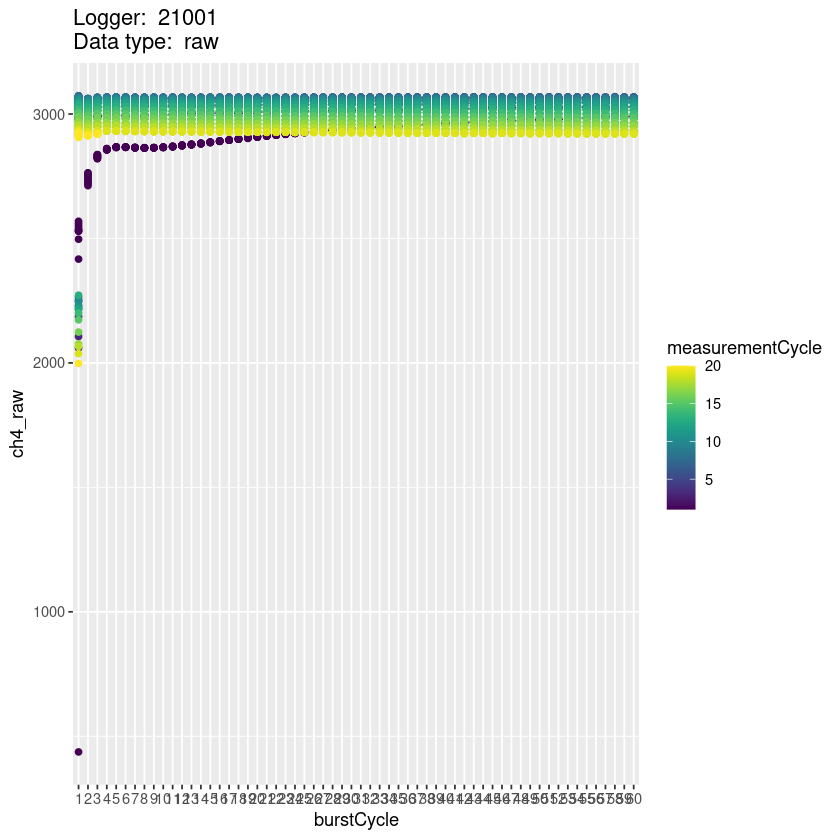

In [842]:
raw_cycleVsCH4_plots

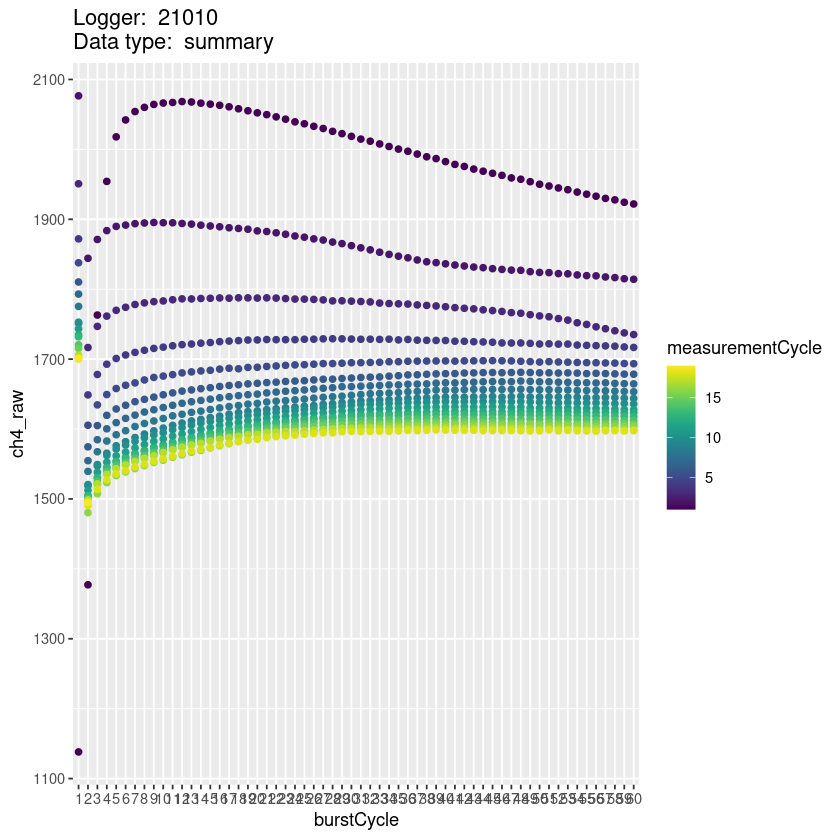

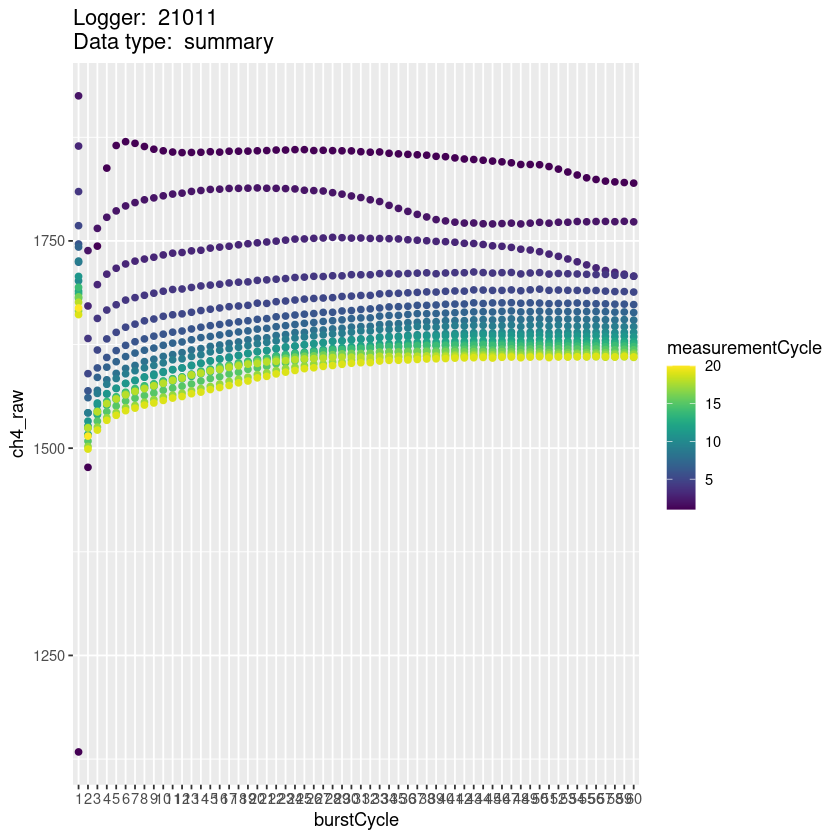

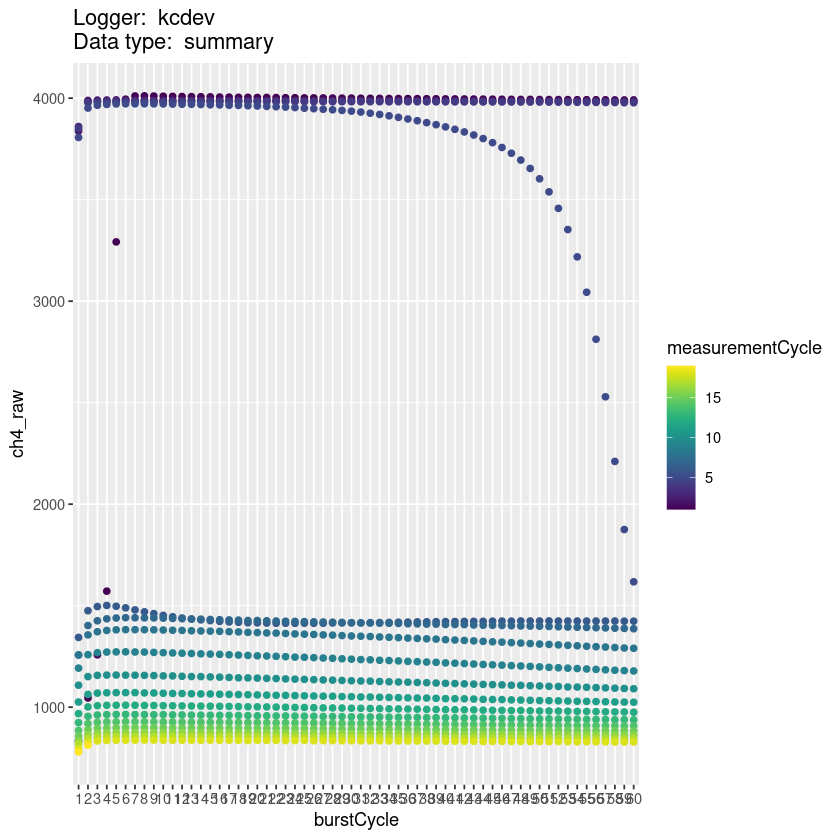

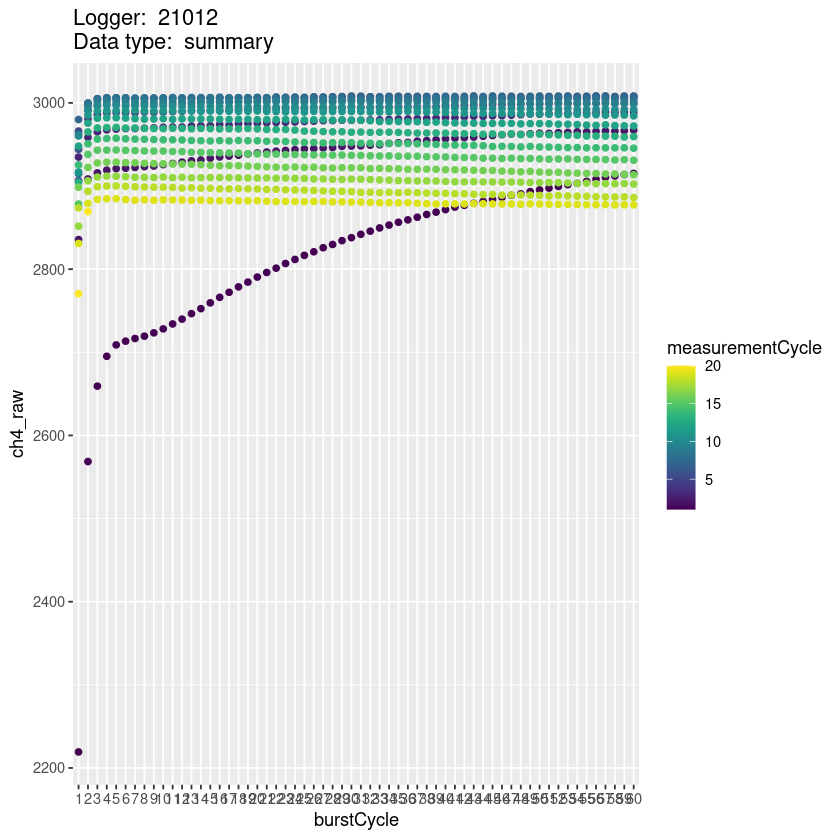

$`21010`

$`21011`

$kcdev

$`21012`

$`21013`

$`21001`


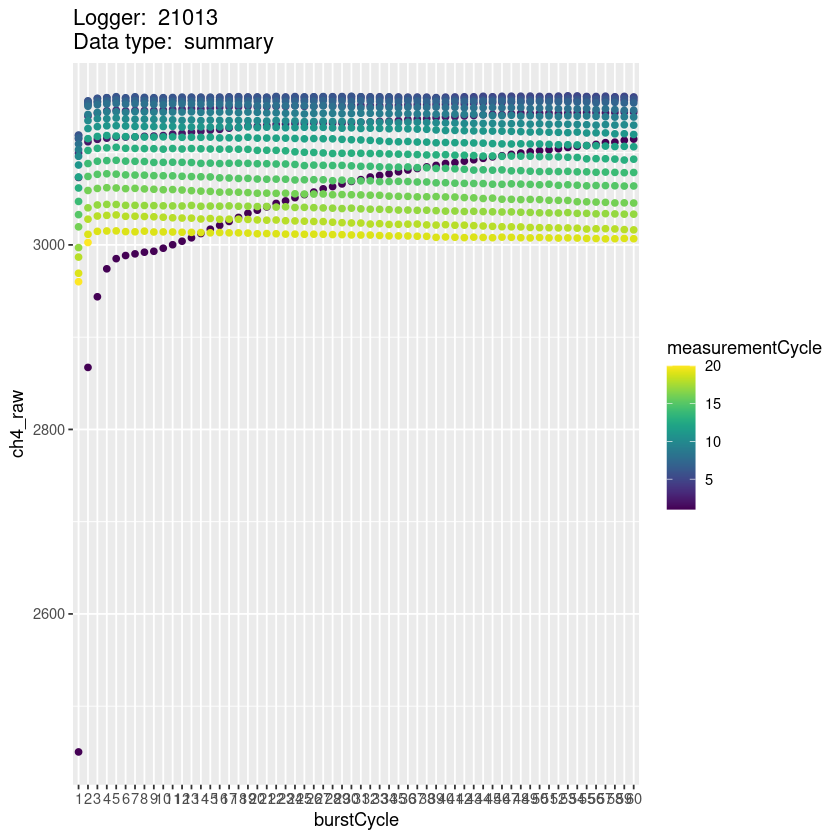

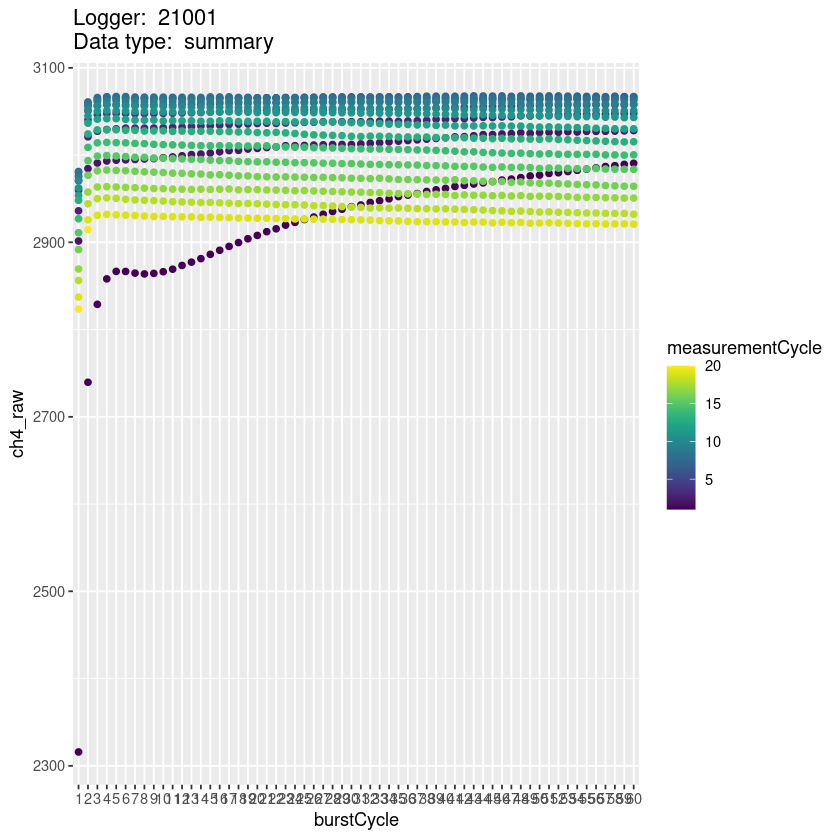

In [843]:
summary_cycleVsCH4_plots

#### Note: you can modify plots after the fact:

In [844]:
#plots[["21003"]]+ggtitle("Overwrite")

#### Save the final processed dataframe to RDS file

In [845]:
parseSummaryDataCV<-calculateCV(processed_data, "summary")

saveDFrds(parseSummaryDataCV)
saveDFcsv(parseSummaryDataCV)

[1] "~/Desktop/data/mesoBinTests/20230220_1000ppm_20230221_1210/RRIV_output/parseSummaryDataCV.rds"
[1] "~/Desktop/data/mesoBinTests/20230220_1000ppm_20230221_1210/RRIV_output/parseSummaryDataCV_.csv"


### Create rolling cv plots and save them

Warning message:
“Removed 112 rows containing missing values (geom_point).”
Warning message:
“Removed 118 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 112 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 59 rows containing missing values (geom_point).”
Warning message:
“Removed 59 rows containing missing values (geom_point).”
Warning message:
“Removed 59 rows containing missing values (geom_point).”
Warning message:
“Removed 112 rows containing missing values (geom_point).”
Warning message:
“Removed 118 rows containing missing values (geom_point).”


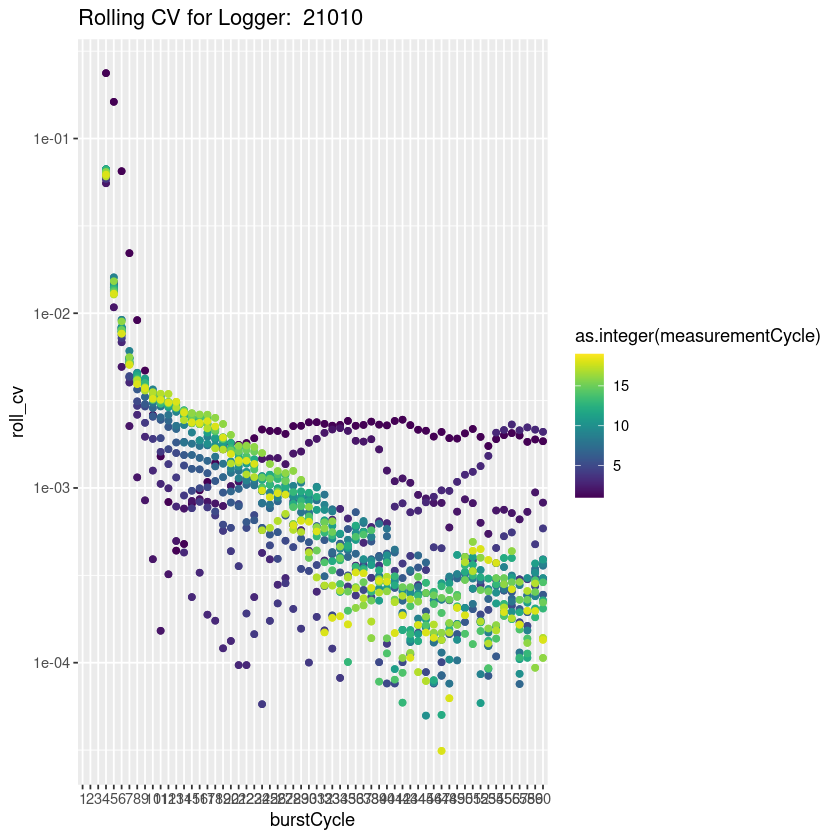

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 112 rows containing missing values (geom_point).”


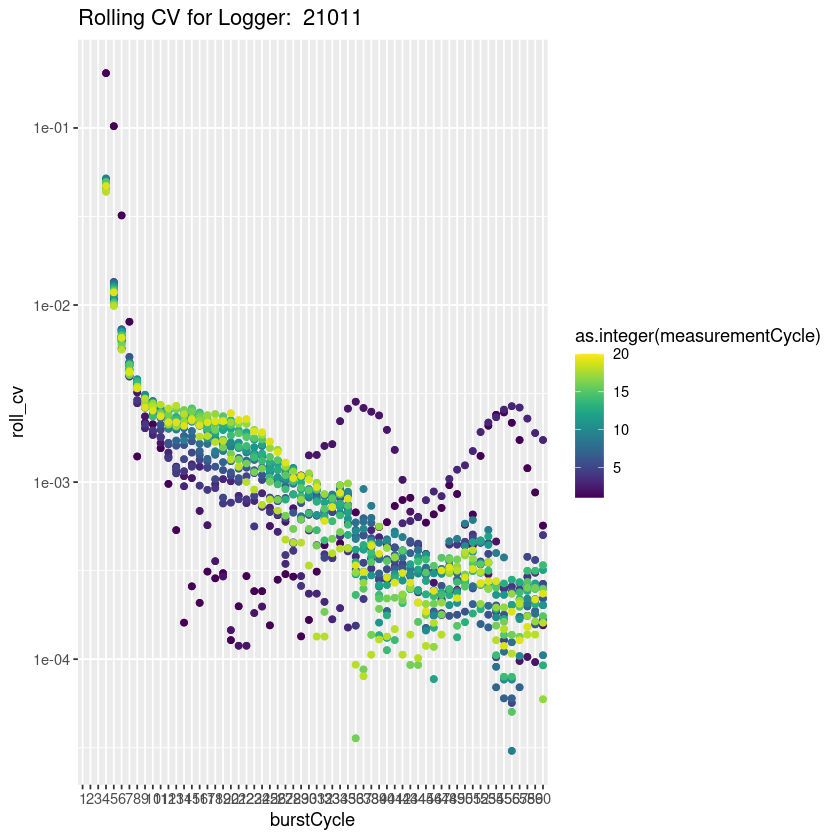

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 59 rows containing missing values (geom_point).”


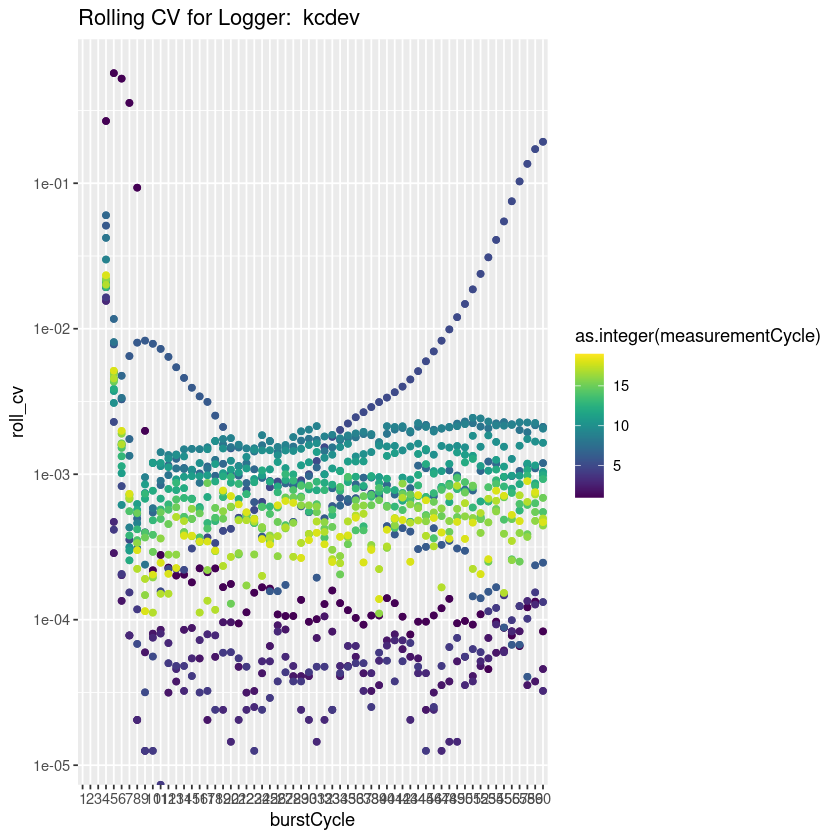

Warning message:
“Removed 59 rows containing missing values (geom_point).”


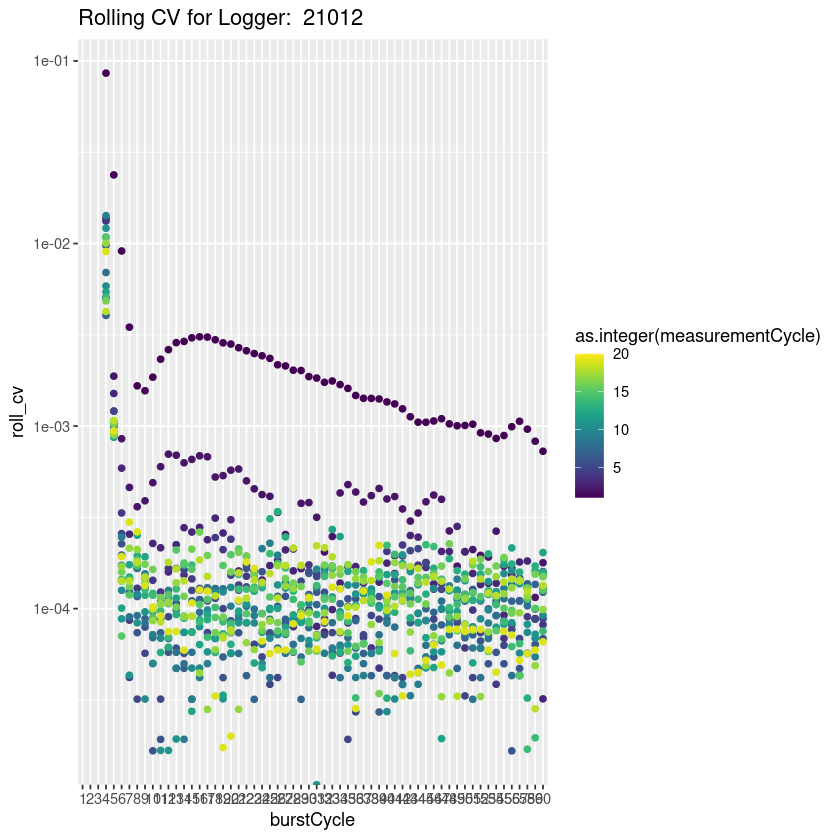

Warning message:
“Removed 59 rows containing missing values (geom_point).”


$`21010`

$`21011`

$kcdev

$`21012`

$`21013`

$`21001`


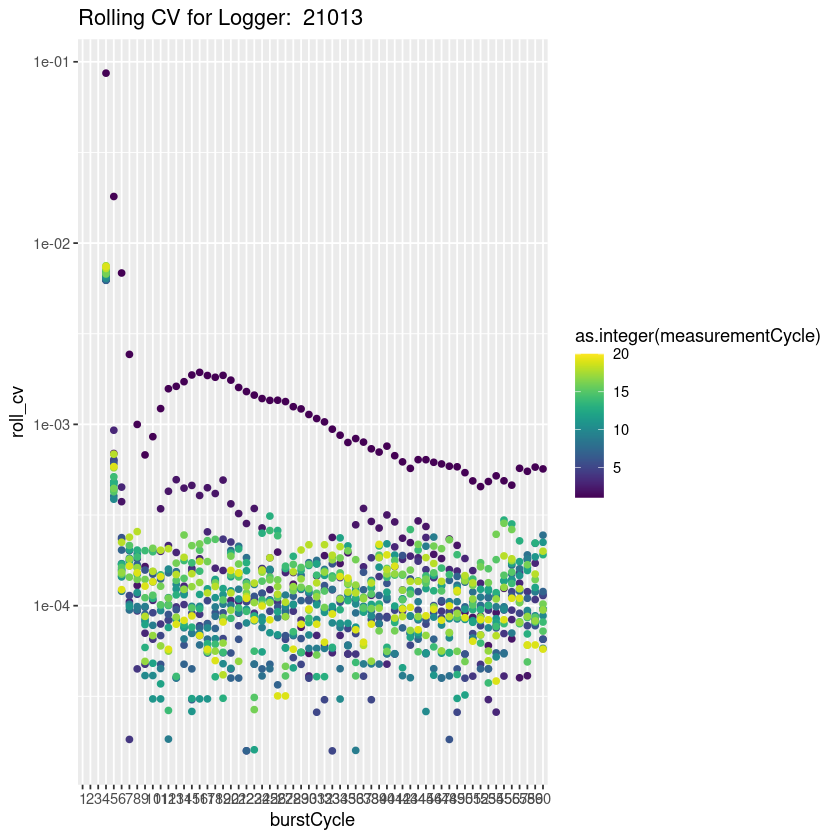

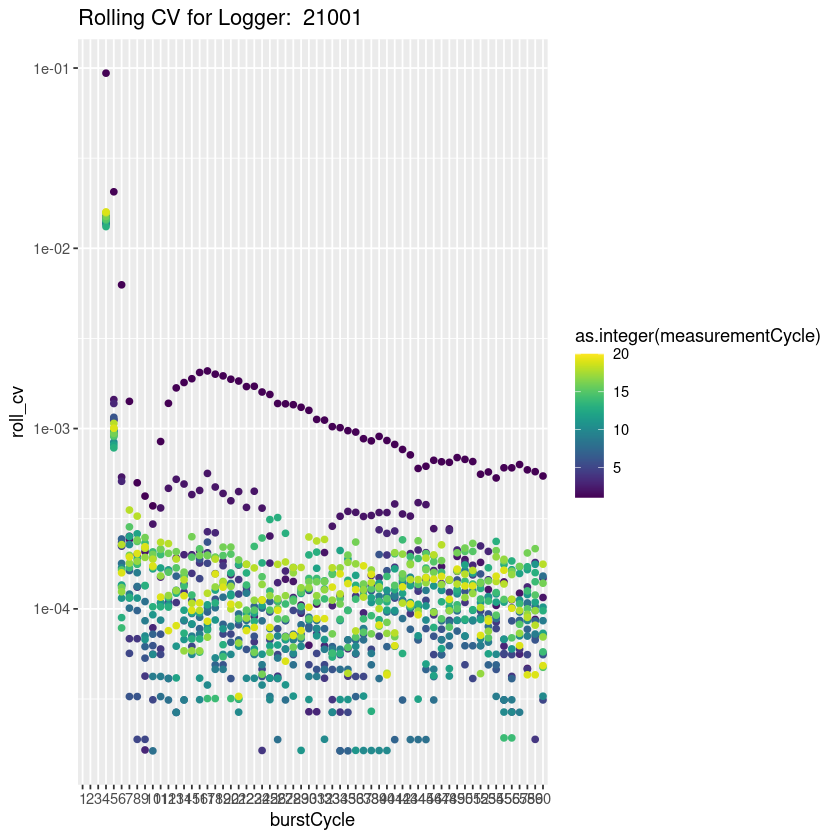

In [846]:
summaryDataCV_plots<-rollCV_plots(parseSummaryDataCV)

savePlotList(summaryDataCV_plots, "summaryDataCV_")

summaryDataCV_plots

## Function to calculate the mean of rolling cv above provided burst for each measurement cycle to determine target cv for methane driver

In [847]:
# mean_cv_burst<-function(parseDataCV, burstCycleStart, ll=loggerList, lc=loggerCount){
#     mean_na<-function(x){mean(x,na.rm=TRUE)}
    
#     temp_mean<-vector("list", lc)
#     for(i in 1:lc){
#         df<-subset(parseDataCV, logger==ll[i] & as.integer(burstCycle)>=burstCycleStart)
        
#         if(max(df$measurementCycle) > 2){
#             temp_mean[[i]]<-summaryBy(roll_cv~measurementCycle,df,FUN=c(mean_na))
#             temp_mean[[i]]$logger<-unique(df$logger)
#             temp_mean[[i]]$deployed_at<-lubridate::as_datetime(unique(df$deployed_at))
#         }
#     }
#     return(bind_rows(temp_mean))
# }

## calculate the mean cv of each burst and save it

In [848]:
# meanCVburst<-mean_cv_burst(parseSummaryDataCV, 20)

# saveDFrds(meanCVburst)
# saveDFcsv(meanCVburst)

### Print results

In [849]:
# for(i in 1:length(loggerList)){
#     print(loggerList[i])
#     print(subset(meanCVburst, logger==loggerList[i]))
# }

### Use this ^ data to decide a CV limit indicating when sensor has been sufficiently warmed
### Function to go through each logger and each measurement cycle and save the first instance where CV limit has been reached to an output dataframe

In [850]:
# # first instance of CV lower than 0.01 for each measurementCycle indicates a good reading
# # readings before that are not warmed up, readings after that are good but consume too much power
# # Ideally we want 1 value (1 summary line and/or 10 raw lines from burst) per measurement cycle

# # for each logger, for each measurement cycle, save 1 line to new dataframe
# manualCVlimit<-function(parseSummaryDataCV, manualCV, ll=loggerList, lc=loggerCount){
#     # TODO: first row is populated with NAs
#     outputDF<-data.frame(matrix(ncol=length(parseSummaryDataCV), nrow=0))
#     colnames(outputDF)<-names(parseSummaryDataCV)

#     for(i in 1:lc){
#         oneLogger<-subset(parseSummaryDataCV, logger==ll[i])

#         measurementCycles<-length(unique(oneLogger$measurementCycle))

#         for(j in 1:measurementCycles){
#             oneCycle<-subset(oneLogger, measurementCycle==j)
            
#             #save the first instance where the rolling cv has reached the desired limit
#             # TODO: save line with the lowest CV reached if has not reached the desired limit
#             # errors not an issue currently: reporting warnings where CV not calculated or mostly NA values
#             rowFound<-min(which(oneCycle$roll_cv<manualCV), na.rm=TRUE)
#             if(!is.integer(rowFound)){
#                 print(sprintf("cv limit not reached for logger:%s measurementCycle:%d", ll[i], j))
#                 print(sprintf("lowest cv is: %f", min(oneCycle$roll_cv, na.rm=TRUE)))
#             }else{
#                 outputDF<-rbind(outputDF,oneCycle[rowFound,])
#             }
#         }
#     }
#     outputDF<-process_columns(outputDF)
#     # either sort the categorical factor burst cycles or change them to numeric here:
#     outputDF$burstCycle<-as.numeric(outputDF$burstCycle)
#     return(outputDF)
# }

### Subset good data and save it to rds and csv

In [851]:
# summary_manualCVdata<-manualCVlimit(parseSummaryDataCV, 0.01)
# # outputDF$measurementCycle<-as.numeric(outputDF$measurementCycle)

# saveDFrds(summary_manualCVdata)
# saveDFcsv(summary_manualCVdata)

# #TODO: mean burstCycle(how many minutes it took to warm up) & standard error, and actual cv value

Warning message in min(which(oneCycle$roll_cv < manualCV), na.rm = TRUE):
“no non-missing arguments to min; returning Inf”


[1] "cv limit not reached for logger:21010 measurementCycle:19"


Warning message in min(oneCycle$roll_cv, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”


[1] "lowest cv is: Inf"


Warning message in min(which(oneCycle$roll_cv < manualCV), na.rm = TRUE):
“no non-missing arguments to min; returning Inf”


[1] "cv limit not reached for logger:21011 measurementCycle:20"


Warning message in min(oneCycle$roll_cv, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”


[1] "lowest cv is: Inf"


Warning message in min(which(oneCycle$roll_cv < manualCV), na.rm = TRUE):
“no non-missing arguments to min; returning Inf”


[1] "cv limit not reached for logger:kcdev measurementCycle:19"


Warning message in min(oneCycle$roll_cv, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”


[1] "lowest cv is: Inf"


Warning message in min(which(oneCycle$roll_cv < manualCV), na.rm = TRUE):
“no non-missing arguments to min; returning Inf”


[1] "cv limit not reached for logger:21012 measurementCycle:20"


Warning message in min(oneCycle$roll_cv, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”


[1] "lowest cv is: Inf"


Warning message in min(which(oneCycle$roll_cv < manualCV), na.rm = TRUE):
“no non-missing arguments to min; returning Inf”


[1] "cv limit not reached for logger:21013 measurementCycle:20"


Warning message in min(oneCycle$roll_cv, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”


[1] "lowest cv is: Inf"


Warning message in min(which(oneCycle$roll_cv < manualCV), na.rm = TRUE):
“no non-missing arguments to min; returning Inf”


[1] "cv limit not reached for logger:21001 measurementCycle:20"


Warning message in min(oneCycle$roll_cv, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”


[1] "lowest cv is: Inf"
[1] "~/Desktop/data/mesoBinTests/20230220_1000ppm_20230221_1210/RRIV_output/summary_manualCVdata.rds"
[1] "~/Desktop/data/mesoBinTests/20230220_1000ppm_20230221_1210/RRIV_output/summary_manualCVdata_.csv"


### Create plots and save them

#### Hardcoded dictionary of column variables to plot and axis labels

In [852]:
# names(summary_manualCVdata)
# note can't use positions to create this list because different versions of code have them in different order
# though at some point it will be consistent and everything between "burstCycle" and "user_note" would work

#HARDCODED:list of variables to plot and custom axis labels, issue if any column not present

variableDict <- c(
    "battery.V"="Battery Digital\nReading (12bit)",
    "dht_C"="\nTemperature (°C)",
    "dht_RH"="\nRelative Humidity (%)",
#     "atlas_CO2_ppm"="\nCO2 (ppm)",
    "ch4rf_raw"="Raw Methane Reference\nDigital Reading (12bit)",
    "ch4rf_cal"="Calibrated Methane Reference\nDigital Reading (12bit)",
    "ch4_raw"="Raw Methane Digital\nReading (12bit)",
    "ch4_cal"="Calibrated Methane Digital\nReading (12bit)"
#     "roll_cv"="Rolling Coefficient\nof Variation"
)
# variableDict
# class(variableDict)
# names(variableDict)
# print(as.character(variableDict[1]))

variableCount<-length(variableDict)
# variableCount

variableKeys<-names(variableDict)
# variableKeys

# is this preferable to an index number?
# for(thing in names(variableDict)){print(thing)}

In [853]:
# scopeTest<-function(local=variableDict){
#     print(local)
#     print(class(local))
# }

# you can create functions with defaults to global variables, but not if the local variable is given the same name
# parameters with defaults should be at the end of the list otherwise it gets in the way of positional arguments
# argument names should be clear, as should global variable names, but they can't overlap #TODO

### function that goes through and does each series of basic plots of variable vs time.h, or just x vs y colored by logger/site

In [854]:
# plot_Data_v_Time <-function(df, color="logger", vd=variableDict, vk=variableKeys, vc=variableCount){
#   # initialize list to hold plots
#   DvT = vector('list', vc)
#   names(DvT) = names(vd)
  
#   # plot each column vs time with all deployments into list
#   for ( i in 1:vc ){
#     DvT[[i]] = ggplot(data=df,aes_string(x="time.h",y=vk[i],color=color),size=1)+
#       geom_point()+geom_line()+theme_classic(base_size=12)+
#       labs(x="Date", y=vd[i], color=NULL)
#     # +
#     #   scale_color_manual(values=custom_colors2,na.translate=F)+
#     #   scale_x_datetime(date_labels="%m/%d %H",breaks=scales::pretty_breaks(n=4),expand=c(0,60*5))
#   }
#   return(DvT)
# }

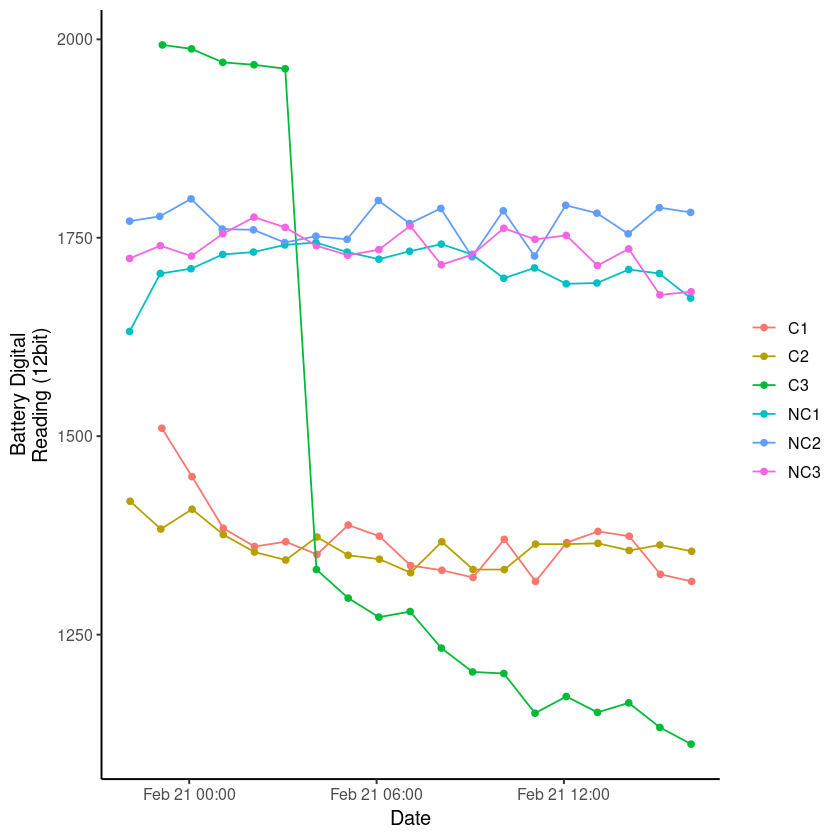

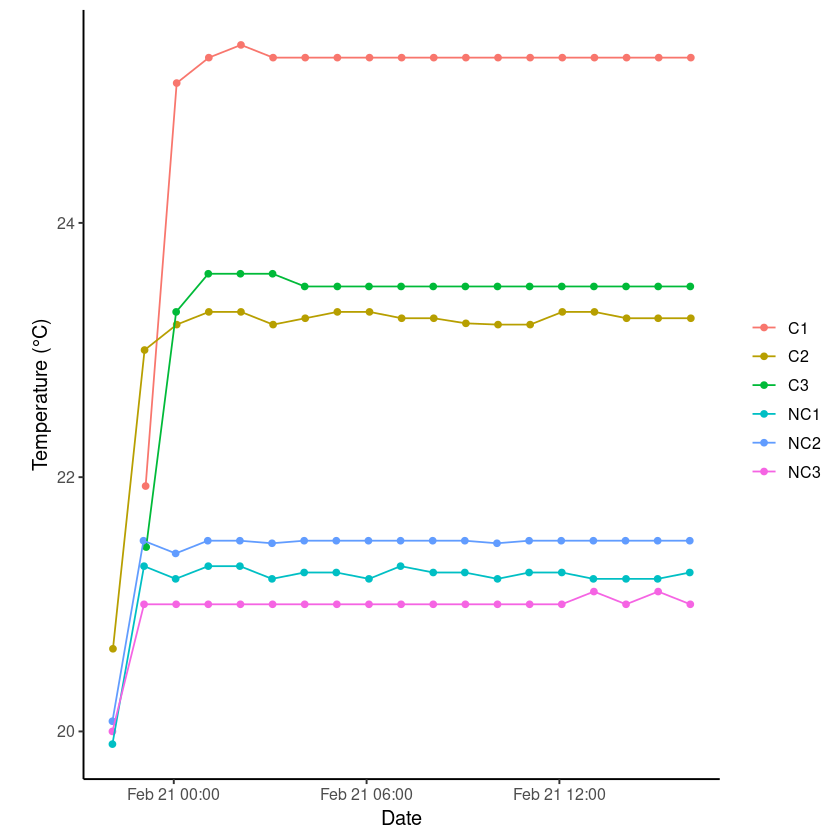

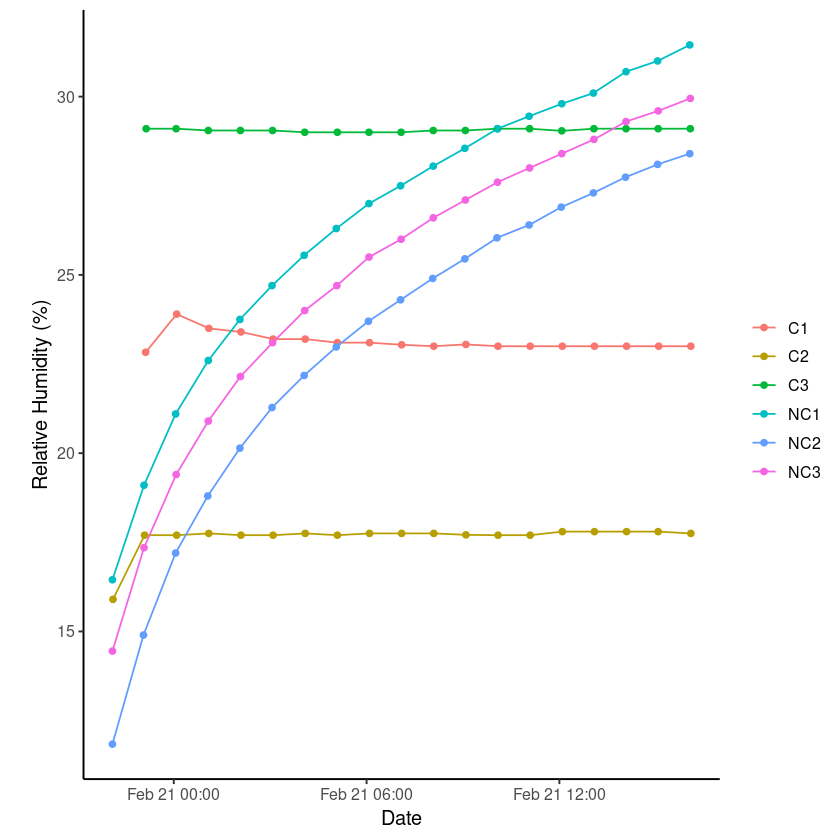

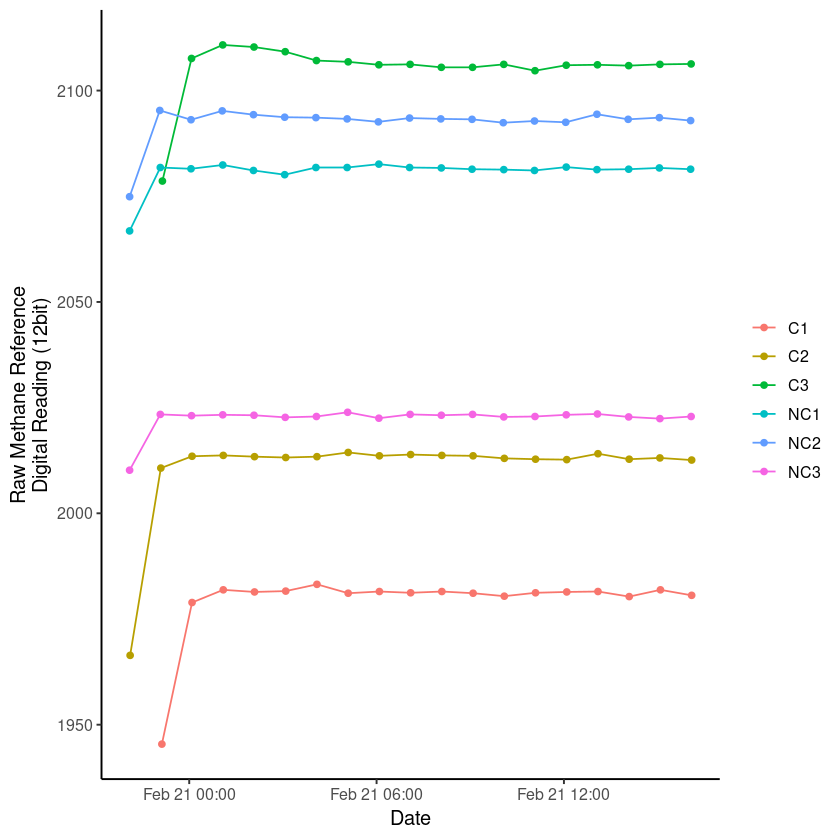

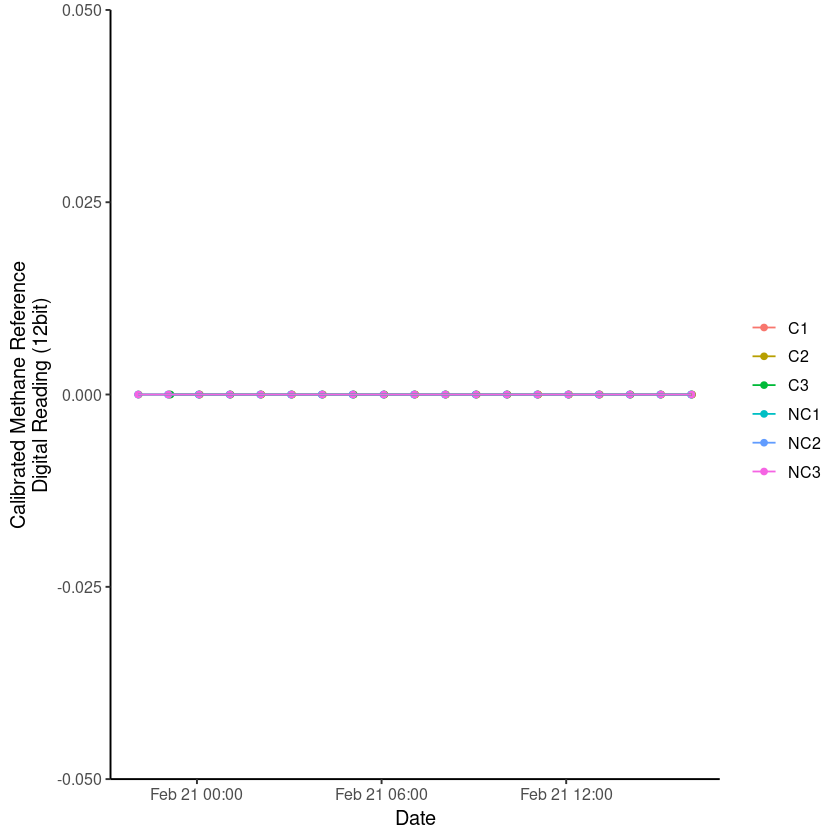

$battery.V

$dht_C

$dht_RH

$ch4rf_raw

$ch4rf_cal

$ch4_raw

$ch4_cal


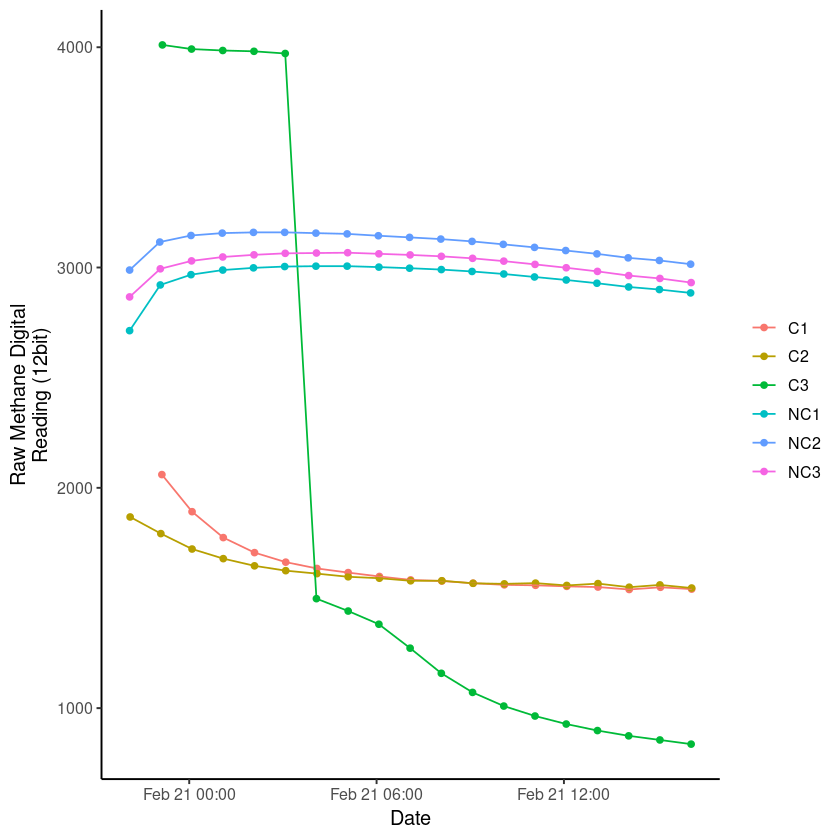

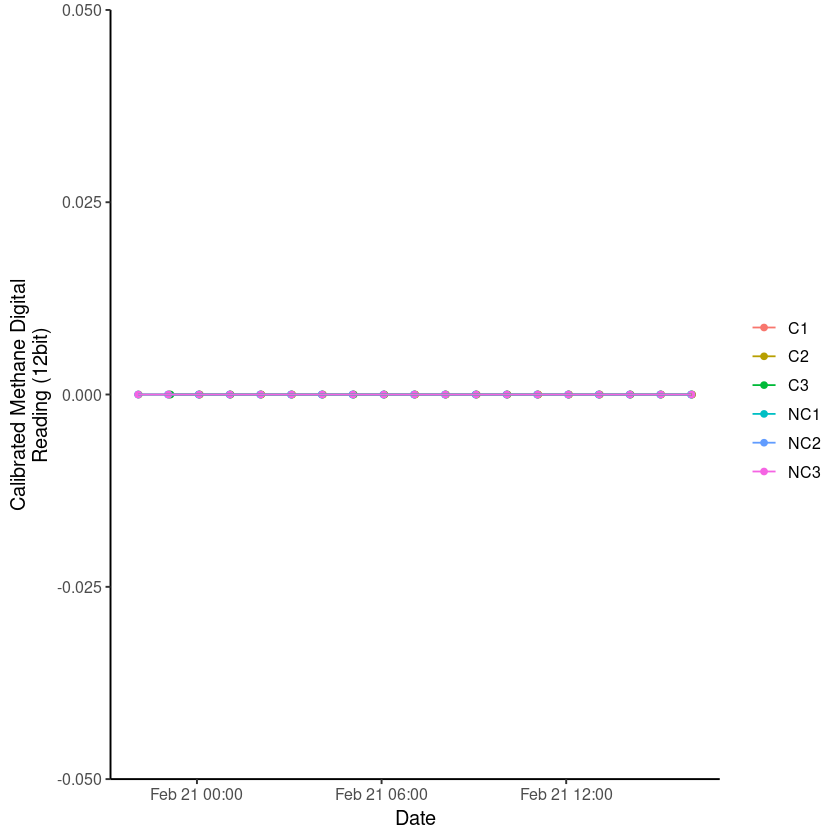

In [855]:
loggerPlots<-plot_Data_v_Time(summary_manualCVdata, "site")
loggerPlots

savePlotList(loggerPlots, "sp_manualCV_")

### function that goes through and does each series of basic plots of variable vs time.h for each individual logger

In [856]:
# plot_individual_logger_data_v_time <-function(df, vd=variableDict, vk=variableKeys, vc=variableCount,
#                                               ll=loggerList, lc=loggerCount){
#     ## list of lists, where list values are the names of columns and loggers for the deployment
#     output <- vector("list", vc)
#     names(output) <- vk
    
#     # initialize empty double list to hold plots
#     for(i in 1:vc){
#         output[[ vk[i] ]] <- vector("list", lc)
#         names( output[[ vk[i] ]] ) <- loggerList
#     }
    
#     # create plots at respective locations
#     for(i in 1:vc){
#         for(j in 1:lc){
#           output[[ vk[i] ]][[ ll[j] ]] = ggplot(data=subset(df, logger==ll[j]))+
#             geom_point(aes_string(x="time.h",y=vk[i]),size=1)+theme_classic(base_size=12)+
#             ylab(vd[i])+xlab("Date")+ggtitle(paste("Logger: ",ll[j],sep=""))
#           # +
#           #   scale_color_manual(values=custom_colors2,na.translate=F)+
#           #   scale_x_datetime(date_labels="%m/%d %H",breaks=scales::pretty_breaks(n=4),expand=c(0,60*120))
#         }
#     }
#     return(output)
# }

In [857]:
# individualPlots<-plot_individual_logger_data_v_time(summary_manualCVdata)

# individualPlots

# savePlotListList(individualPlots, "ip_manualCV_")

# split the data sets between raw and summary

In [858]:
raw_processed_data<-subset(processed_data, type=="raw")
summary_processed_data<-subset(processed_data, type=="summary")

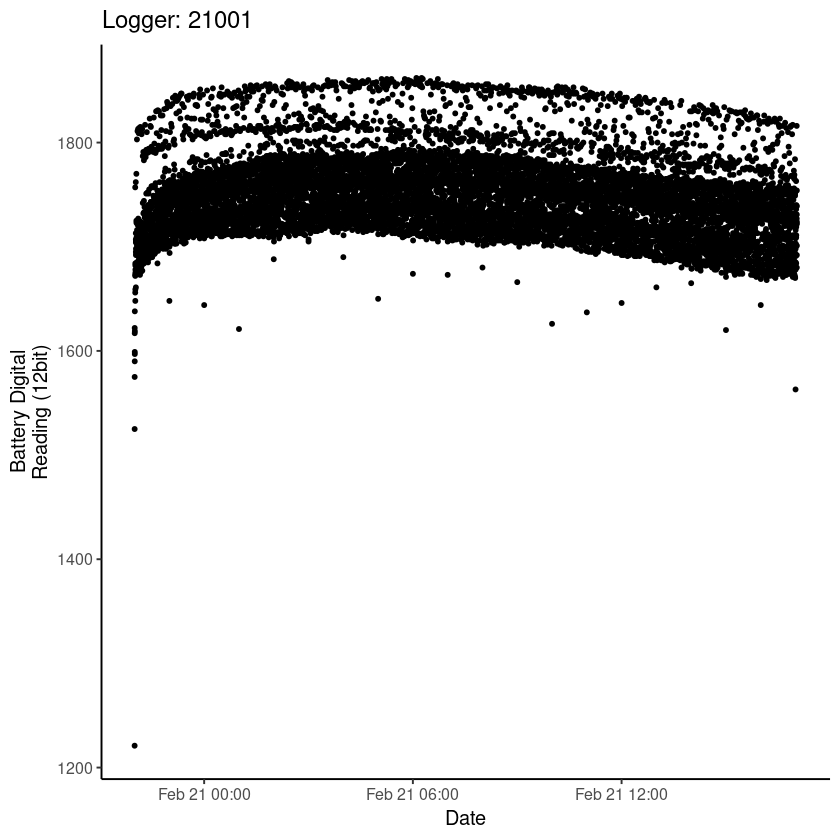

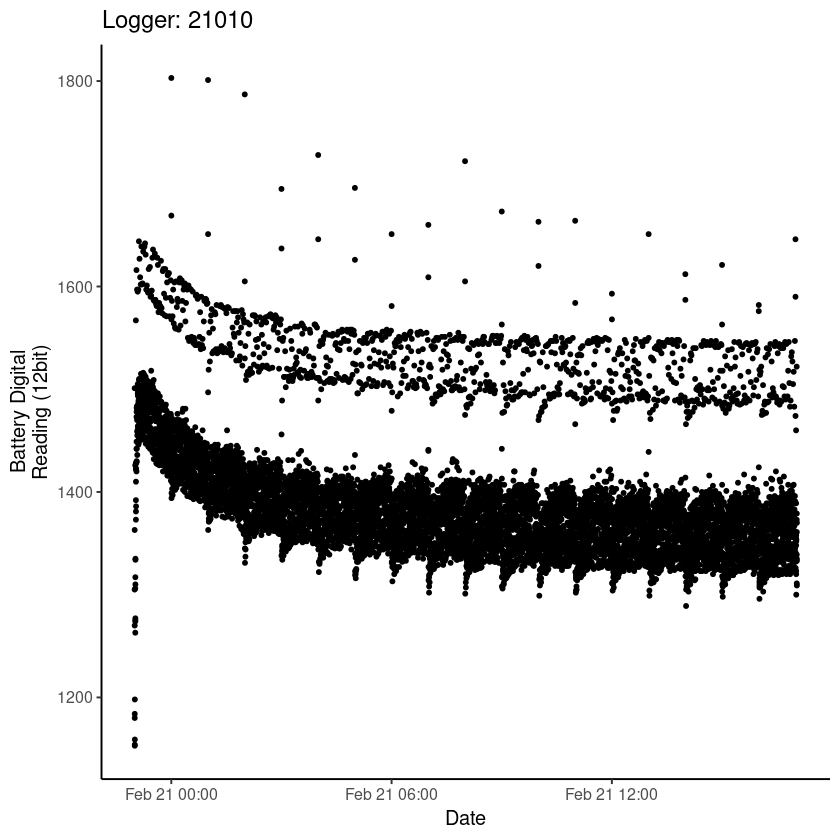

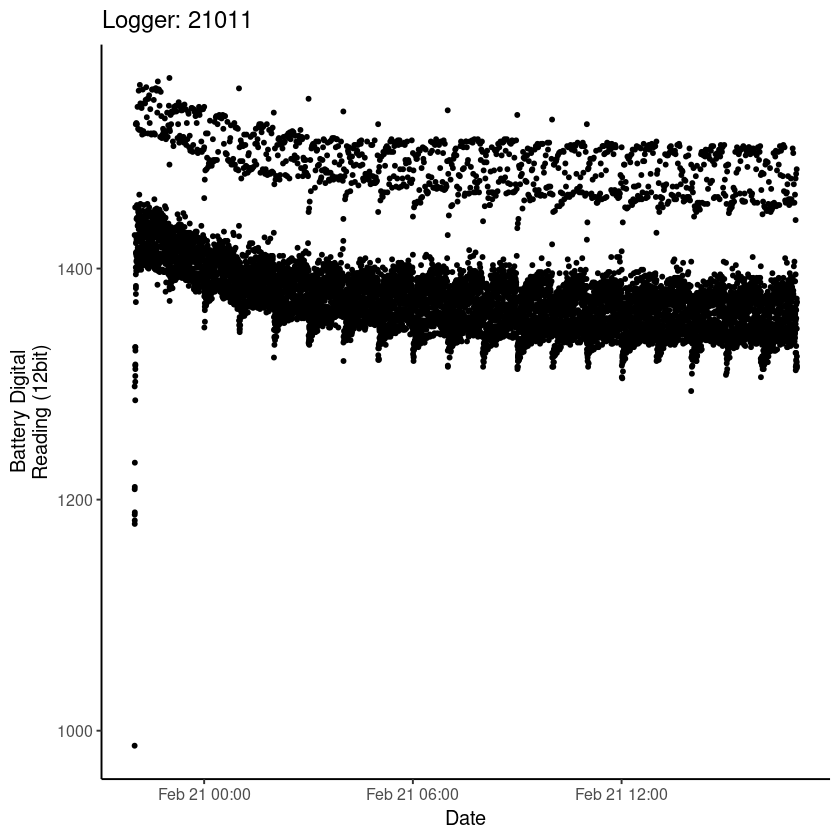

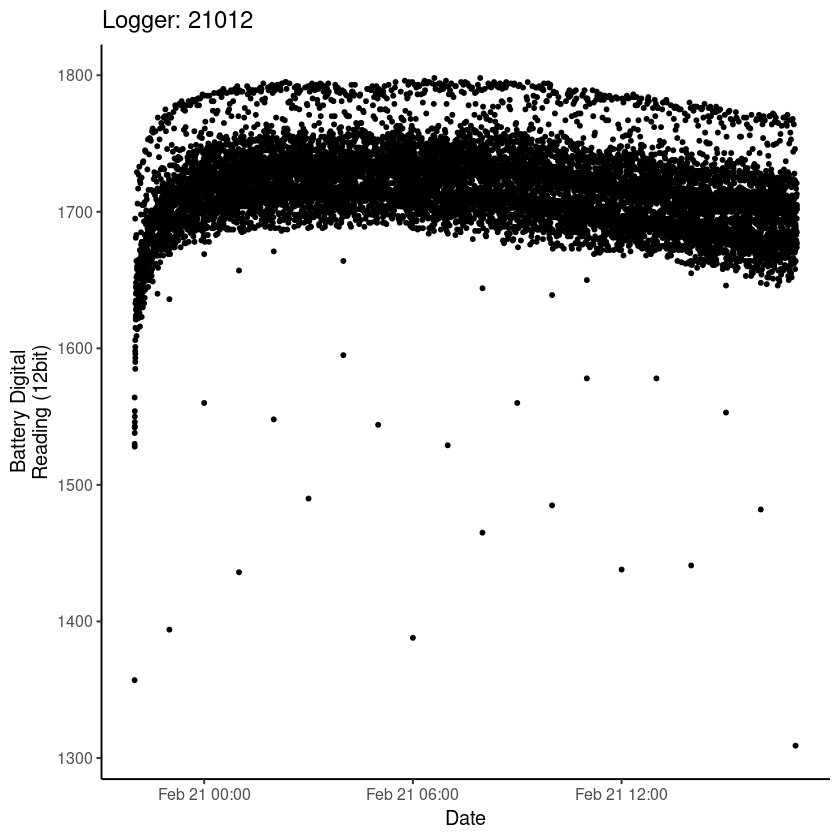

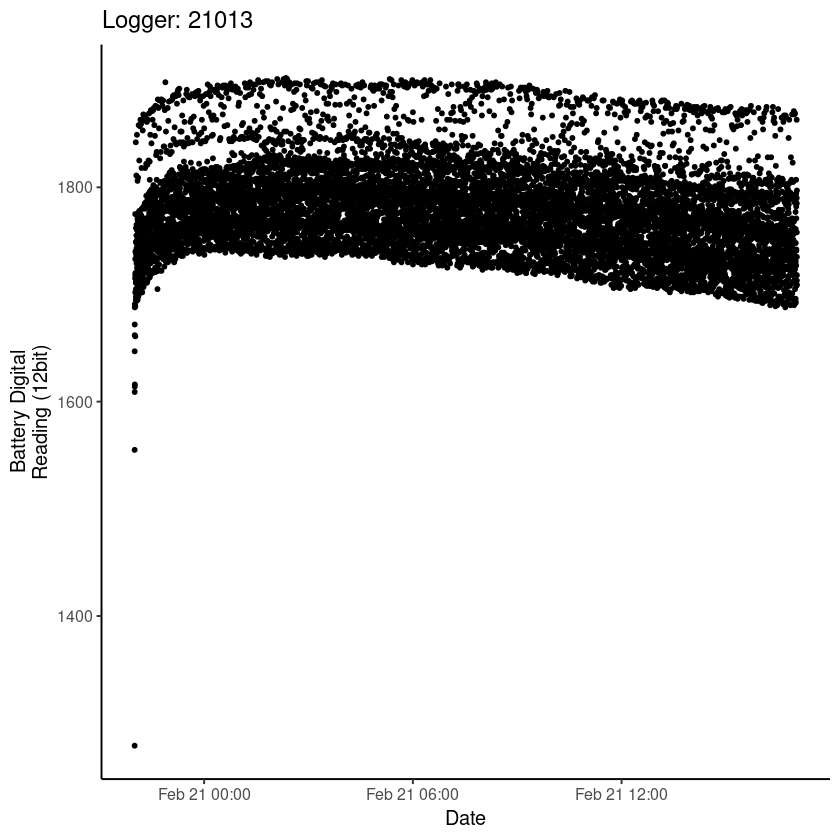

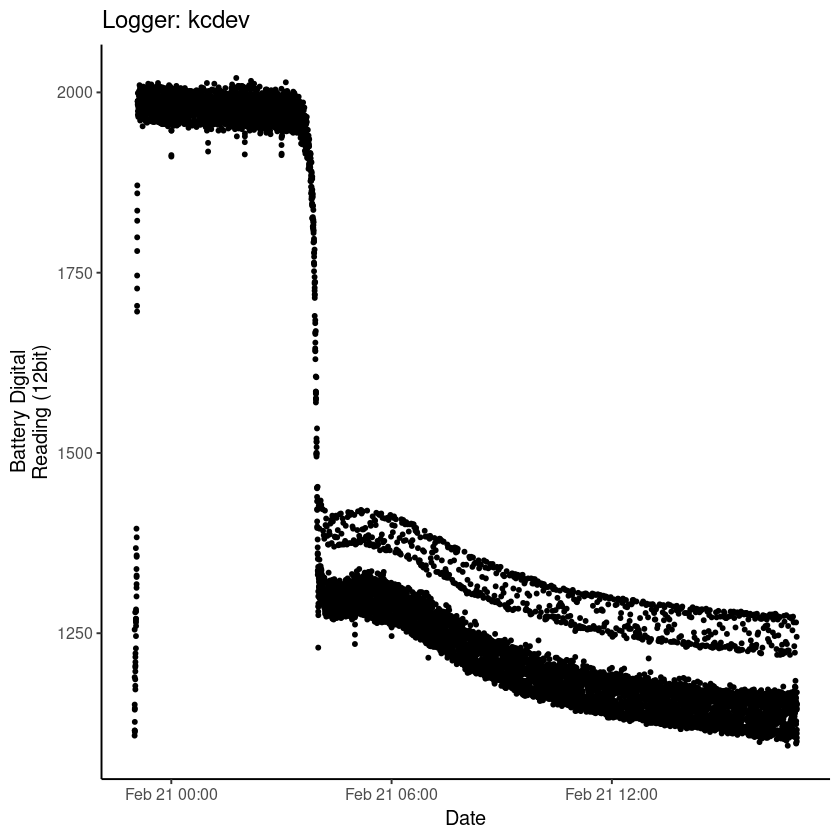

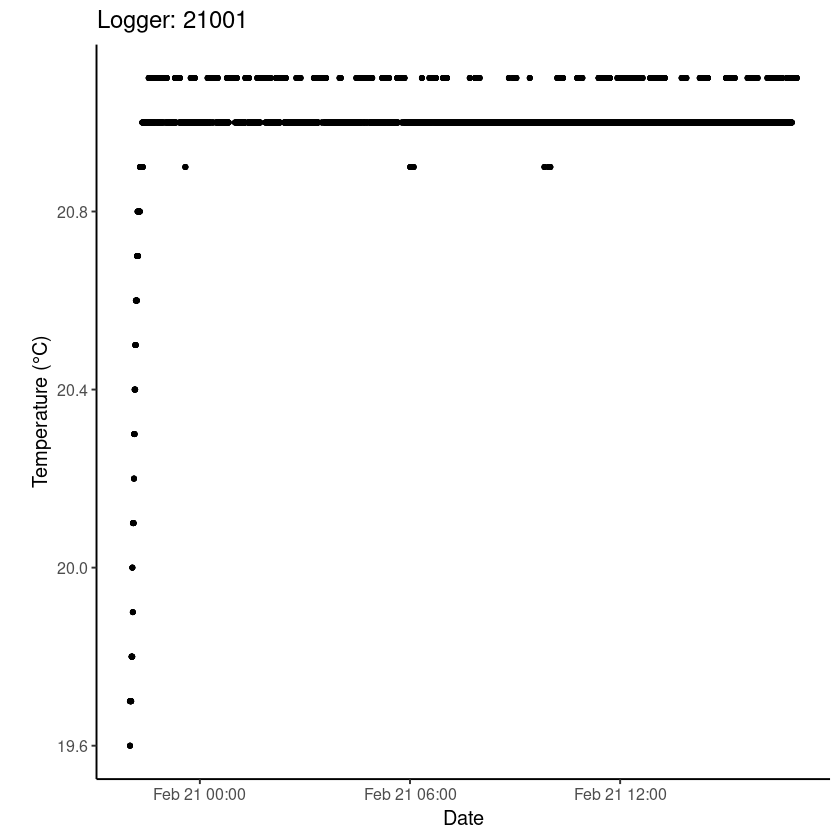

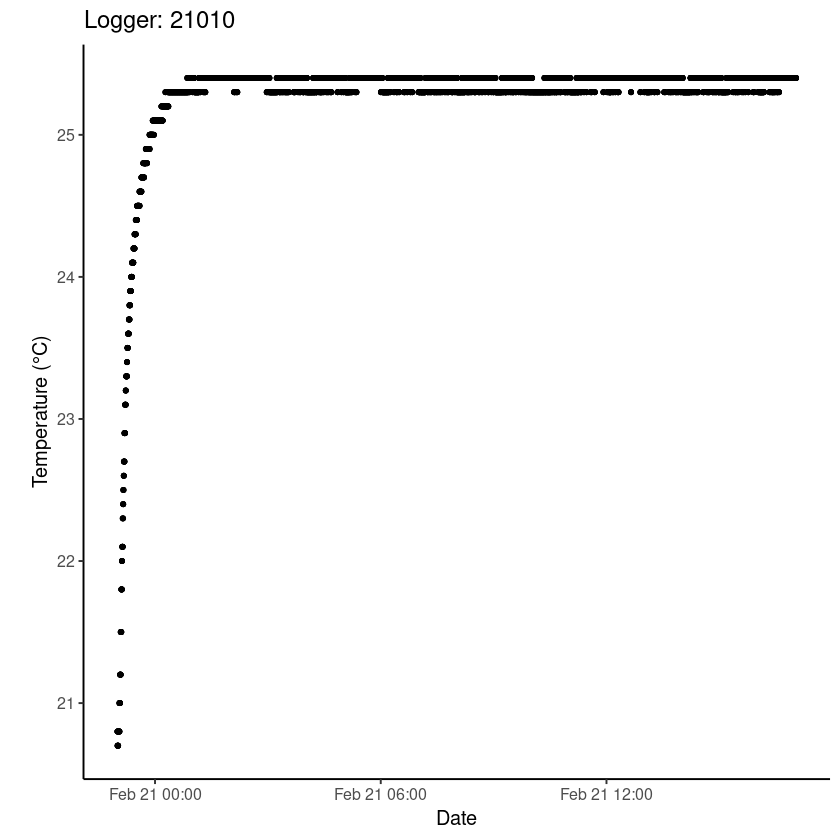

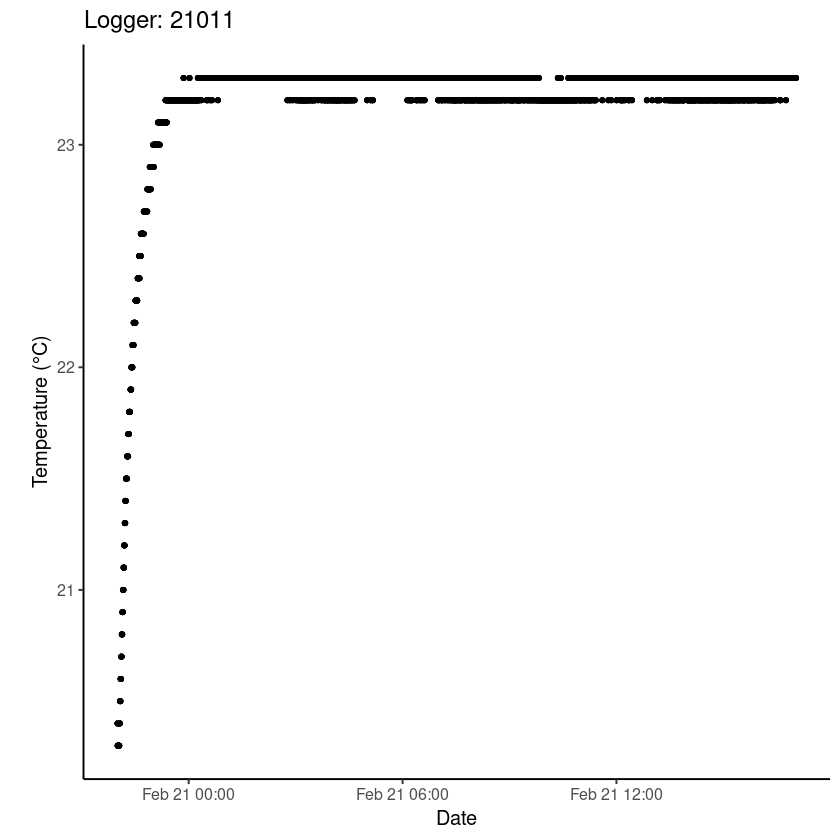

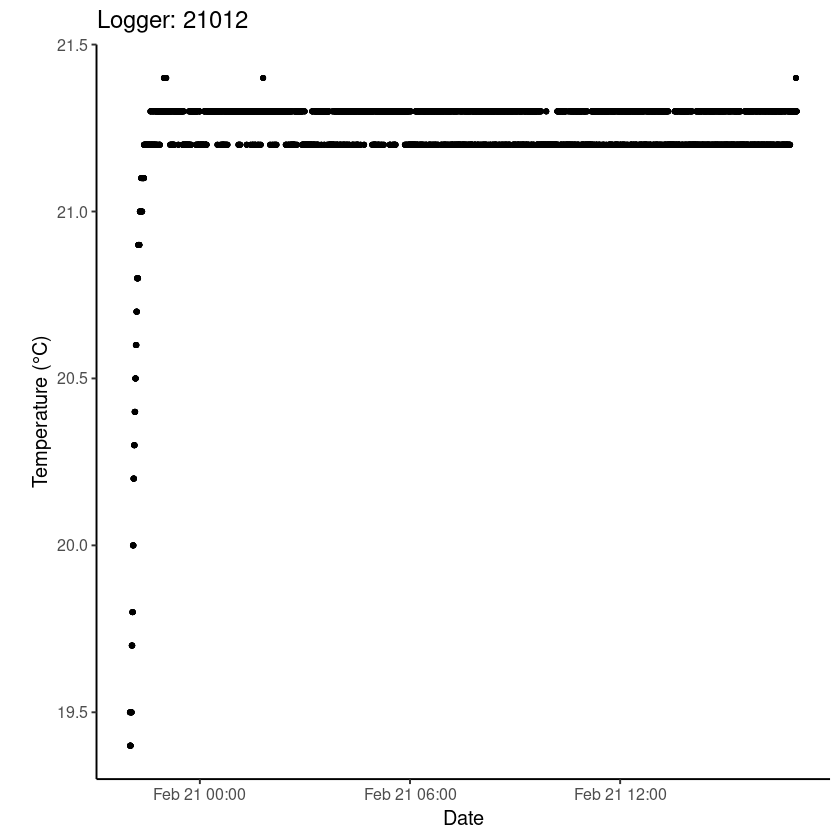

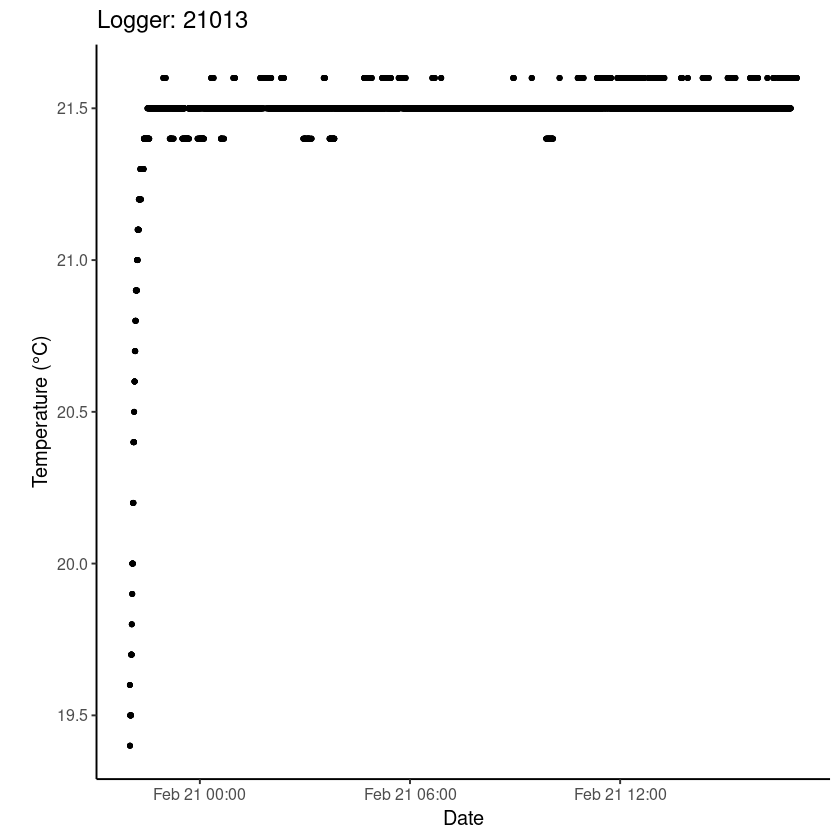

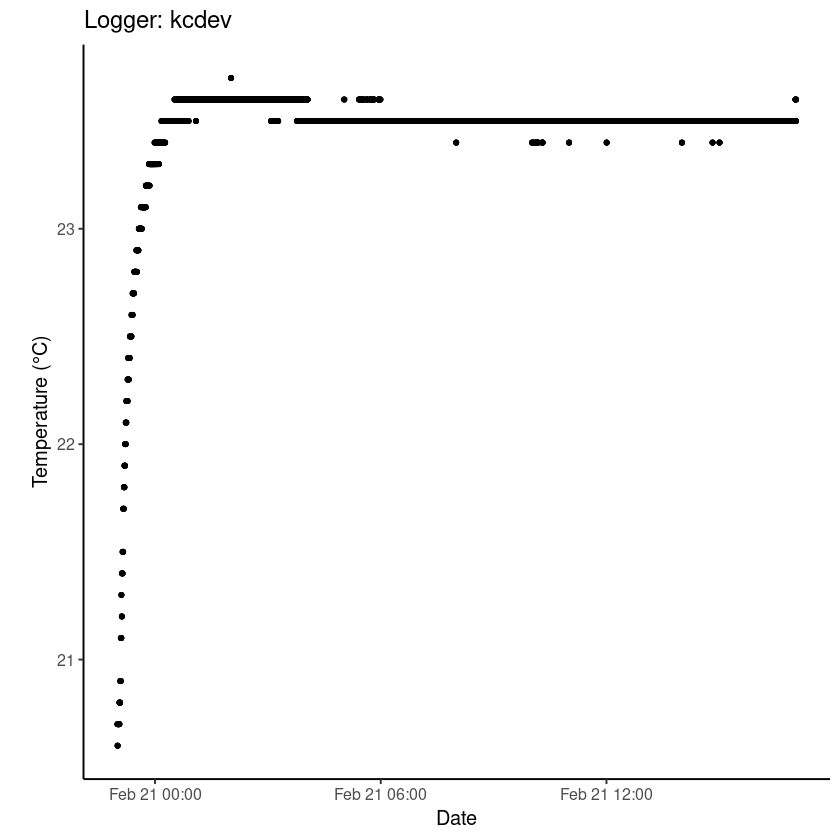

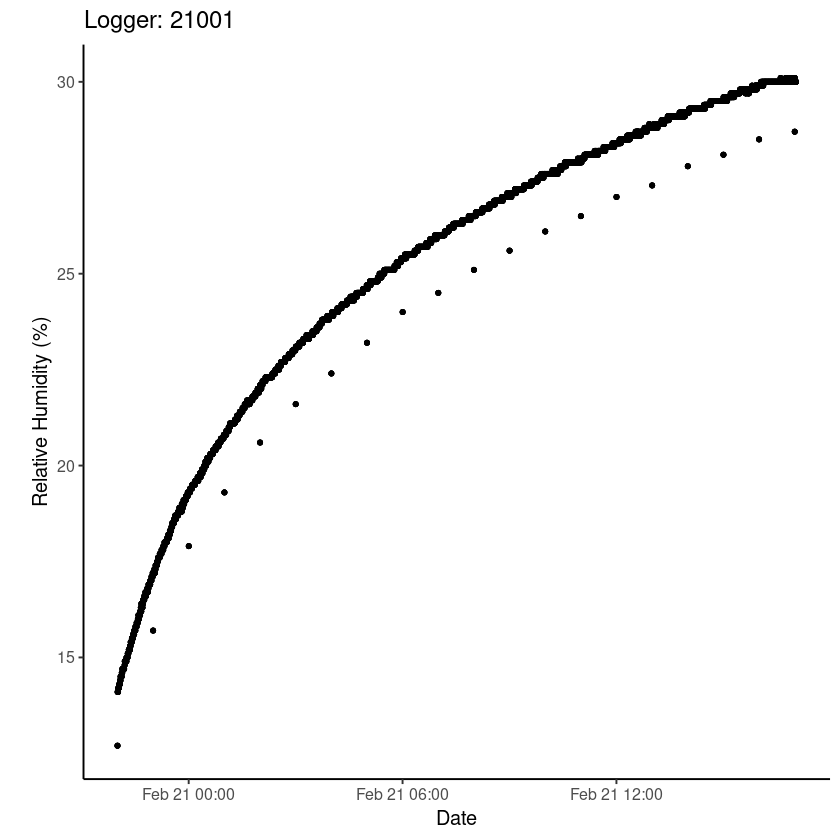

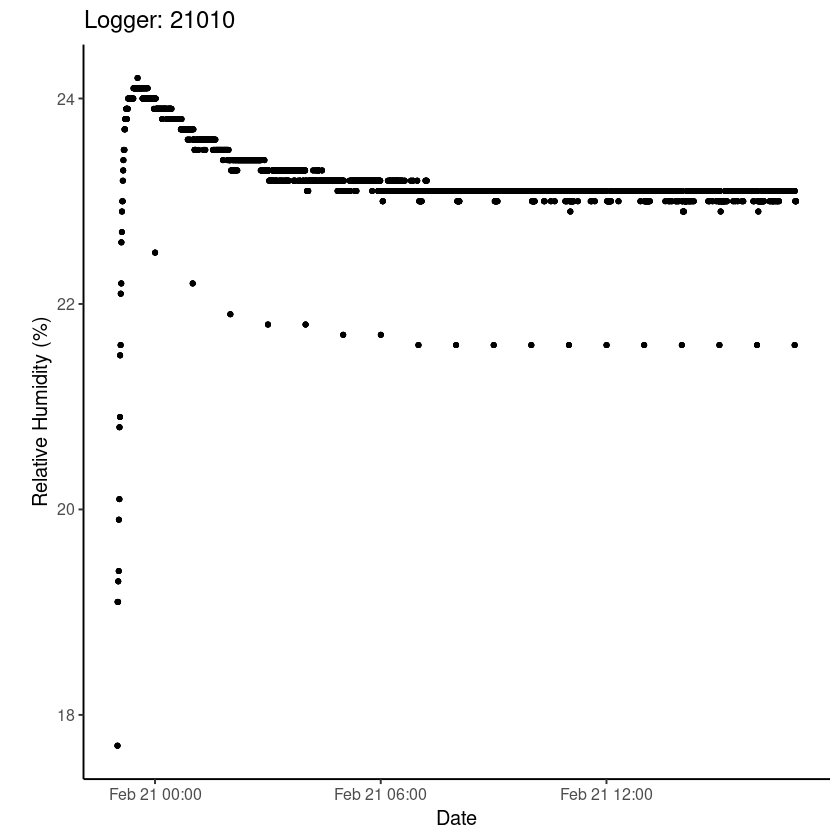

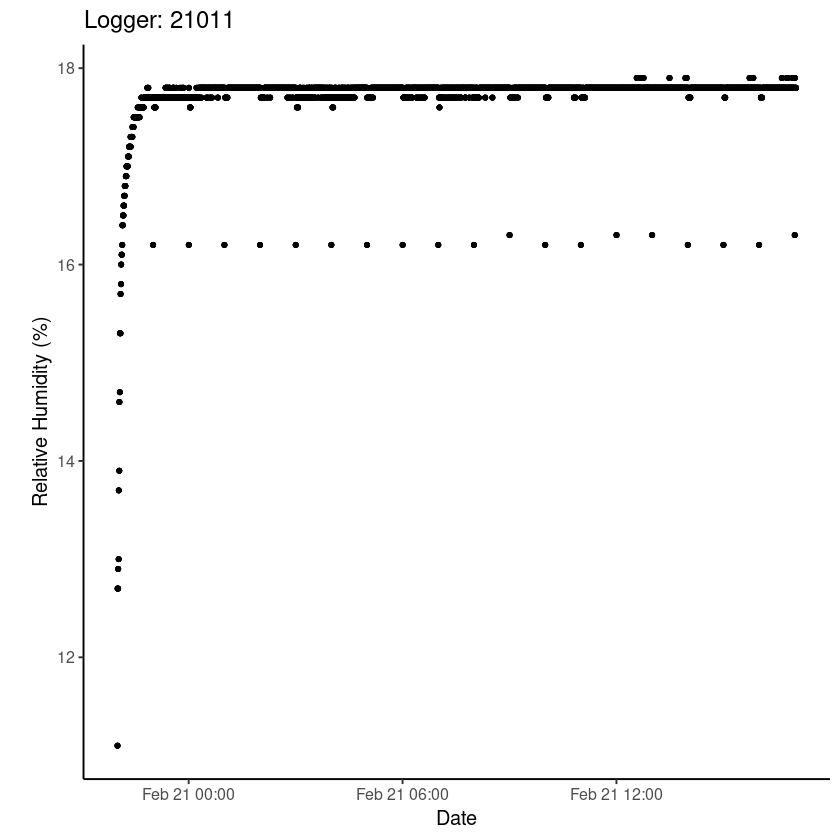

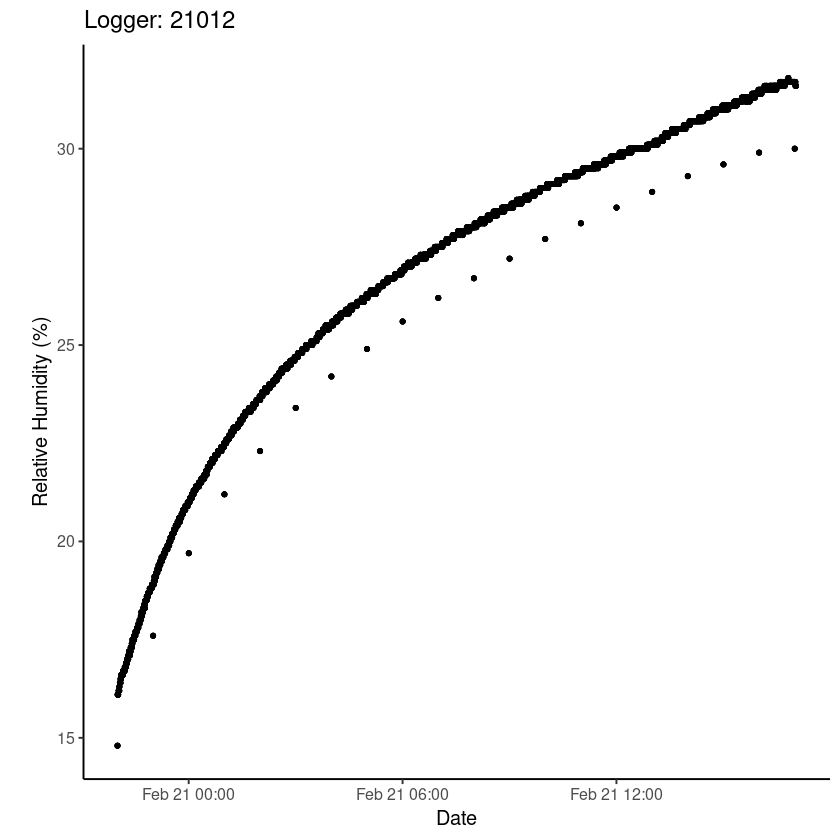

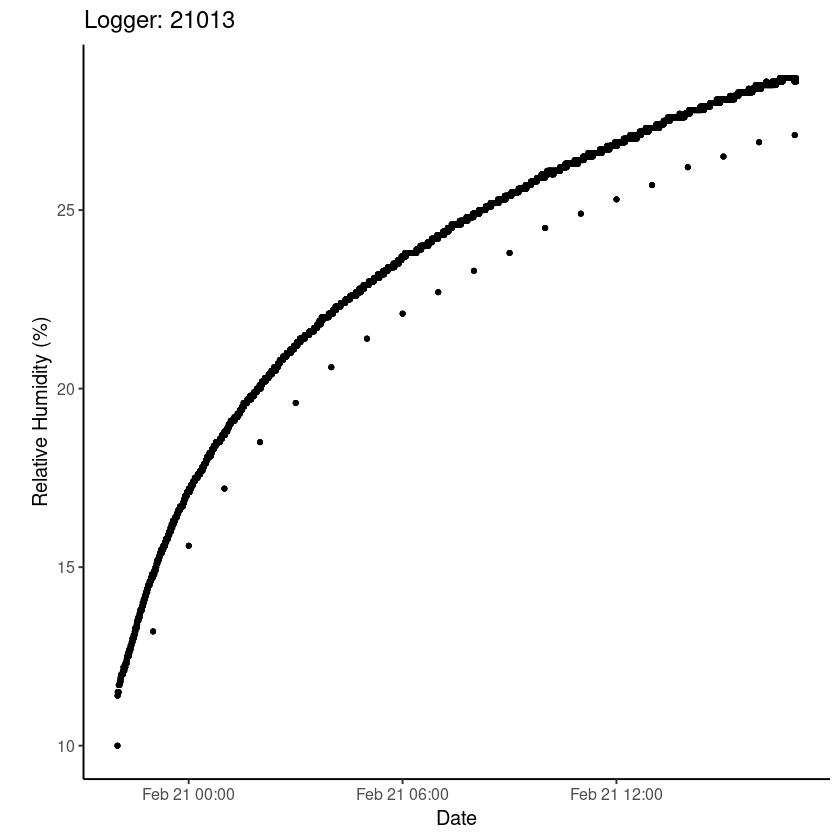

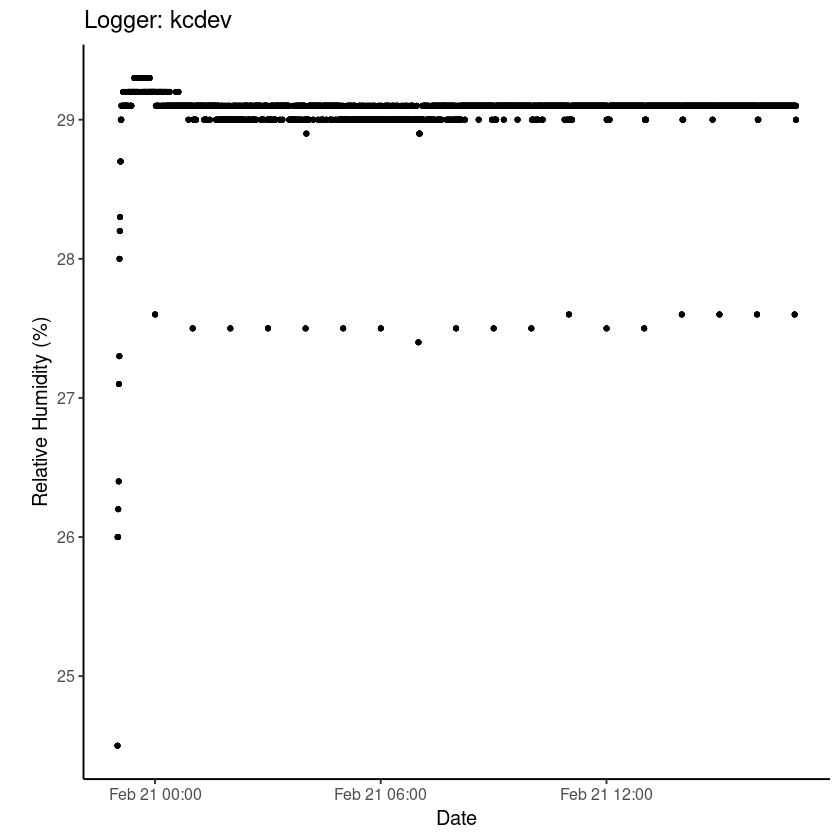

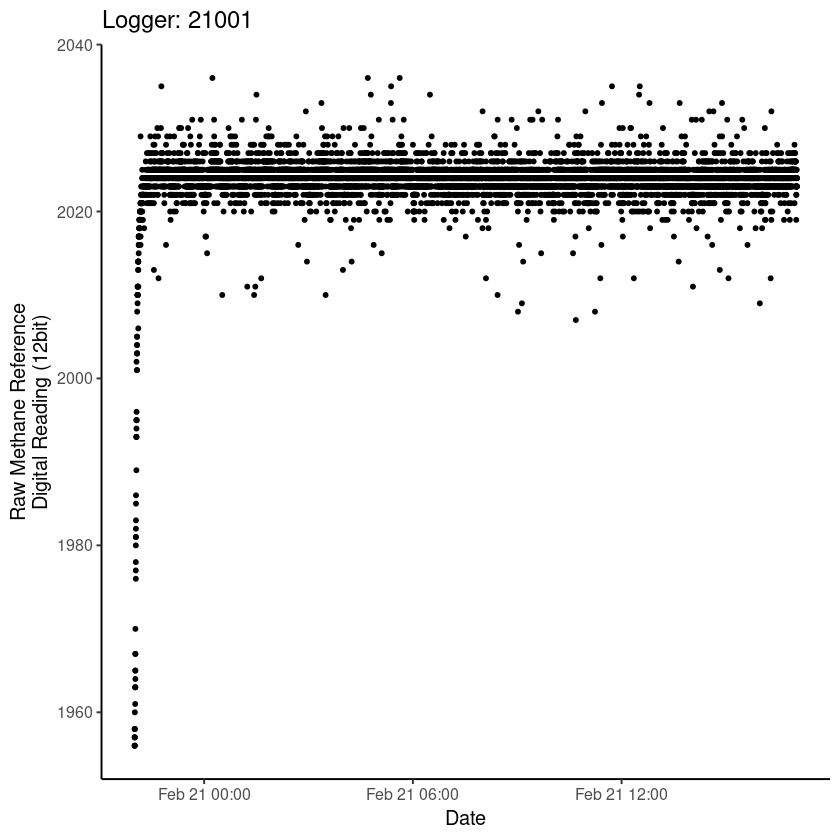

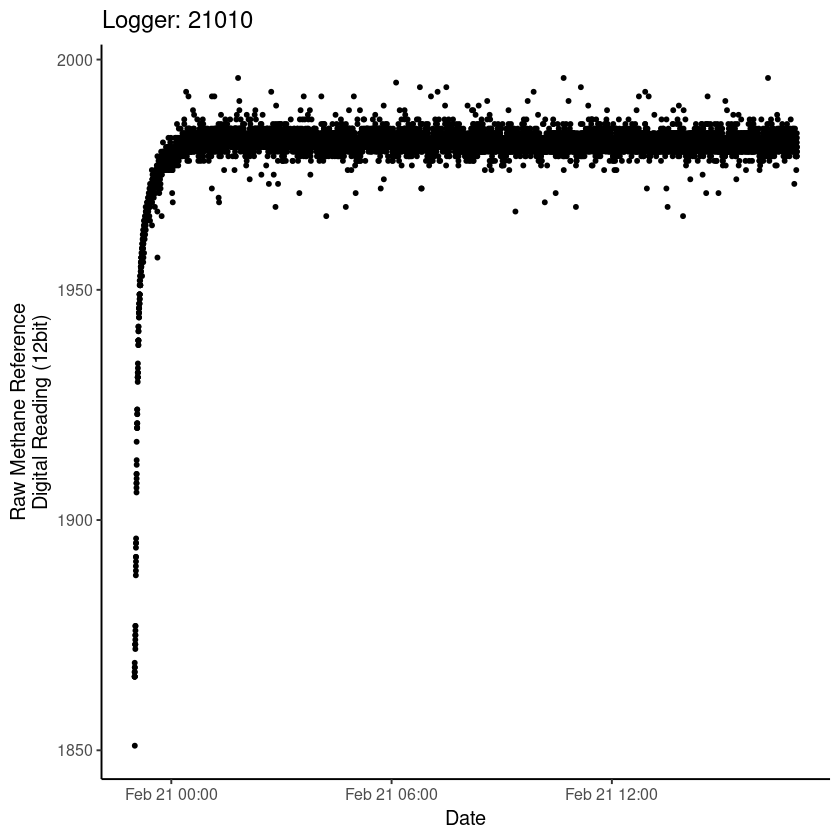

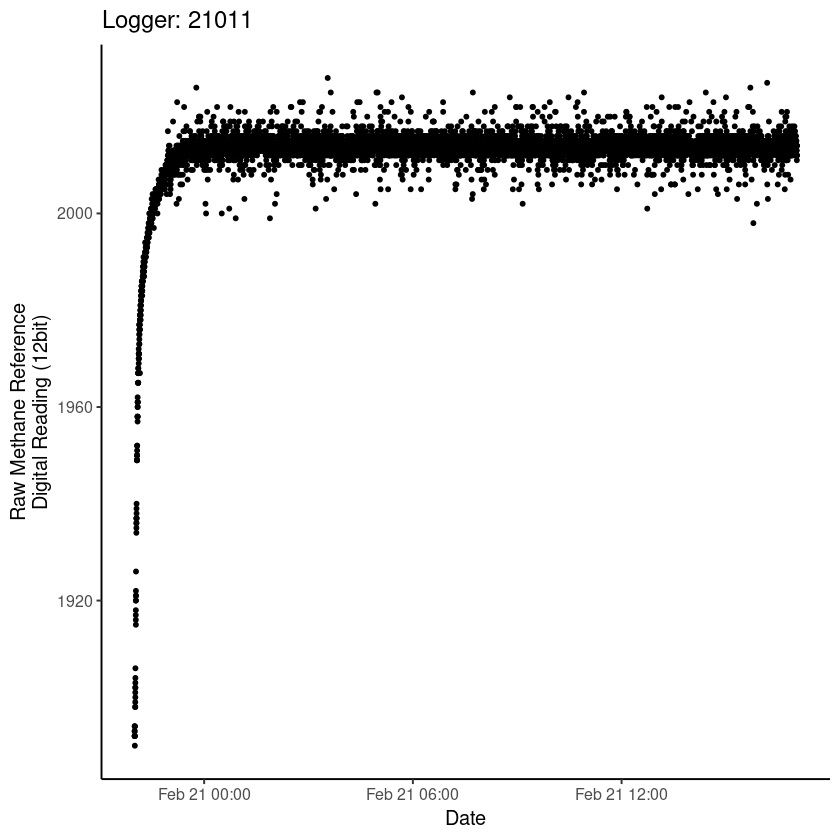

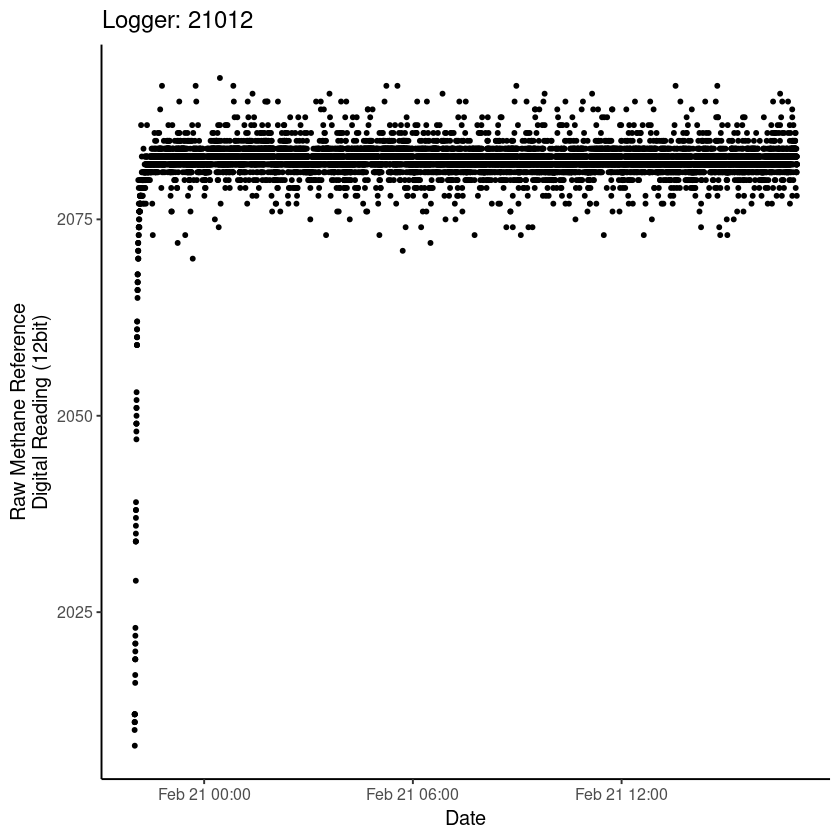

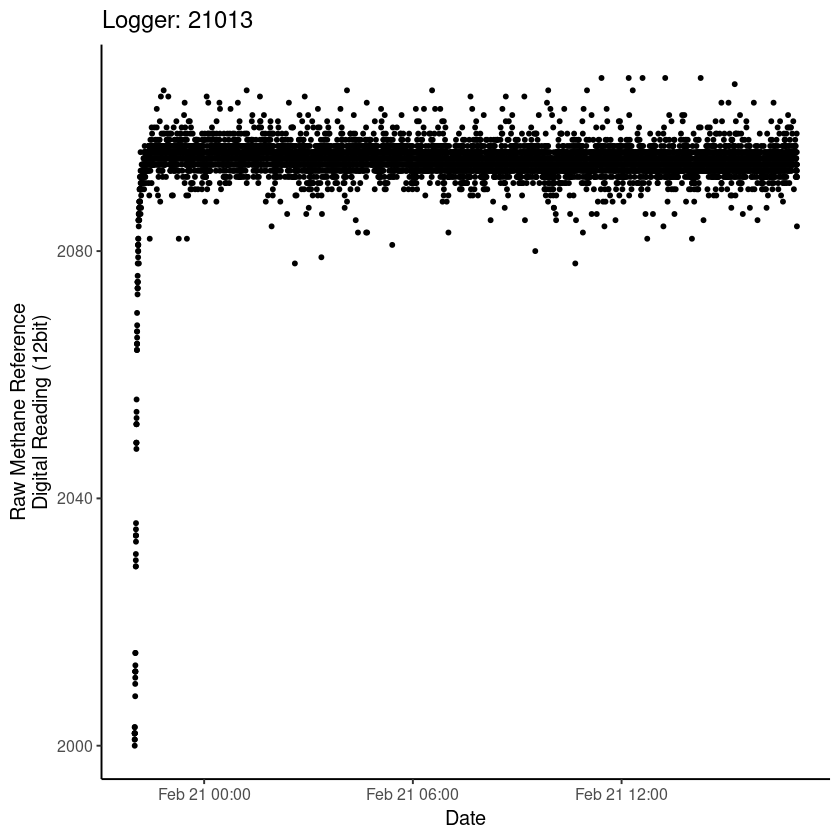

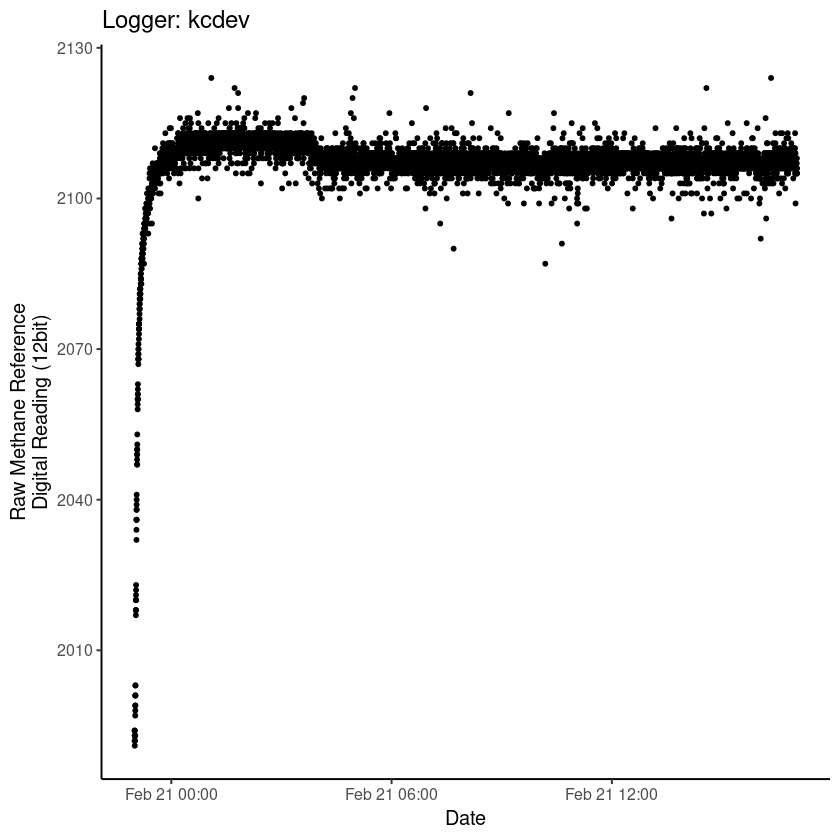

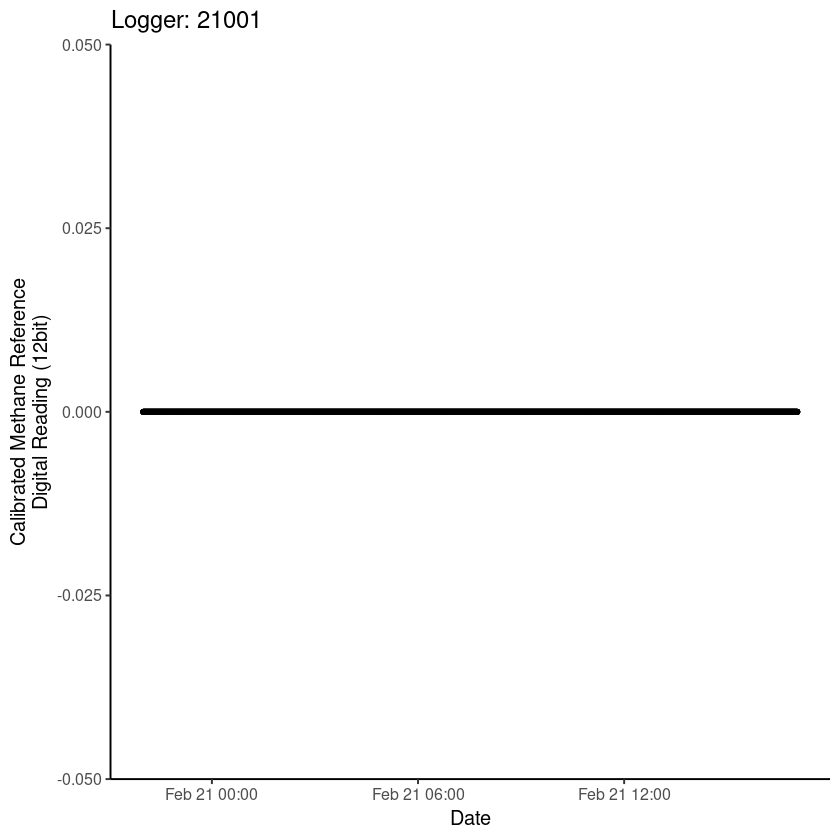

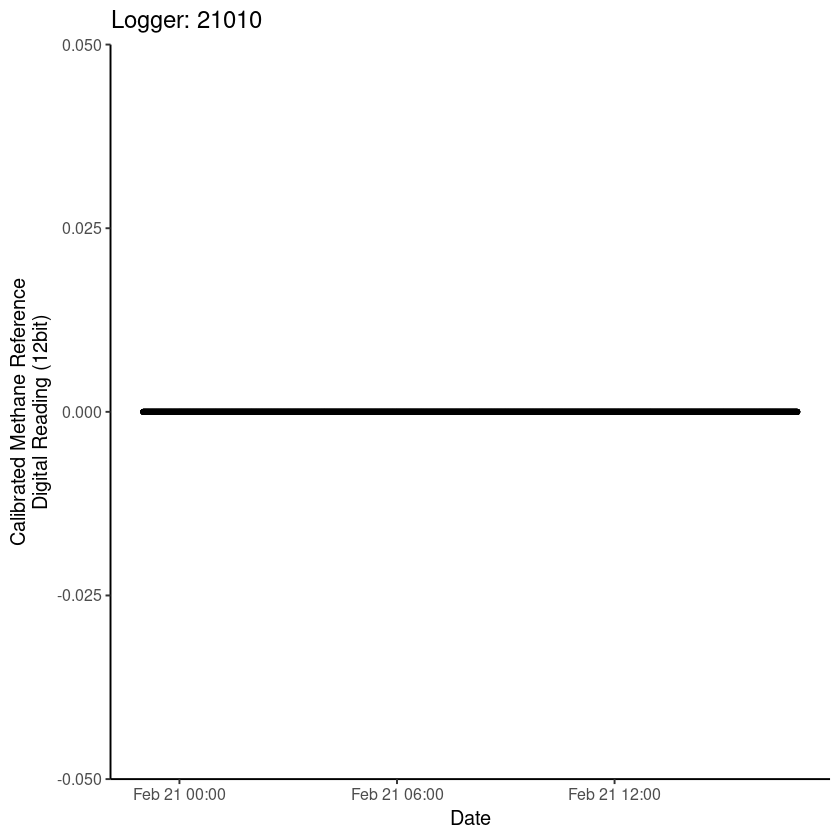

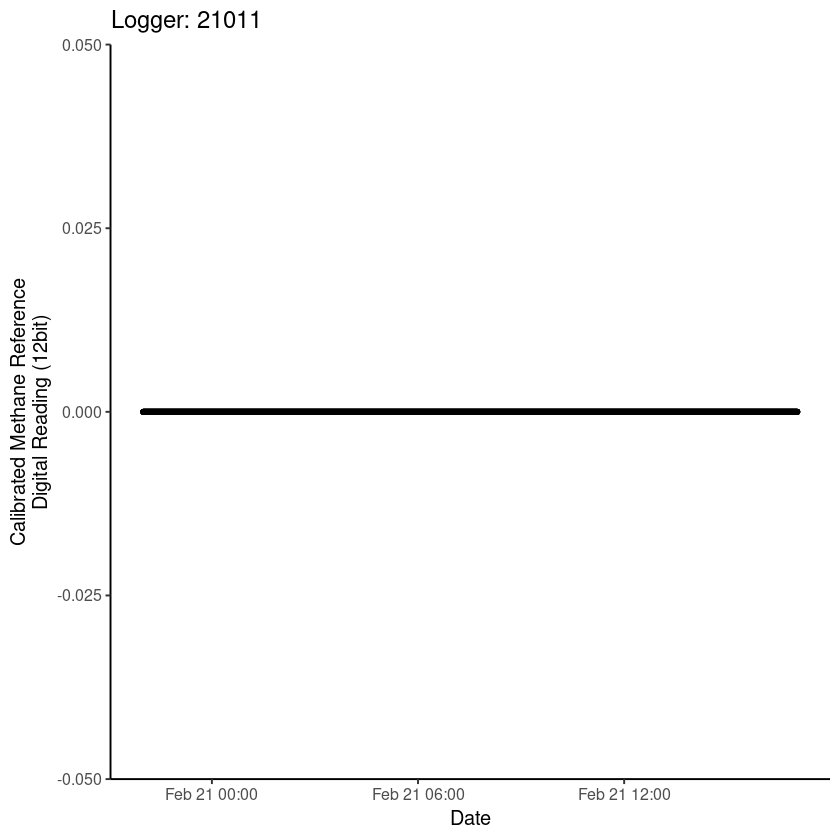

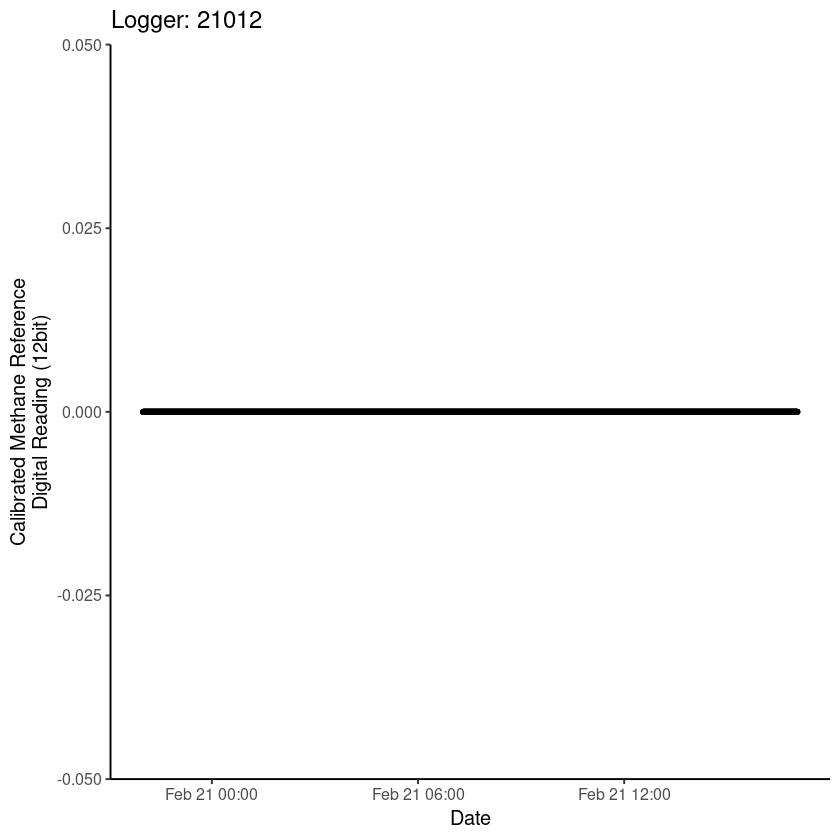

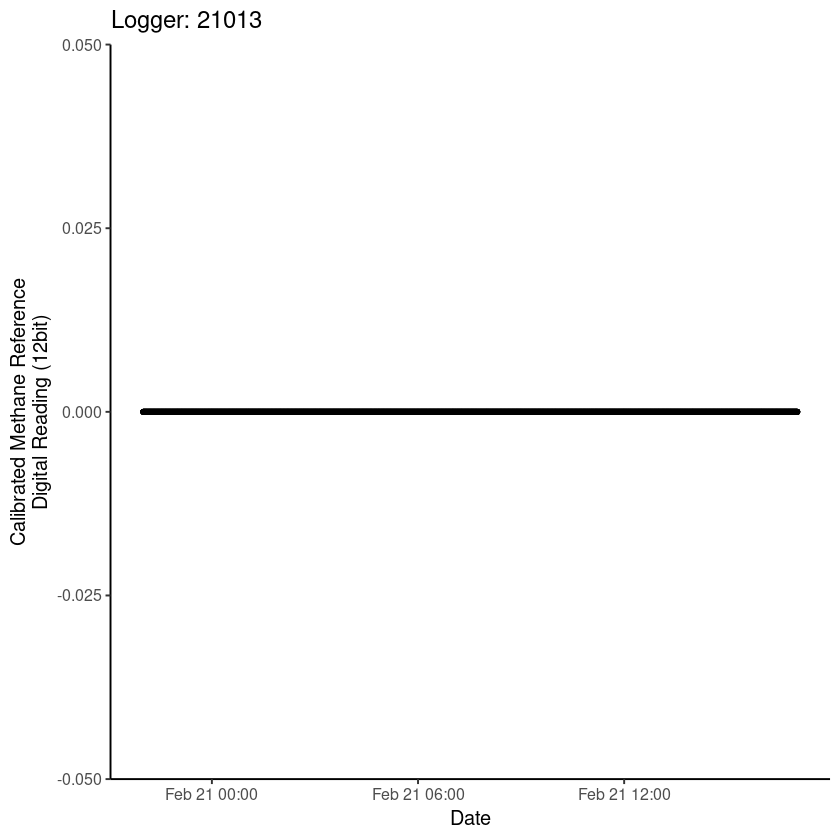

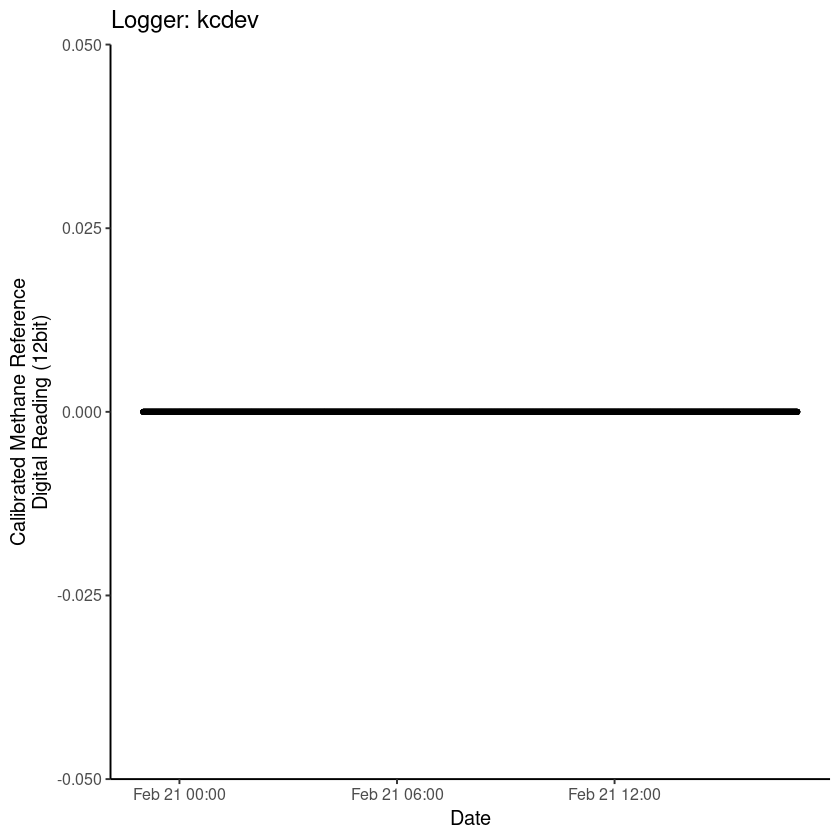

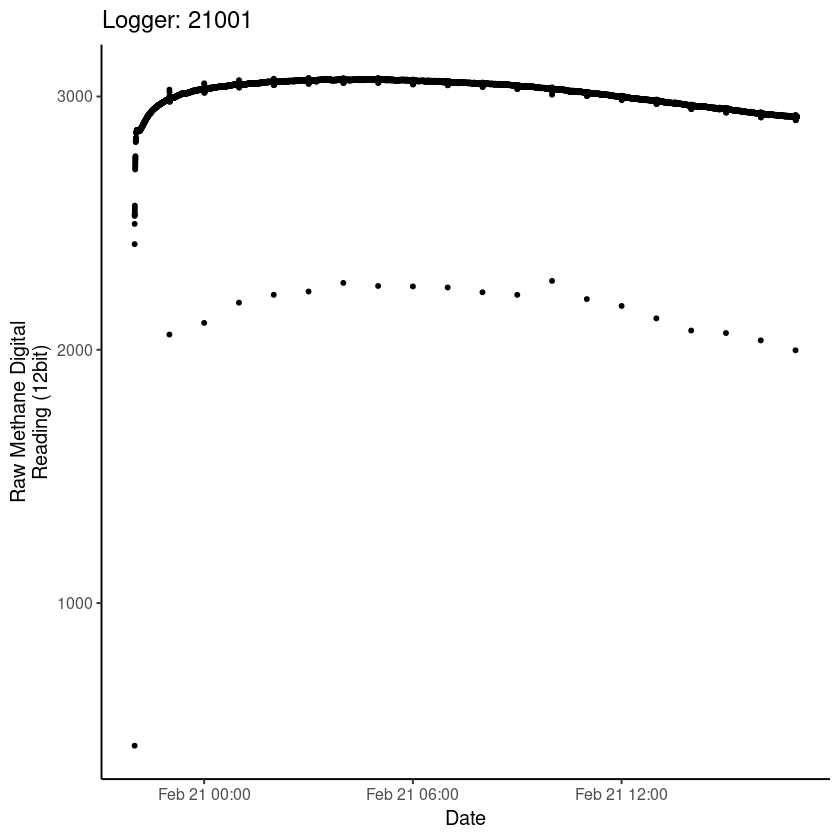

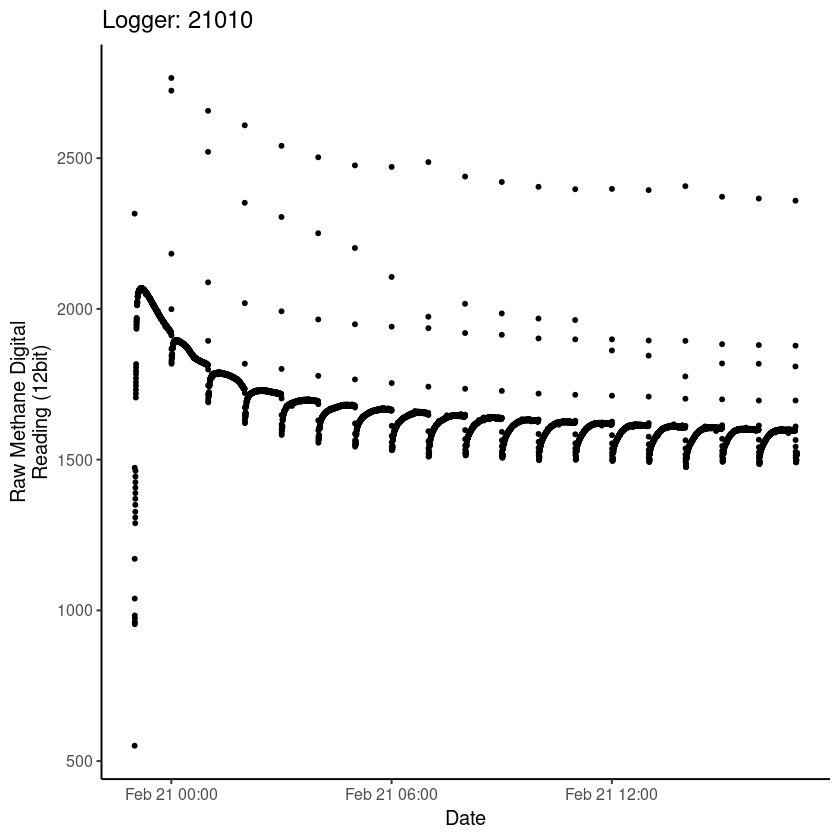

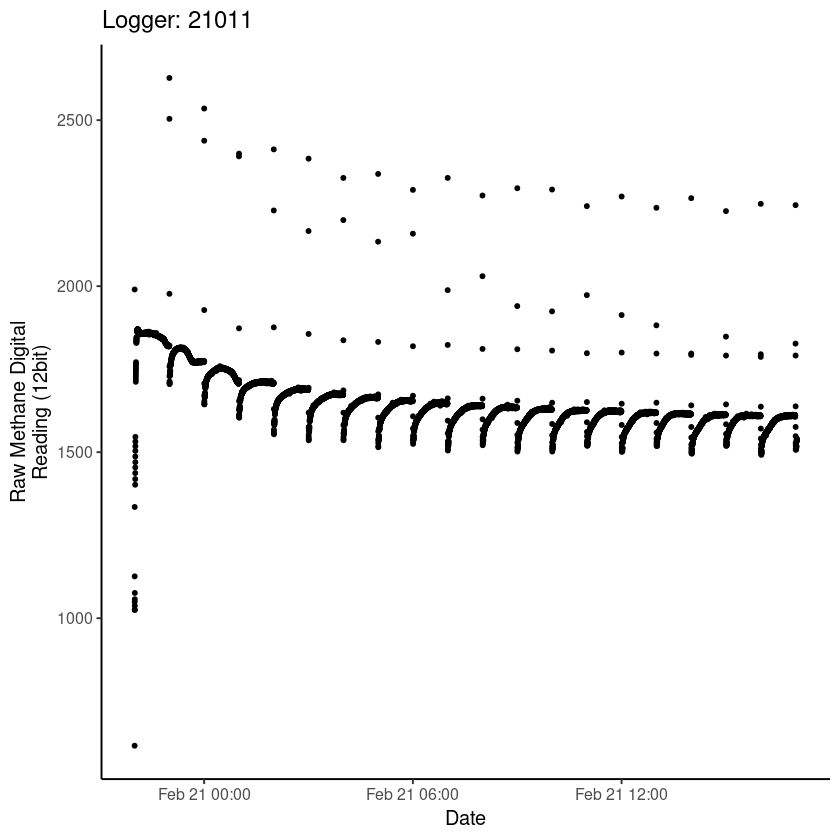

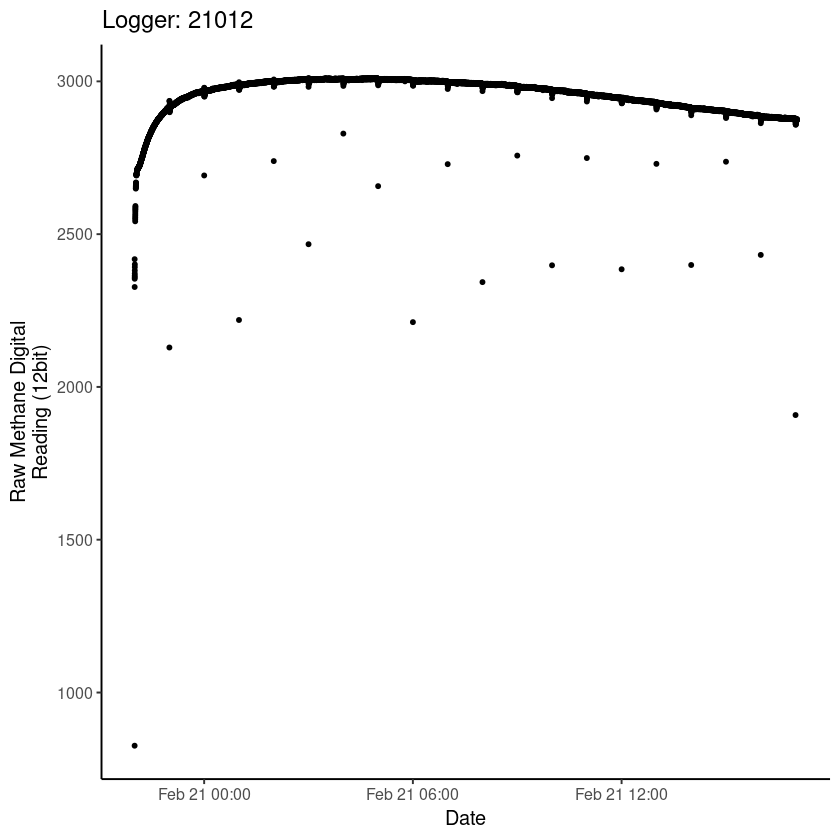

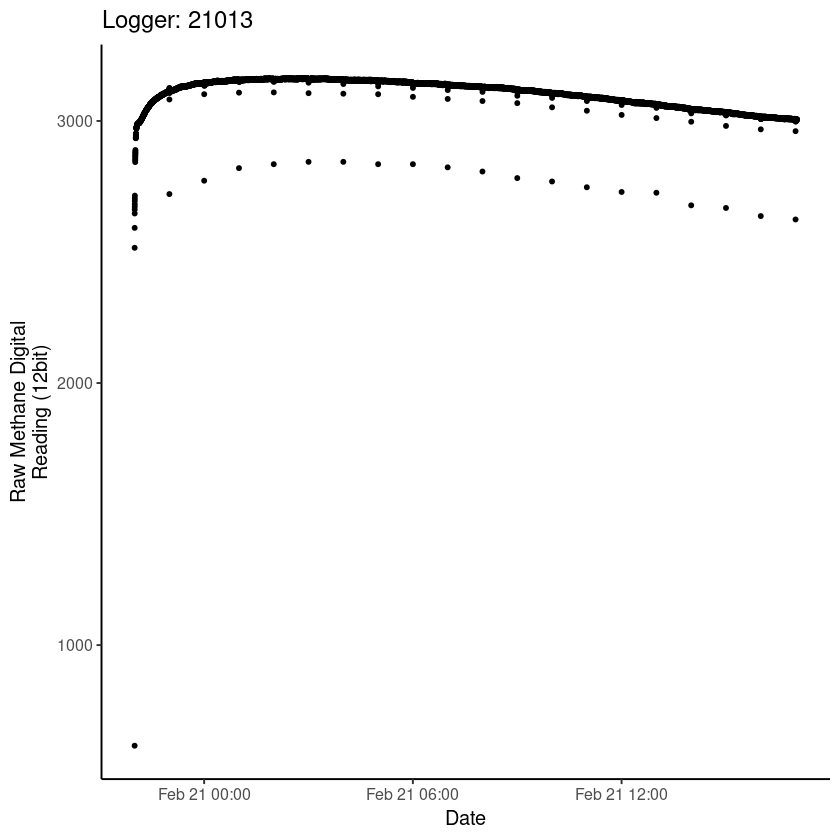

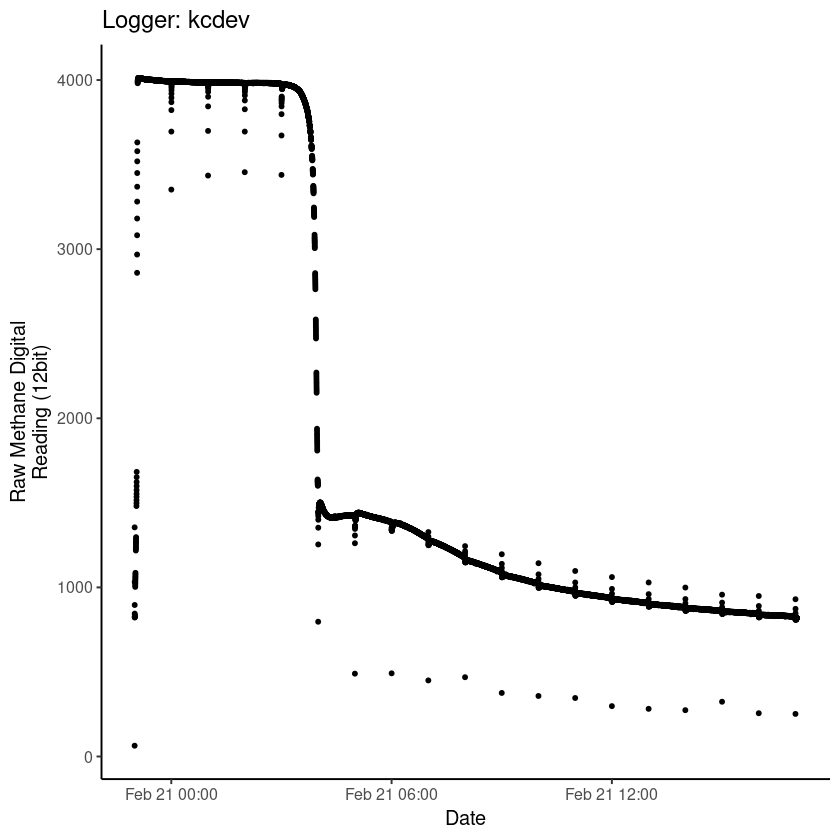

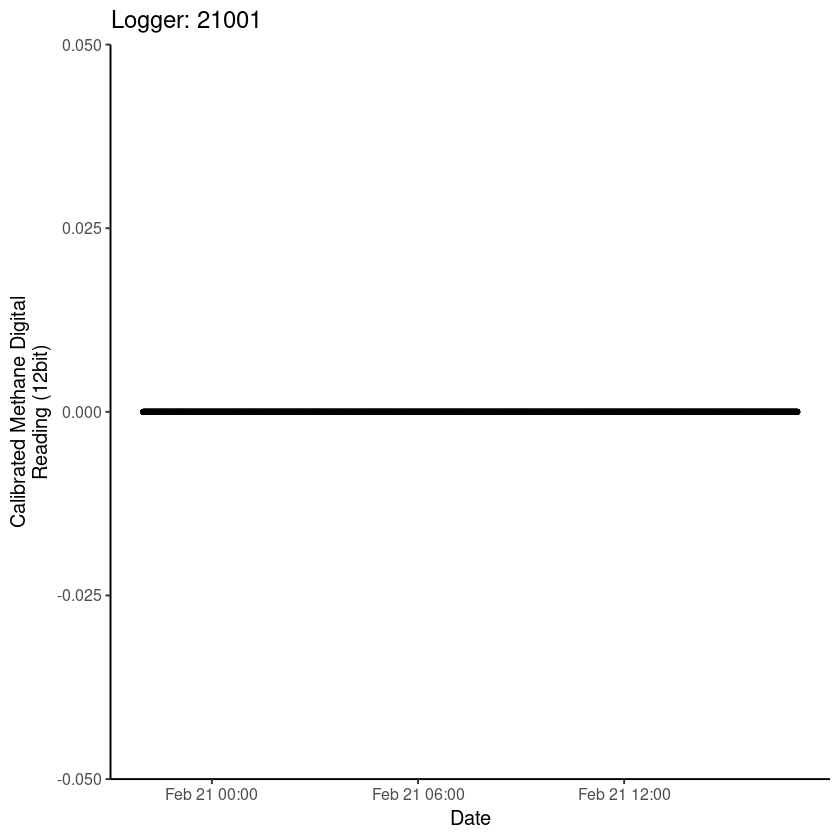

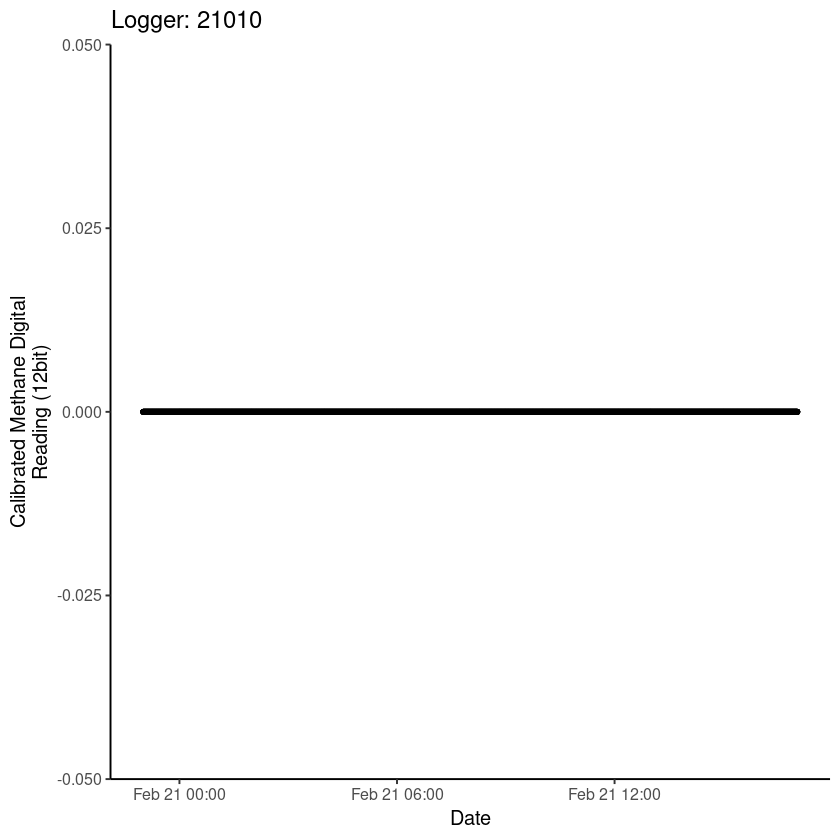

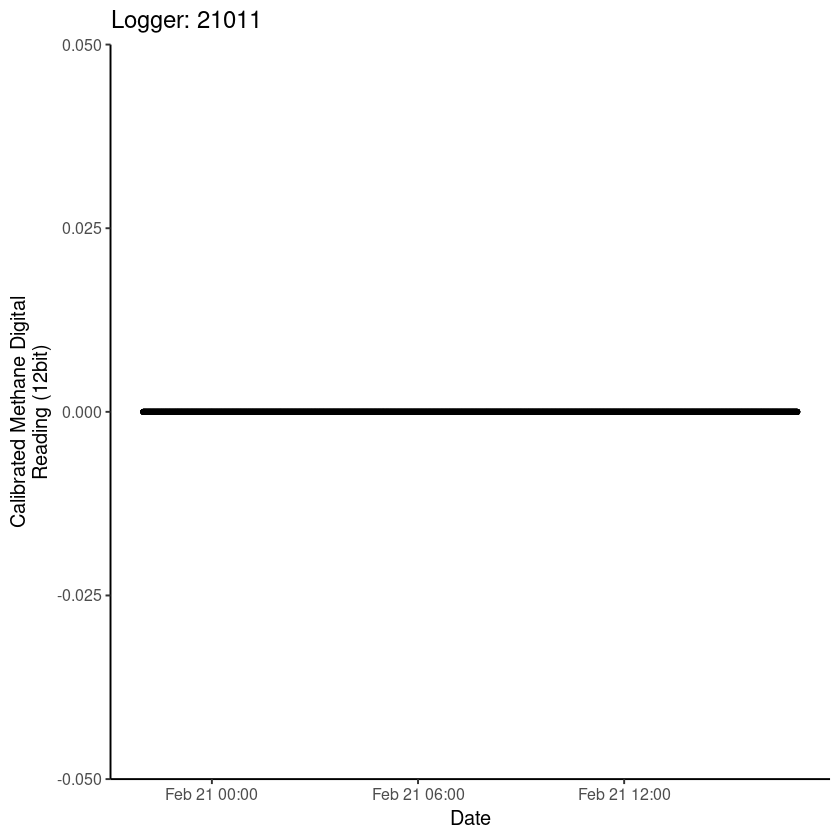

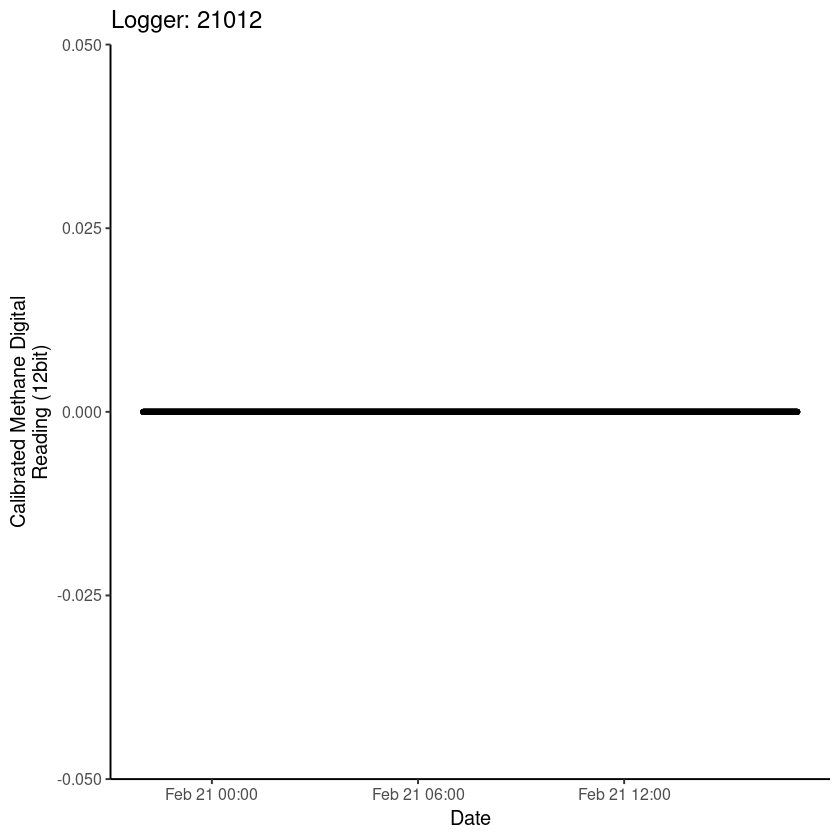

$battery.V
$battery.V$`21010`

$battery.V$`21011`

$battery.V$kcdev

$battery.V$`21012`

$battery.V$`21013`

$battery.V$`21001`


$dht_C
$dht_C$`21010`

$dht_C$`21011`

$dht_C$kcdev

$dht_C$`21012`

$dht_C$`21013`

$dht_C$`21001`


$dht_RH
$dht_RH$`21010`

$dht_RH$`21011`

$dht_RH$kcdev

$dht_RH$`21012`

$dht_RH$`21013`

$dht_RH$`21001`


$ch4rf_raw
$ch4rf_raw$`21010`

$ch4rf_raw$`21011`

$ch4rf_raw$kcdev

$ch4rf_raw$`21012`

$ch4rf_raw$`21013`

$ch4rf_raw$`21001`


$ch4rf_cal
$ch4rf_cal$`21010`

$ch4rf_cal$`21011`

$ch4rf_cal$kcdev

$ch4rf_cal$`21012`

$ch4rf_cal$`21013`

$ch4rf_cal$`21001`


$ch4_raw
$ch4_raw$`21010`

$ch4_raw$`21011`

$ch4_raw$kcdev

$ch4_raw$`21012`

$ch4_raw$`21013`

$ch4_raw$`21001`


$ch4_cal
$ch4_cal$`21010`

$ch4_cal$`21011`

$ch4_cal$kcdev

$ch4_cal$`21012`

$ch4_cal$`21013`

$ch4_cal$`21001`



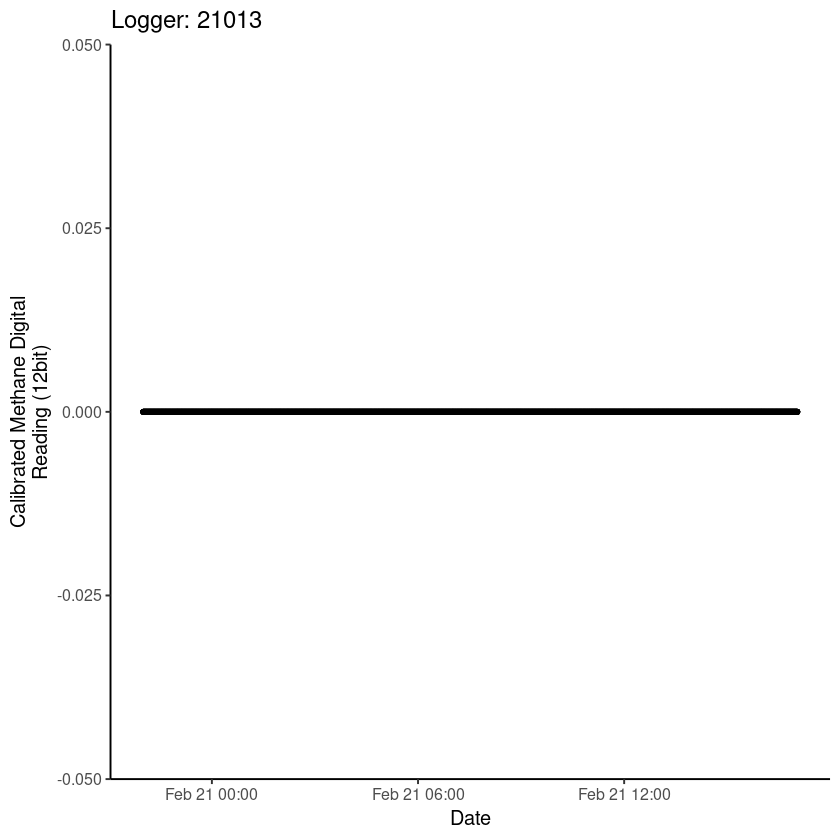

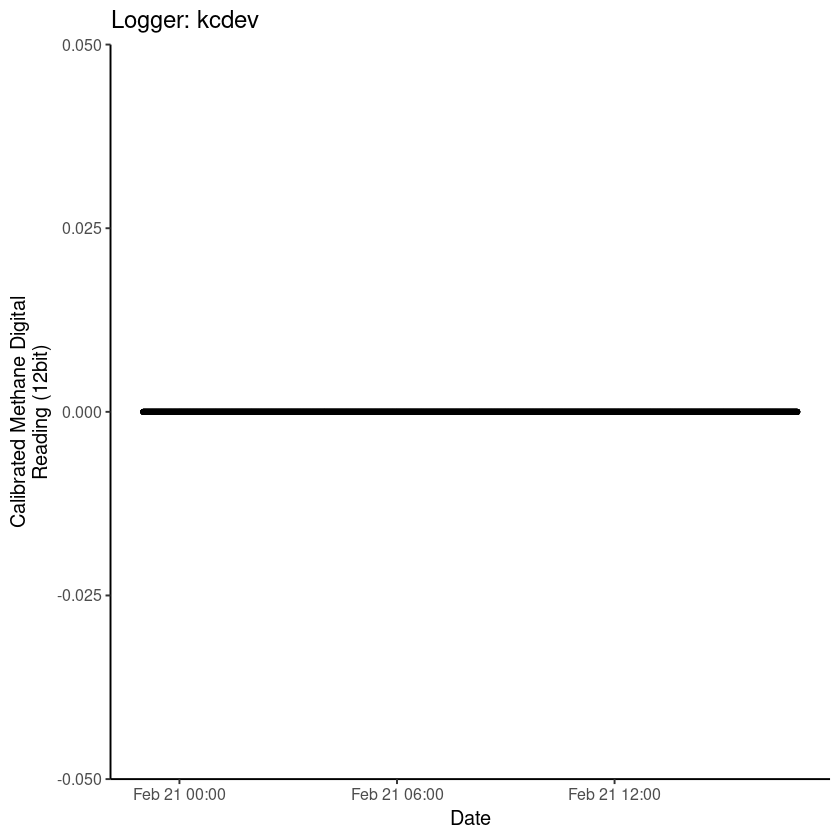

In [859]:
rawPD_individualPlots<-plot_individual_logger_data_v_time(raw_processed_data)

rawPD_individualPlots

savePlotListList(rawPD_individualPlots, "ip_all_raw_")

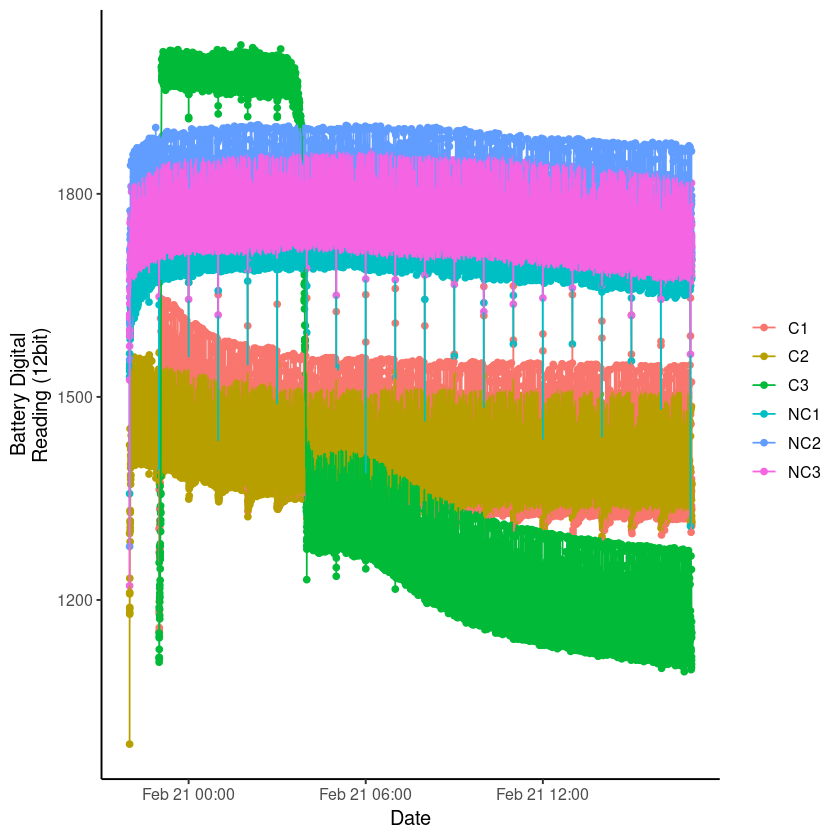

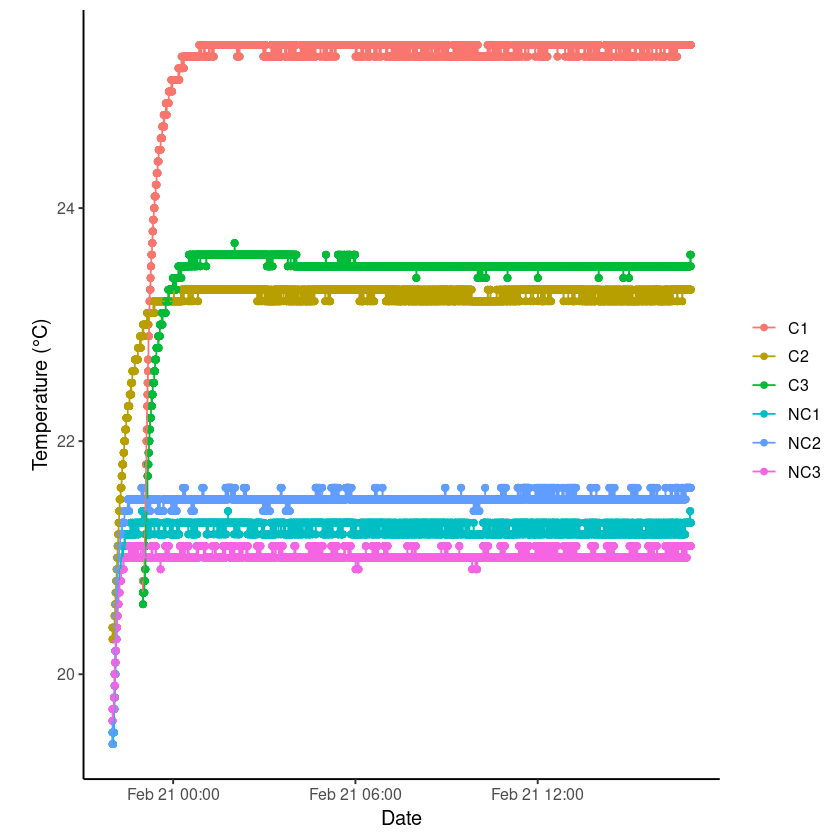

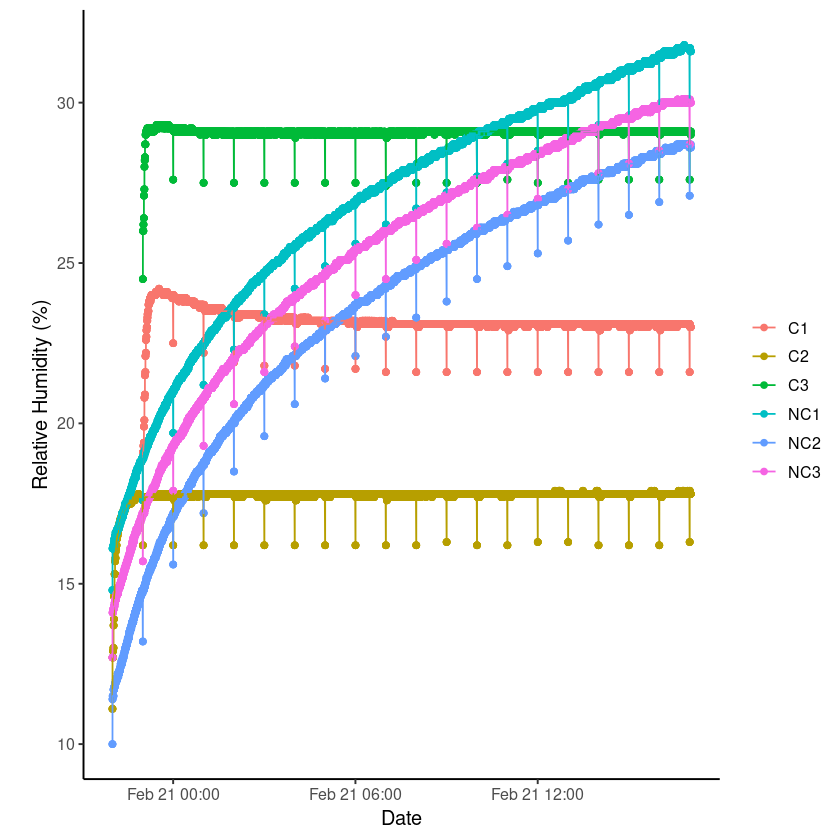

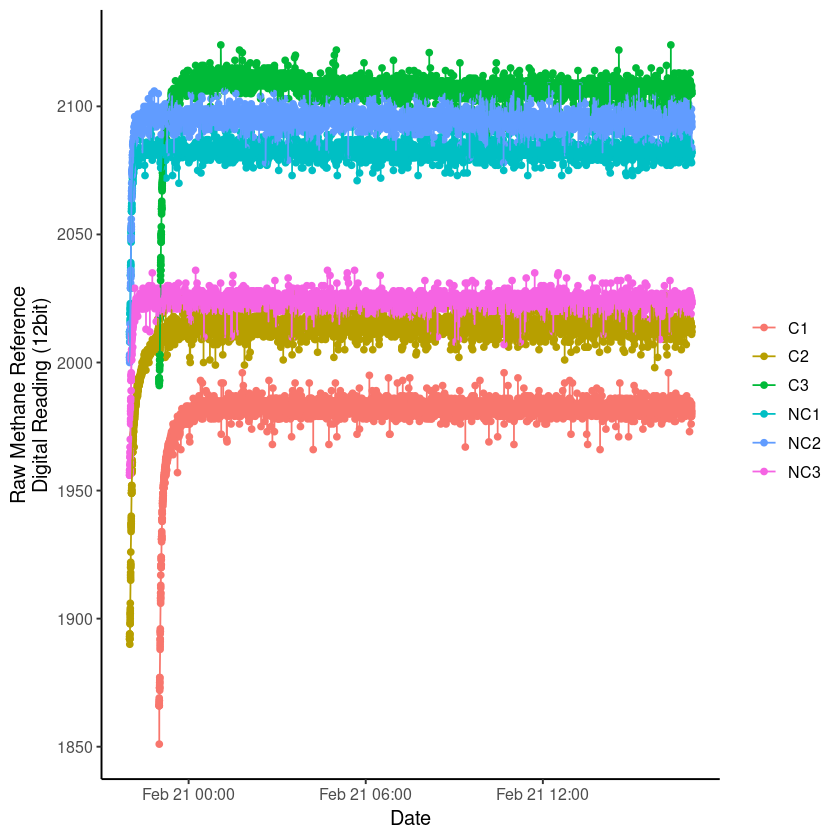

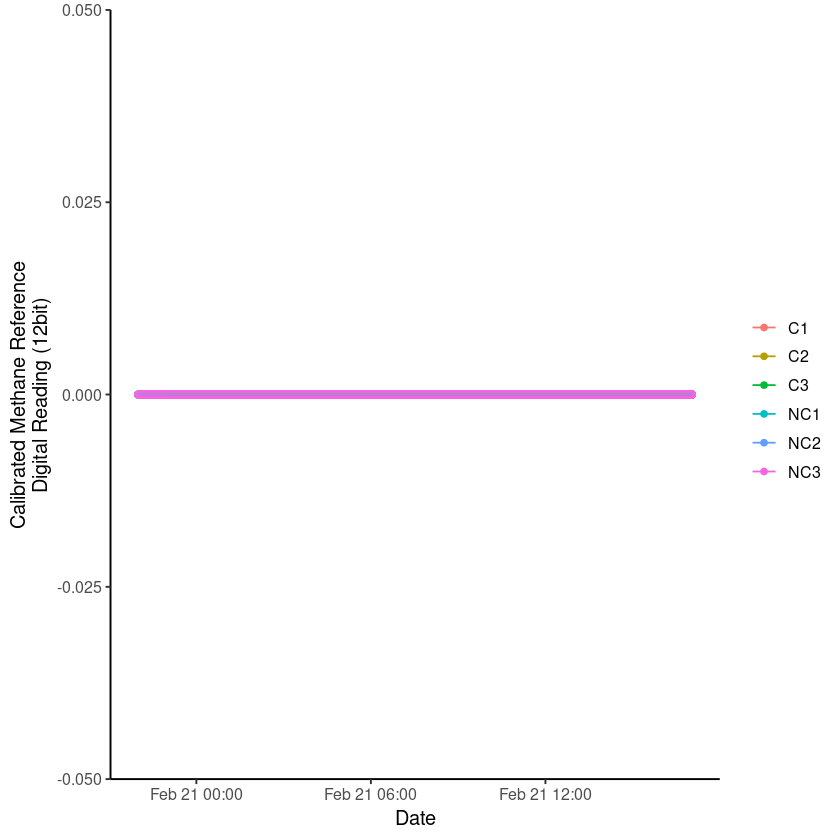

$battery.V

$dht_C

$dht_RH

$ch4rf_raw

$ch4rf_cal

$ch4_raw

$ch4_cal


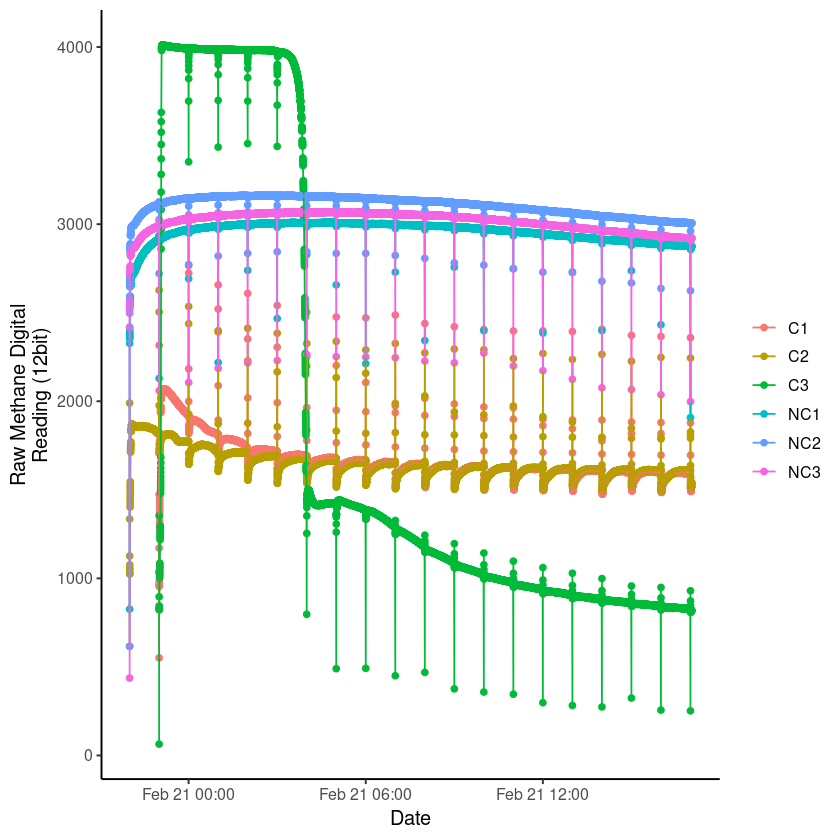

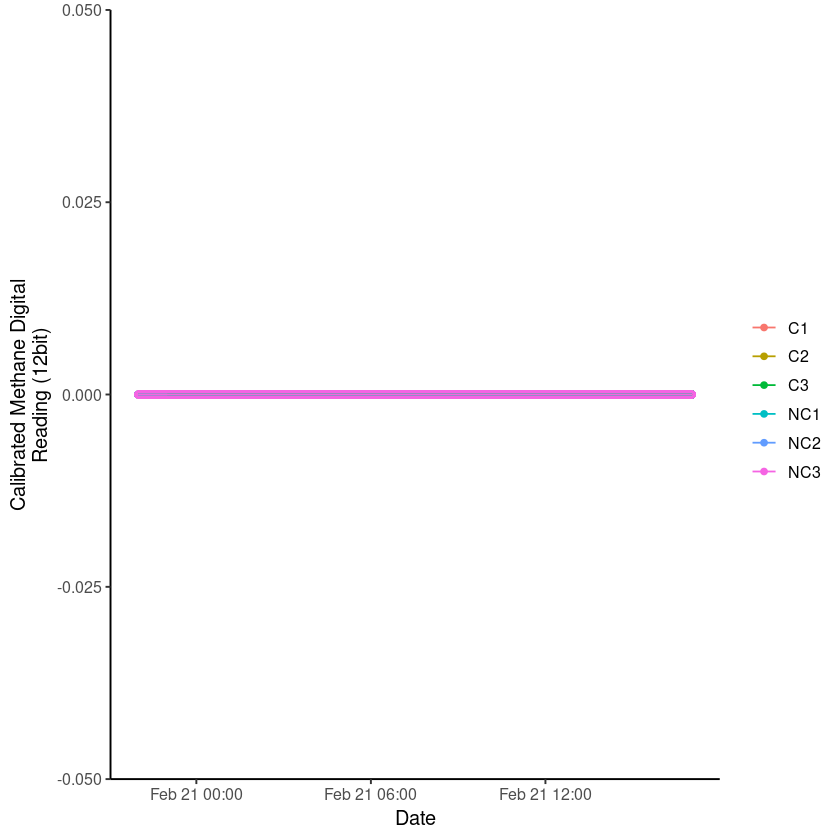

In [860]:
rawPD_loggerPlots<-plot_Data_v_Time(raw_processed_data, "site")
rawPD_loggerPlots

savePlotList(rawPD_loggerPlots, "lp_all_raw_")

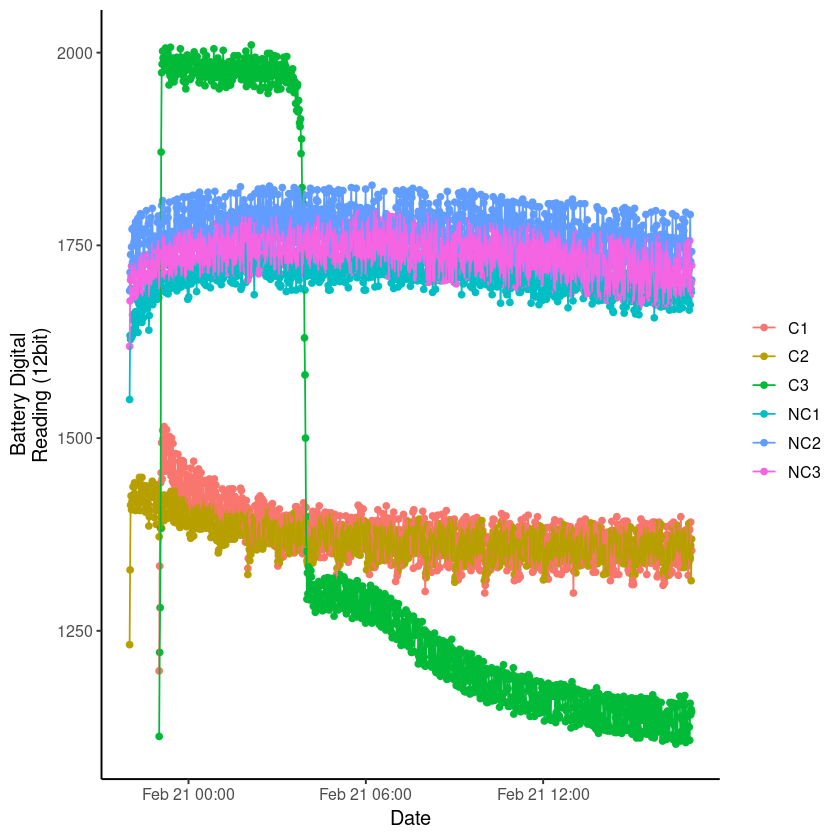

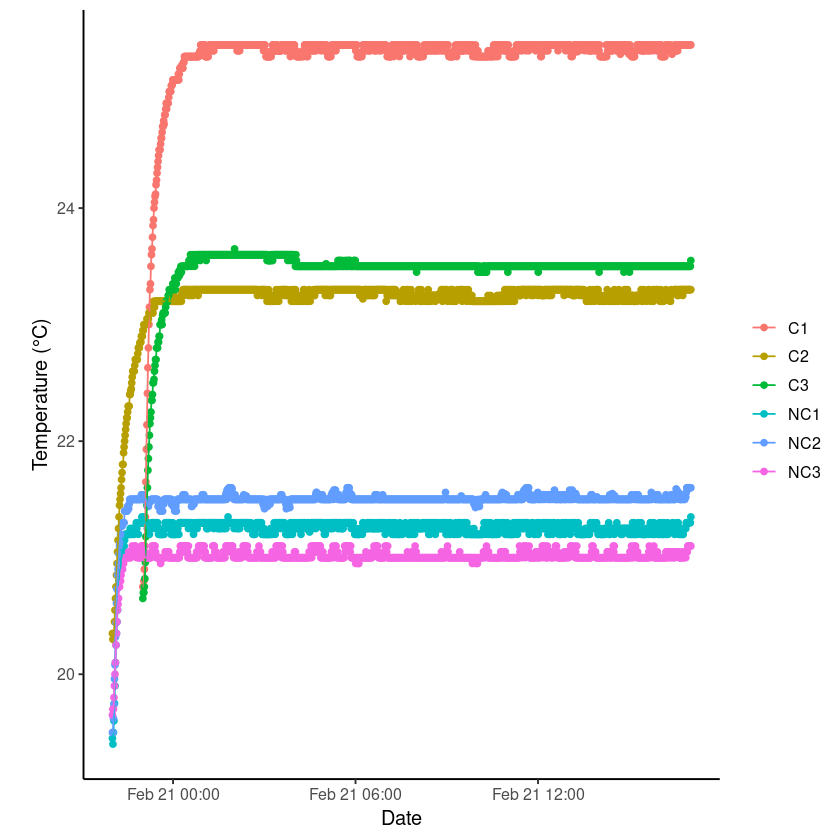

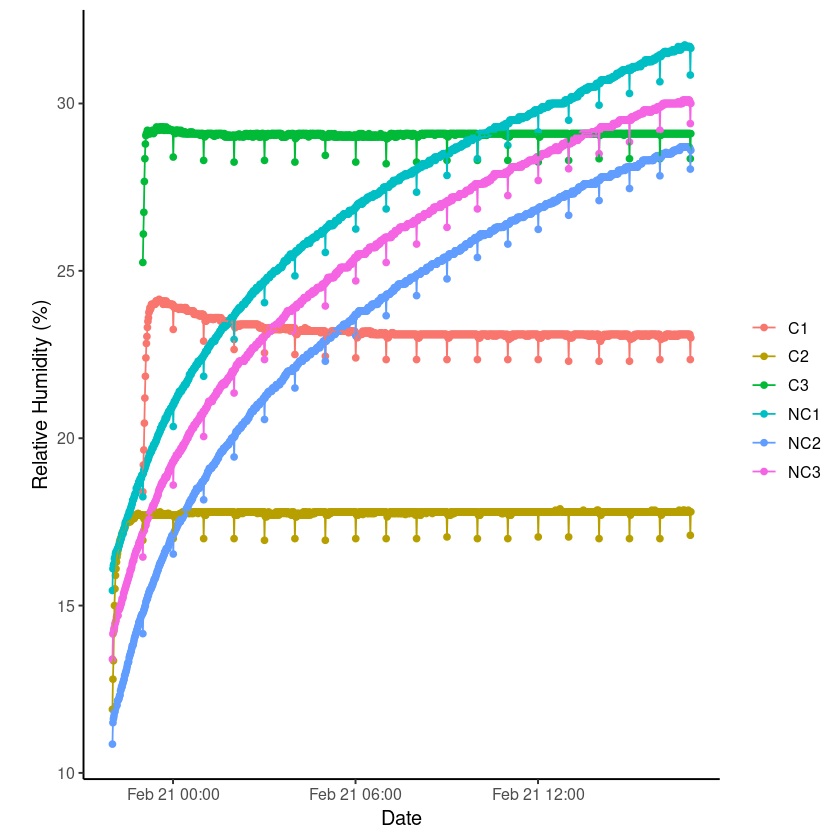

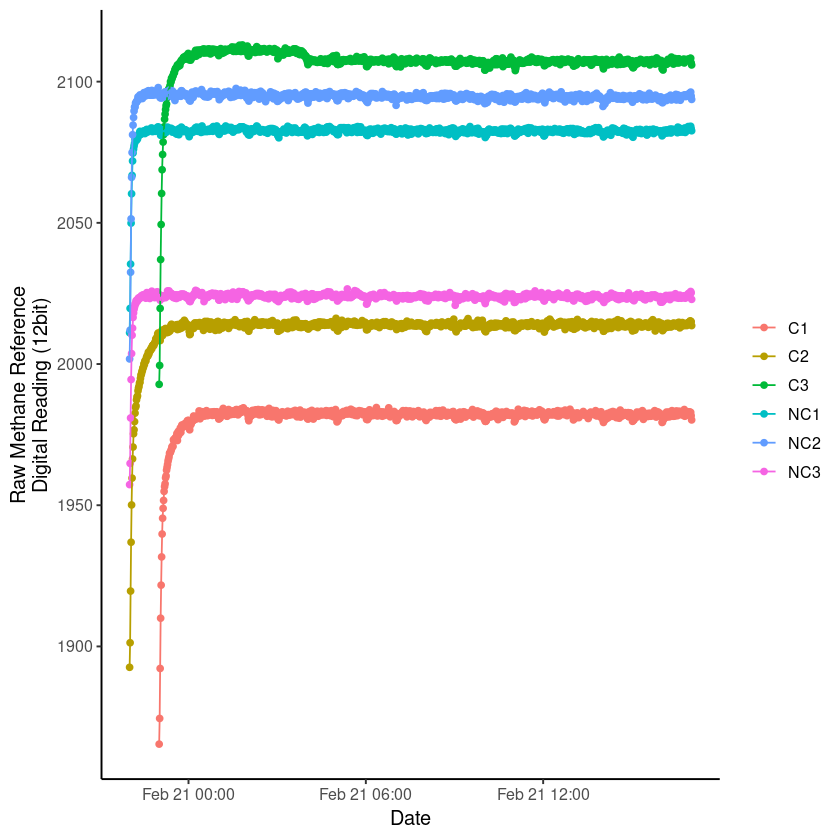

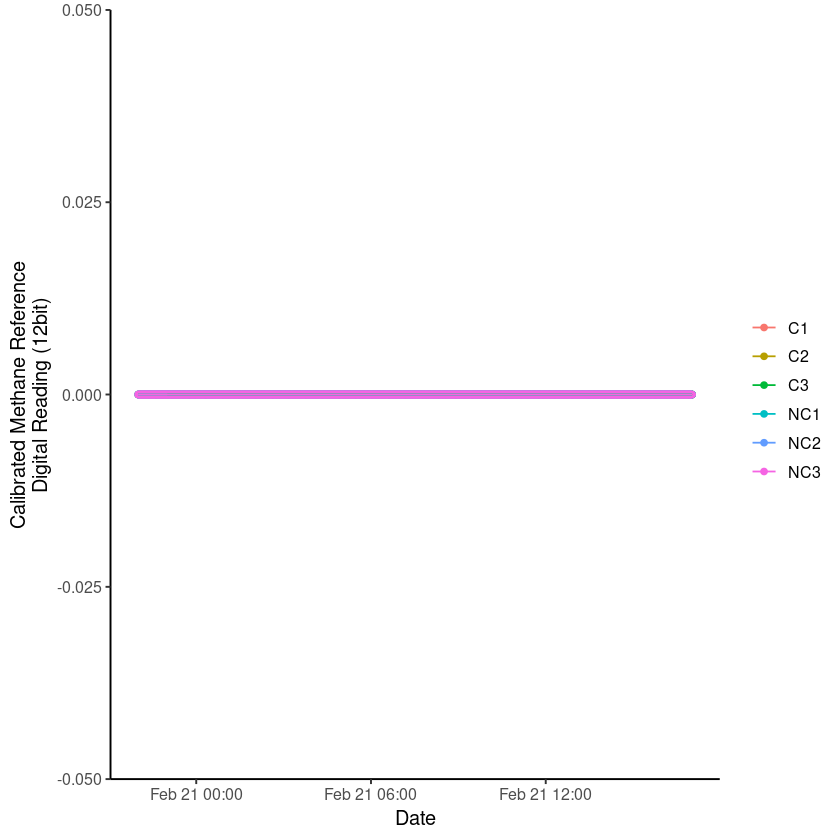

$battery.V

$dht_C

$dht_RH

$ch4rf_raw

$ch4rf_cal

$ch4_raw

$ch4_cal


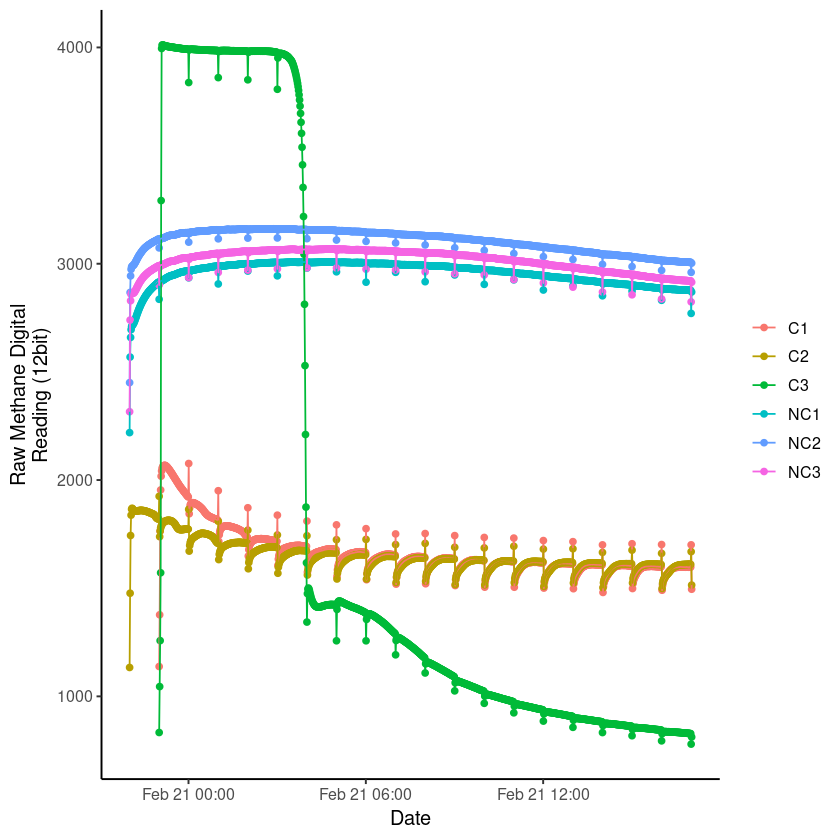

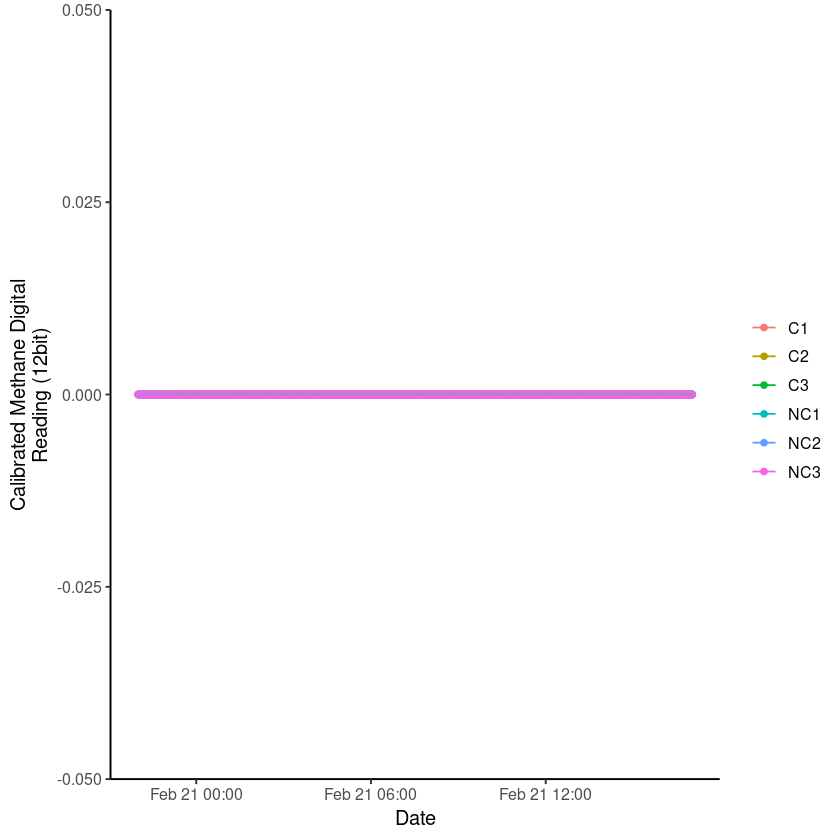

In [861]:
summaryPD_loggerPlots<-plot_Data_v_Time(summary_processed_data, "site")
summaryPD_loggerPlots

savePlotList(summaryPD_loggerPlots, "lp_all_summary_")

# HARDCODED work for 1000ppm data hour subsets

## can this be a function?
1. find time range of data set
2. subset the first hour and the last hour
3. check that all sensors were reading during each hour, otherwise subset the next hour
4. take the last 5 "complete" readings of each hour, 5 minutes of data
5. check that all sensors have 5 readings, otherwise move one minute
6. add "Relative_Hour" column and fill "first hour" for first set of readings and "last hour" for second
7. rbind() the two sets of 5 readings and save to csv "samples_{X}ppm" where X is the target concentration for the test

In [862]:
calibration_samples<-function(df, timeCol="time.h", uuidCol="uuid", sampleCount=5){
    # get time range of dataframe
    df_range<-range(df[[timeCol]])
    
    # set first hour time frame
    first_start<-round(df_range[1], units="hours")
    first_end<-first_start+(1*60*60)
    
    # set last hour time frame
    last_end<-round(df_range[2], units="hours")
    last_start<-last_end-(1*60*60)
    
    # count number of unique devices in data frame
    uuid_count<-length( unique(df[[uuidCol]]) )
    
    # calculate total sample size to be returned per hour
    total_sample_size<-uuid_count*sampleCount 
    
    # create first hour subset
    first_hour <- df[ df[[timeCol]]>first_start & df[[timeCol]]<first_end ,]
    
    # ensure first hour has data from each device
    while( length(unique(first_hour[[uuidCol]])) != uuid_count ){
        first_start<-first_start+(1*60*60)
        first_end<-first_end+(1*60*60)
        first_hour <- df[ df[[timeCol]]>first_start & df[[timeCol]]<first_end ,]
    }
    # move to subset of last values in the hour
    first_start<-first_end-(sampleCount*60)
    
    # remake the subset and check it has sampleCount values per device
    first_hour <- df[ df[[timeCol]]>first_start & df[[timeCol]]<first_end ,]
    while ( length(first_hour[[1]]) != total_sample_size ){
        first_start <- first_start - (1*60)
        first_end <- first_end - (1*60)
        first_hour <- df[ df[[timeCol]]>first_start & df[[timeCol]]<first_end ,]
    }
    first_hour$relative_hour<-"first hour"
    
    #repeat for last_hour, TODO: combine into a loop, but switch +/- for first/last?
    last_hour <- df[ df[[timeCol]]>last_start & df[[timeCol]]<last_end ,]
    while( length(unique(last_hour[[uuidCol]])) != uuid_count ){
        last_start<-last_start-(1*60*60)
        last_end<-last_end-(1*60*60)
        last_hour <- df[ df[[timeCol]]>last_start & df[[timeCol]]<last_end ,]
    }
    last_start<-last_end-(sampleCount*60)
    last_hour <- df[ df[[timeCol]]>last_start & df[[timeCol]]<last_end ,]
    while ( length(last_hour[[1]]) != total_sample_size ){
        last_start <- last_start - (1*60)
        last_end <- last_end - (1*60)
        last_hour <- df[ df[[timeCol]]>last_start & df[[timeCol]]<last_end ,]
    }
    last_hour$relative_hour<-"last hour"
    
    # debug messages, final timestamps used
    print(first_start)
    print(first_end)
    print(last_start)
    print(last_end)
    
    # return both subsets combined
    return( rbind(first_hour, last_hour) )
}

In [863]:
samples<-calibration_samples(summary_processed_data)

ppm_tag<-gsub(".*_(.+)ppm_.*", "\\1", directory)
ppm_tag<-paste(ppm_tag,"ppm",sep="")

saveDFcsv(samples,ppm_tag)

[1] "2023-02-20 23:55:00 UTC"
[1] "2023-02-21 UTC"
[1] "2023-02-21 16:55:00 UTC"
[1] "2023-02-21 17:00:00 UTC"
[1] "~/Desktop/data/mesoBinTests/20230220_1000ppm_20230221_1210/RRIV_output/samples_1000ppm.csv"


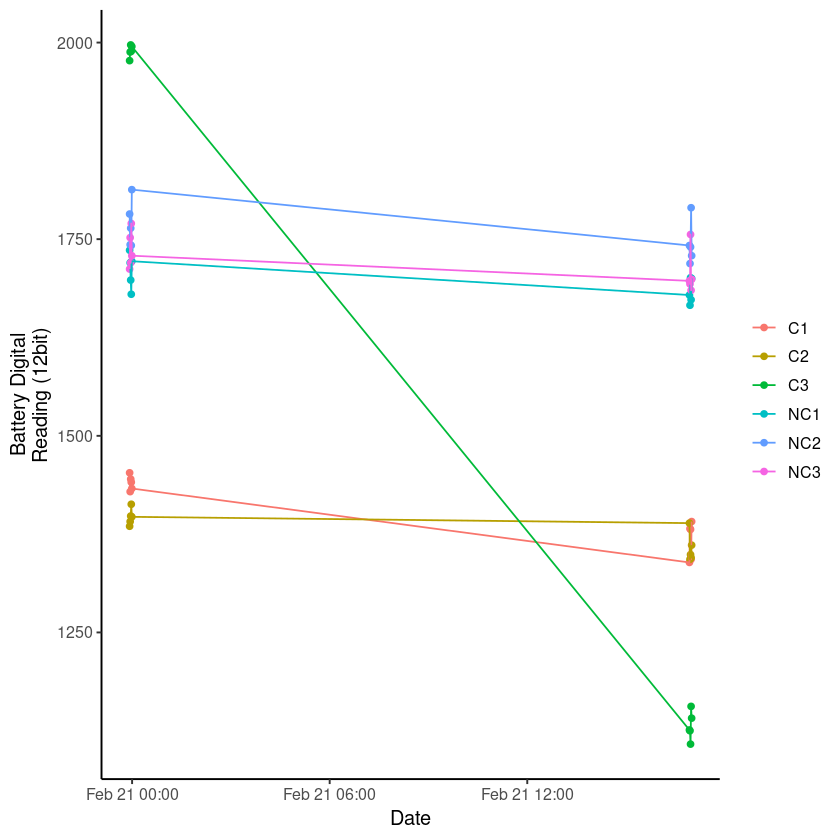

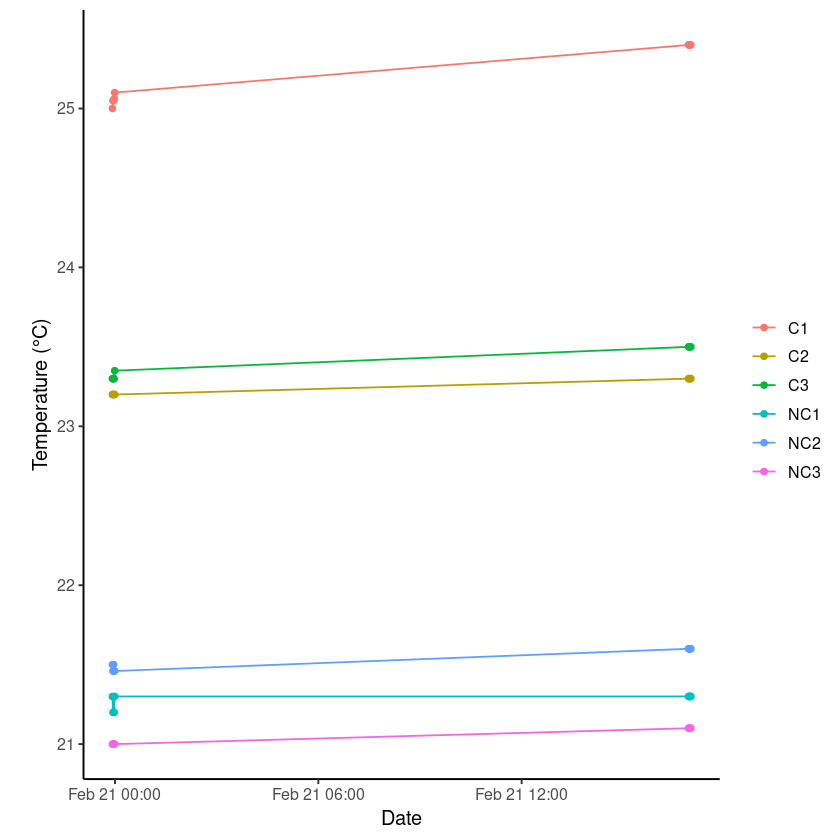

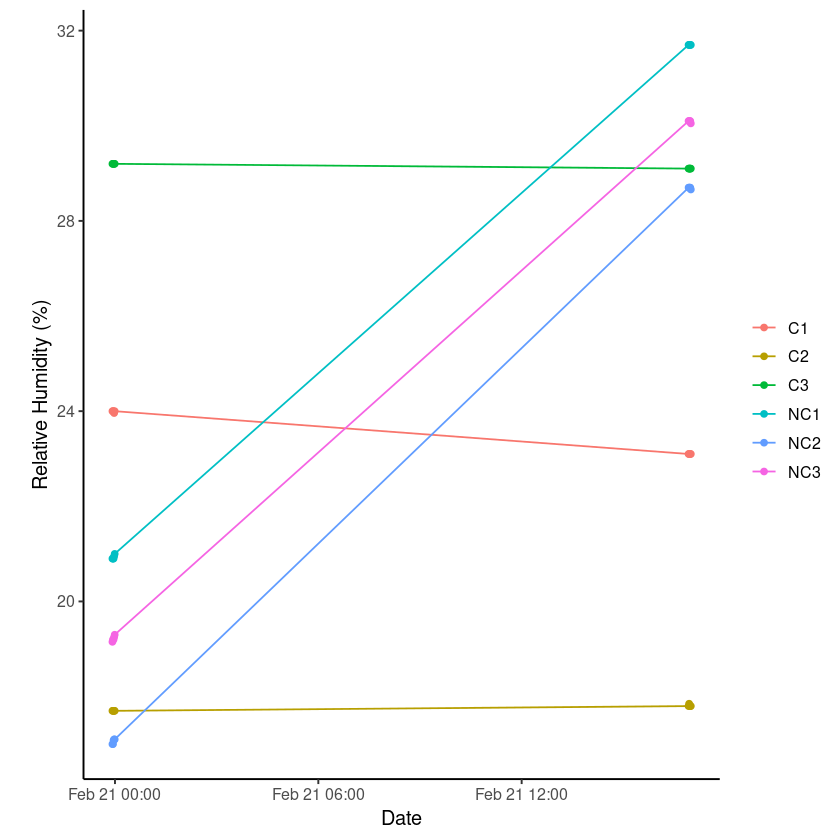

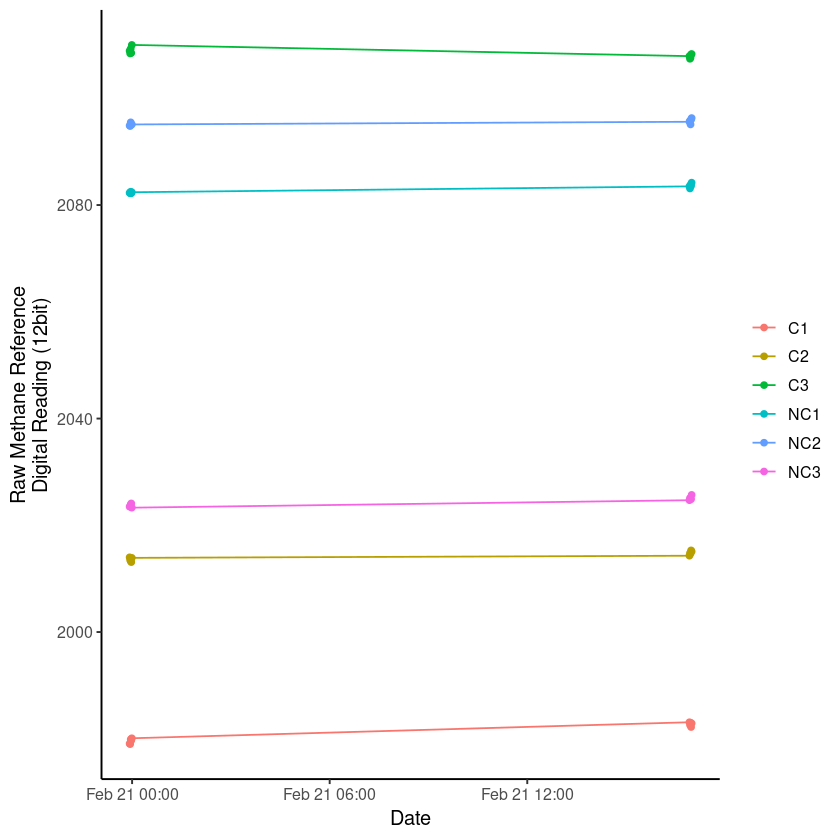

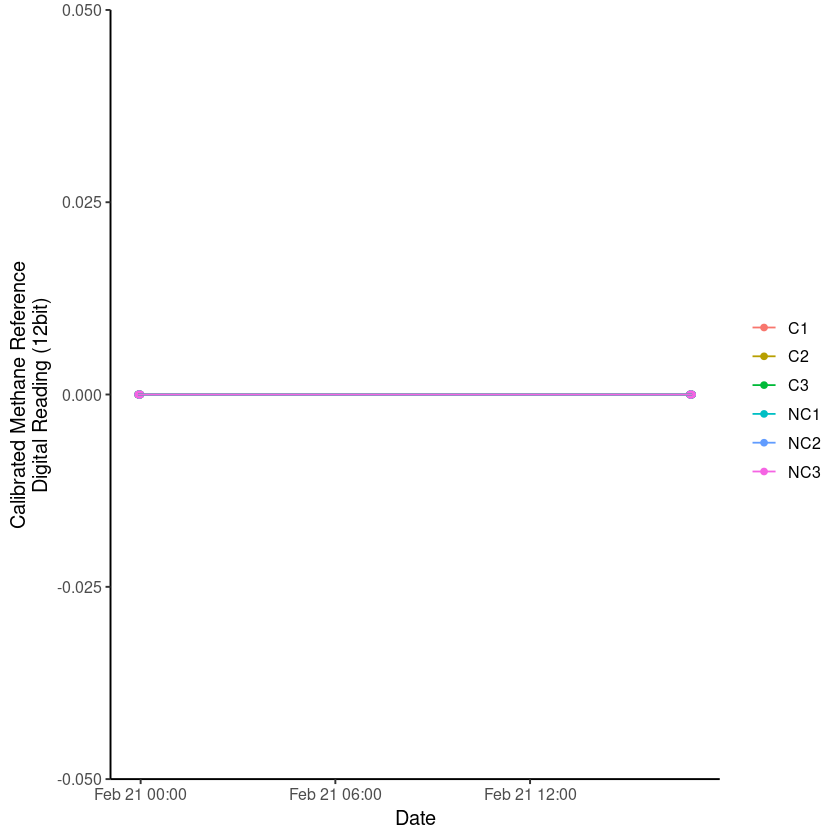

$battery.V

$dht_C

$dht_RH

$ch4rf_raw

$ch4rf_cal

$ch4_raw

$ch4_cal


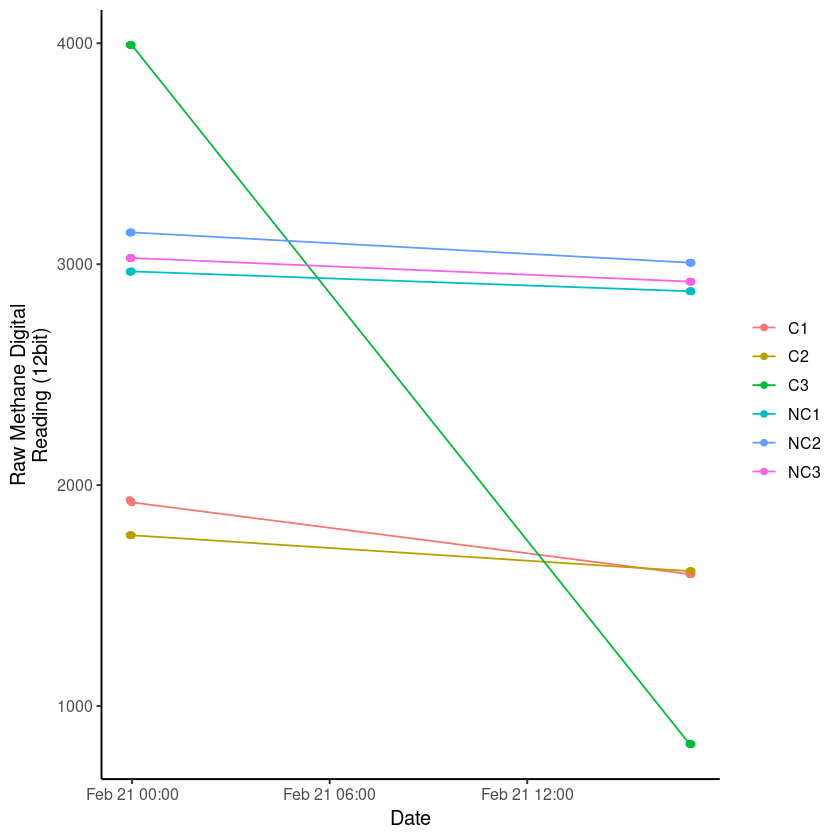

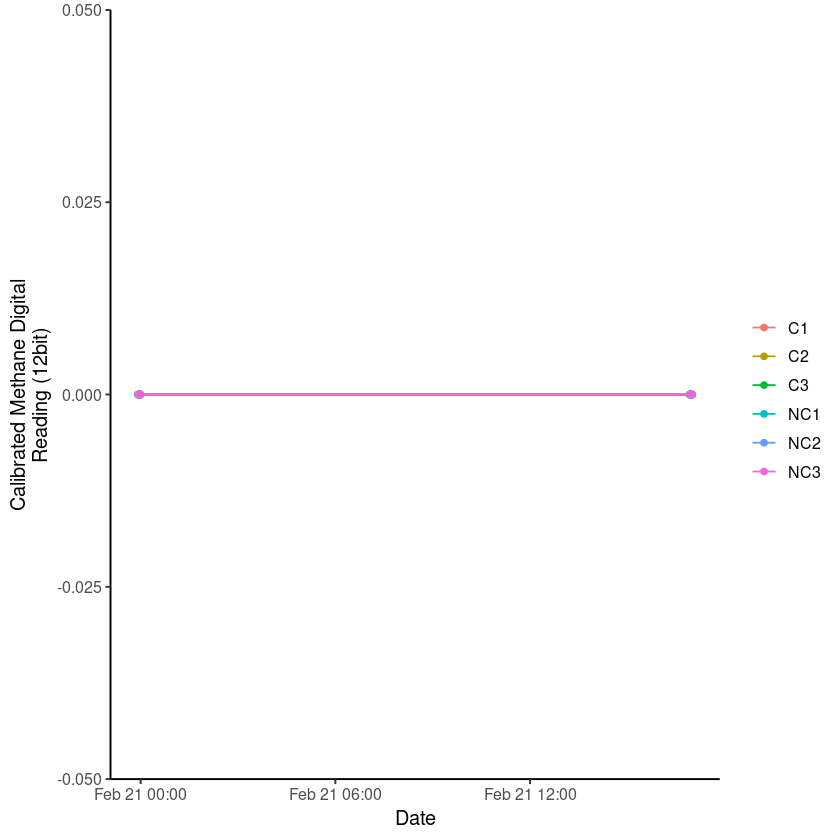

In [864]:
sample_plots<-plot_Data_v_Time(samples,"site")
sample_plots

savePlotList(sample_plots, "sample_plots_")

In [865]:
outputDir
# head(raw_processed_data)

[1] "~/Desktop/data/mesoBinTests/20230220_1000ppm_20230221_1210/RRIV_output/"

In [46]:
# lookat<-subset(summary_manualCVdata, logger=loggerList[1])
# head(lookat)

# names(individualPlots[[1]])

# deparse(substitute(individualPlots))
# deparse(quote(individualPlots))

# class(summary_manualCVdata$logger)

#### Burst vs CH4, colored by measurementCycle
#TODO all variables?

In [47]:
# summary_CvVsCH4_plots<-cycleVsCH4_plots(summary_manualCVdata, "summary")

# summary_CvVsCH4_plots

# savePlotList(summary_CvVsCH4_plots, "summary_CvVsCH4_")

In [48]:
# test<-subset(summary_manualCVdata,logger==21003 & type=="summary")
# test
# length(test[,1])

#### Time vs CH4

In [49]:
# timeVsCH4_plots<-function(df, loggerCount, loggerList, dataType){
#     plots<-vector("list", loggerCount)
#     names(plots)<-loggerList
#     for(i in 1:loggerCount){
#         data<-subset(df,logger==loggerList[i] & type==dataType)
#         plots[[i]]<-ggplot(data,aes(time.h,ch4_raw))+
#         geom_point()+ggtitle(paste("Logger: ",loggerList[i],"\nData type: ", dataType,sep=""))
#     }
#     return(plots)
# }

In [50]:
# manualCV_timeVsCH4_plots<-timeVsCH4_plots(summary_manualCVdata, loggerCount, loggerList, "summary")

# manualCV_timeVsCH4_plots

# savePlotList(manualCV_timeVsCH4_plots, outputDir, "manualCV_timeVsCH4_")

#### Time vs Temperature (C)

In [51]:
# timeVsC_plots<-function(df, loggerCount, loggerList, dataType){
#     plots<-vector("list", loggerCount)
#     names(plots)<-loggerList
#     for(i in 1:loggerCount){
#         data<-subset(df,logger==loggerList[i] & type==dataType)
#         plots[[i]]<-ggplot(data,aes(time.h,dht_C))+
#         geom_point()+ggtitle(paste("Logger: ",loggerList[i],"\nData type: ", dataType))
#     }
#     return(plots)
# }

In [52]:
# manualCV_timeVsC_plots<-timeVsC_plots(summary_manualCVdata, loggerCount, loggerList, "summary")

# manualCV_timeVsC_plots

# savePlotList(manualCV_timeVsC_plots, outputDir, "manualCV_timeVsC_")

#### Time vs Relative Humidity plots

In [53]:
# timeVsRH_plots<-function(df, loggerCount, loggerList, dataType){
#     plots<-vector("list", loggerCount)
#     names(plots)<-loggerList
#     for(i in 1:loggerCount){
#         data<-subset(df,logger==loggerList[i] & type==dataType)
#         plots[[i]]<-ggplot(data,aes(time.h,dht_RH))+
#         geom_point()+ggtitle(paste("Logger: ",loggerList[i],"\nData type: ", dataType))
#     }
#     return(plots)
# }

In [54]:
# manualCV_timeVsRH_plots<-timeVsRH_plots(summary_manualCVdata, loggerCount, loggerList, "summary")

# manualCV_timeVsRH_plots

# savePlotList(manualCV_timeVsRH_plots, outputDir, "manualCV_timeVsRH_")


In [55]:
# TODO: place these respective plots next to each other for better visualization? 
# either group by logger, or group by type of data?

In [56]:
# cv_burst_20<-subset(parseDataCV,logger==21004 & as.integer(burst)>20)

# mean_na<-function(x){mean(x,na.rm=TRUE)}

# test<-summaryBy(roll_cv~measurement_cycle,cv_burst_20,FUN=c(mean_na))
# test$logger<-unique(cv_burst_20$logger)
# test$deployed_at<-lubridate::as_datetime(unique(cv_burst_20$deployed_at))

In [57]:
# comp_cv_burst_20<-subset(comp_cv_50FF74068678545256252467,burst>20)

In [58]:
# mean_na<-function(x){mean(x,na.rm=TRUE)}

# comp_sum_50FF74068678545256252467<-summaryBy(roll_cv~measurement_cycle,comp_cv_burst_20,FUN=c(mean_na))
# comp_sum_50FF74068678545256252467$uuid<-unique(comp_cv_50FF74068678545256252467$uuid)
# comp_sum_50FF74068678545256252467$deployed_at<-lubridate::as_datetime(unique(comp_cv_50FF74068678545256252467$deployed_at))

In [59]:
# head(comp_sum_50FF74068678545256252467)
# saveRDS(comp_sum_50FF74068678545256252467,"comp_sum_50FF74068678545256252467.rds")

In [60]:
# comp_parse<-parse_data(subset(comp_data,uuid=="50FF74068678545256252467"),30,30)
# ggplot(comp_parse,aes(as.factor(burst),atlas_CO2_ppm))+
# geom_point()

### Calculating rolling CV on a measurement cycle.

In [61]:
# head(comp_parse)

In [62]:
# comp_data_sum<-summaryBy(ch4_raw+ch4rf_raw~dtp+uuid,comp_parse,FUN=c(sd,mean))

In [63]:
# head(comp_data_sum)
#comp_parse$dtp

## Plotting average values per burst.

In [64]:
# comp_data_sum$dtp<-as_datetime(comp_data_sum$dtp)

# head(comp_data_sum)

# ggplot(comp_data_sum,aes(dtp,ch4_raw.mean))+
# geom_point()+
# facet_wrap(.~uuid)


# ggplot(comp_data_sum,aes(dtp,ch4rf_raw.mean))+
# geom_point()+
# facet_wrap(.~uuid)

# comp_data_sum$ch4_raw_norm<-comp_data_sum$ch4_raw.mean/comp_data_sum$ch4rf_raw.mean

# ggplot(comp_data_sum,aes(dtp,ch4_raw_norm))+
# geom_point()+
# facet_wrap(.~uuid)

In [65]:
# ggplot(subset(comp_data),aes(dtp,battery.V))+
#     geom_point(aes(color=as.factor(group)))+
# ylim(1500,1650)

In [66]:
# names(comp_data)

In [67]:
# ggplot(comp_data,aes(dtp,atlas_CO2_ppm))+
#        geom_point()

In [68]:
# head(comp_data,n=100)

# scratch

In [69]:
# dir<-'~/Desktop/data/mesoBinTests/20221110_pull/'

In [70]:
# list.files(path=directory2, recursive=TRUE)

In [71]:
# files<-list.files(path=directory2, recursive=TRUE, pattern=".CSV$")

# files

In [72]:
# exclude<-list("notes.txt","debug.csv","metadata.rtf")

# files<-list.files(path=dir, recursive=TRUE)

# files[!(files %in% exclude)]

# Process gas analyzer data

## Function to unzip, read, and concatenate gas analyzer files

In [73]:
concat_gas_analyzer<-function(directory){
    readZIP<-function(filepath){
        fileData<-read.csv(unzip(filepath),skip=1, header=TRUE)
    }

    #list all .zip files
    gas_files<-list.files(path=dir, recursive=TRUE, pattern="*.zip$", full.names=TRUE)
    
    #subset files larger than 500 bytes (has content or not)
    gas_files<-subset(gas_files, file.info(gas_files)[,1]>300)

    #read each file and output a single dataframe
    data<-do.call(rbind, lapply(gas_files,readZIP))
    
    #process time column [note: OS is not showing the fractional second, but it is preserved]
    # time column is in PST, change to UTC manually
    if(directory=="~/Desktop/data/mesoBinTests/20221216_Experiment/Gas Analyzer"){
        data$datetime<-lubridate::as_datetime(data$Time,format="%m/%d/%Y %H:%M:%OS", tz="PST")
        data$datetime<-force_tz(data$datetime, tz="UTC") # data was in wrong timezone
    } else if (directory=="~/Desktop/data/mesoBinTests/20230202_calibration_70F/Gas Analyzer"){
        data$datetime<-lubridate::as_datetime(data$Time)
        data$datetime<-data$datetime - (3*60*60) # off by 3 hours due to incorrectly setting time on LGR
    } else {
        data$datetime<-lubridate::as_datetime(data$Time)
    }
    
    # Wantonly remove any .txt files in the working directory, which is default location for unzip
    # Issue if there are any desirable .txt files stored in the working directory
    file.remove(list.files(path=getwd(), recursive=FALSE, pattern=".txt$", full.names=TRUE))
    
    return(data)
}

# matching directory where gas analyzer folder is
## TODO: affix "/Gas Analyzer" to directory instead, condition for start time separate

In [74]:
if(directory=="~/Desktop/data/mesoBinTests/20221216_Experiment/RRIV"){
    dir<-"~/Desktop/data/mesoBinTests/20221216_Experiment/Gas Analyzer"
} else if(directory=="~/Desktop/data/mesoBinTests/20230118_floatingbucket/RRIV"){
    dir<-"~/Desktop/data/mesoBinTests/20230118_floatingbucket/Gas Analyzer"
} else if(directory=="~/Desktop/data/mesoBinTests/20230119_floatingbucket/RRIV"){
    #failed to parse data is switch in timestamp format on gas analyzer from PST to UTC output
    dir<-"~/Desktop/data/mesoBinTests/20230119_floatingbucket/Gas Analyzer"
} else if(directory=="~/Desktop/data/mesoBinTests/20230126_floatingbucket/RRIV"){
    dir<-"~/Desktop/data/mesoBinTests/20230126_floatingbucket/Gas Analyzer"
} else if(directory=="~/Desktop/data/mesoBinTests/20230202_calibration_70F/RRIV"){
    dir<-"~/Desktop/data/mesoBinTests/20230202_calibration_70F/Gas Analyzer"
    outputDir<-"~/Desktop/data/mesoBinTests/20230202_calibration_70F/"
    startTime<-"2023-02-02 16:00:00 UTC"
} else if(directory=="~/Desktop/data/mesoBinTests/20230203_calibration_4C/RRIV"){
    dir<-"~/Desktop/data/mesoBinTests/20230203_calibration_4C/Gas Analyzer"
    outputDir<-"~/Desktop/data/mesoBinTests/20230203_calibration_4C/"
    startTime<-"2023-02-03 21:00:00 UTC"
} else if(directory=="~/Desktop/data/mesoBinTests/20230206_calibration_room/RRIV"){
    dir<-"~/Desktop/data/mesoBinTests/20230206_calibration_room/Gas Analyzer"
    outputDir<-"~/Desktop/data/mesoBinTests/20230206_calibration_room/"
    startTime<-"2023-02-06 15:00:00 UTC"
} else if(directory=="~/Desktop/data/mesoBinTests/20230207_calibration_93F/RRIV"){
    dir<-"~/Desktop/data/mesoBinTests/20230207_calibration_93F/Gas Analyzer"
    outputDir<-"~/Desktop/data/mesoBinTests/20230207_calibration_93F/"
    startTime<-"2023-02-07 15:00:00 UTC"
} else if(directory=="~/Desktop/data/mesoBinTests/20230209_calibration_roomAir/RRIV"){
    dir<-"~/Desktop/data/mesoBinTests/20230209_calibration_roomAir/Gas Analyzer"
    outputDir<-"~/Desktop/data/mesoBinTests/20230209_calibration_roomAir/"
    startTime<-"2023-02-09 16:00:00 UTC"
} else if(directory=="~/Desktop/data/mesoBinTests/20230210_calibration_roomAir/RRIV"){
    dir<-"~/Desktop/data/mesoBinTests/20230210_calibration_roomAir/Gas Analyzer"
    outputDir<-"~/Desktop/data/mesoBinTests/20230210_calibration_roomAir/"
    startTime<-"2023-02-10 21:00:00 UTC"
} else if(directory=="~/Desktop/data/mesoBinTests/20230221_1000ppm_20230221_1210/RRIV"){
    outputDir<-"~/Desktop/data/mesoBinTests/20230221_1000ppm_20230221_1210/"
    startTime<-"2023-02-21 04:00:00 UTC"
}
df_gas_analyzer<-concat_gas_analyzer(dir)

In [75]:
# df_gas_analyzer$Time[1]

# df_gas_analyzer$datetime[1]
# # df_gas_analyzer$datetime[1]-(3*60*60)

In [76]:
# head(df_gas_analyzer)
# str(df_gas_analyzer)
# df_gas_cols<-names(df_gas_analyzer)

## Count and remove lines with NA values

In [77]:
sum(is.na(df_gas_analyzer$datetime))

noNA_df_gas_analyzer<-df_gas_analyzer[!is.na(df_gas_analyzer$datetime),]


[1] 0

## Check for data range overlap, if none will not work

In [78]:
range(noNA_df_gas_analyzer$datetime)

range(summary_processed_data$time.h)

[1] "2023-02-10 19:59:34 UTC" "2023-02-10 22:24:05 UTC"

[1] "2023-02-09 18:00:25 UTC" "2023-02-10 22:28:27 UTC"

## Unique information: uuid, site, logger

In [79]:
summary_processed_data[match(unique(summary_processed_data$uuid), summary_processed_data$uuid),]

type    site logger deployment                                       
76  summary C1   21010  floatWaterBin-57FF70068387575129270167-1675266374
761 summary C2   21011  floatWaterBin-57FF6C068387575136470767-1675179576
762 summary C3   kcdev  floatWaterBin-50FF6F068678545226521667-1675179820
763 summary NC1  21012  floatWaterBin-50FF6C068678545210222467-1675179416
764 summary NC2  21013  floatWaterBin-57FF6E068387575145101167-1675179693
767 summary NC3  21001  floatWaterBin-57FF74068387575109431367-1675179148
    deployed_at uuid                     time.s     time.h             
76  1675266374  57FF70068387575129270167 1675965626 2023-02-09 18:00:25
761 1675179576  57FF6C068387575136470767 1675965626 2023-02-09 18:00:25
762 1675179820  50FF6F068678545226521667 1675965626 2023-02-09 18:00:25
763 1675179416  50FF6C068678545210222467 1675965627 2023-02-09 18:00:26
764 1675179693  57FF6E068387575145101167 1675965628 2023-02-09 18:00:27
767 1675179148  57FF74068387575109431367 1675965627 2023-02-09 18:00:26
    battery.V measurementCycle burstCycle dht_C dht_RH ch4rf_raw ch4rf_cal
76  1096       2317            1          20.70 17.2   1859.1    0        
761 1086      42074            1          20.85 10.9   1898.6    0        
762  997      63913            1          20.60 26.1   1986.8    0        
763 1004      34537            1          20.00 43.5   2015.3    0        
764 1055      22687            1          20.10 47.4   2003.4    0        
767 1041      45047            1          20.35 45.9   1963.2    0        
    ch4_raw ch4_cal user_note user_value
76  885.1   0       NA        NA        
761 772.0   0       NA        NA        
762 405.5   0       NA        NA        
763 409.5   0       NA        NA        
764 484.2   0       NA        NA        
767 468.4   0       NA        NA

## initial graphs of data separately

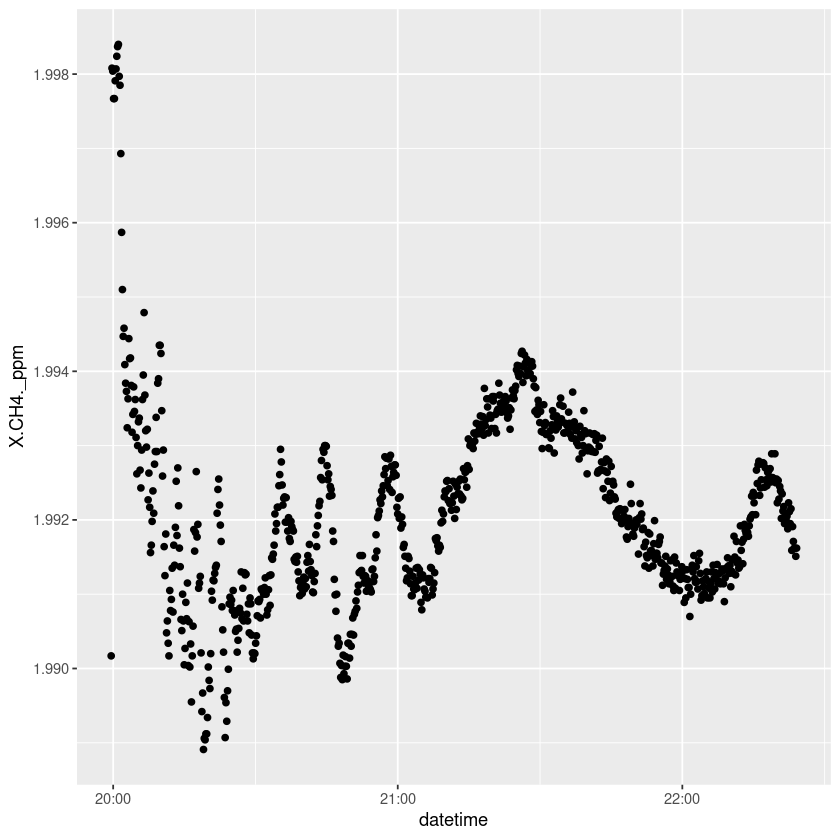

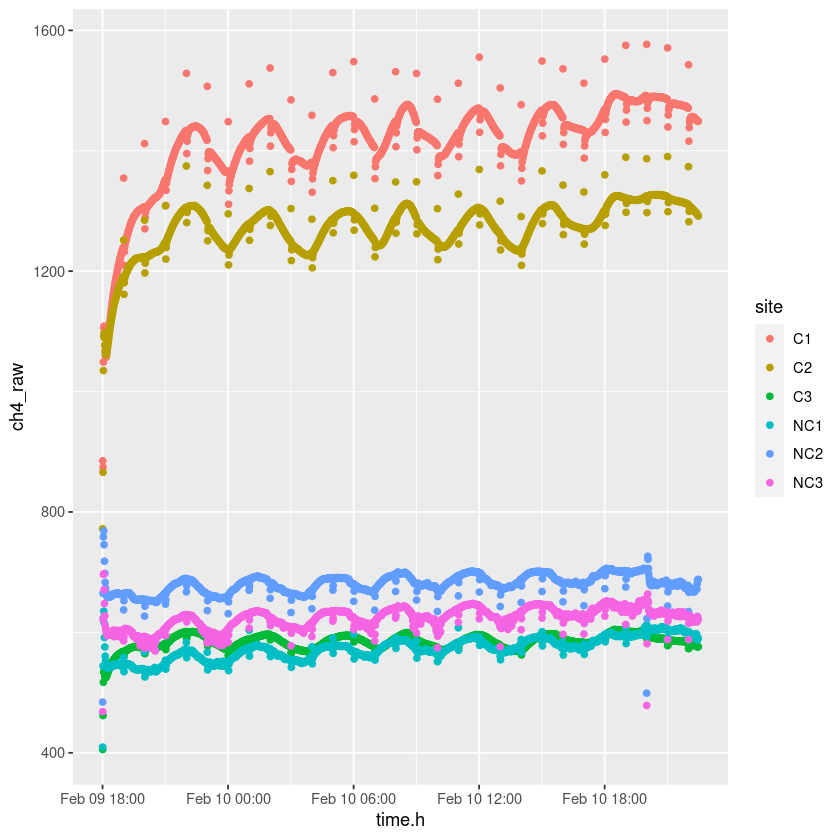

In [80]:
ggplot()+geom_point(data=df_gas_analyzer,aes(x=datetime, y=X.CH4._ppm))
ggplot()+geom_point(data=summary_processed_data, aes(x=time.h, y=ch4_raw, color=site))

In [81]:
savePlot<-function(plot, tag="", width=800, height=800, od=outputDir){
    pngPath = paste(sep="", od, tag, ".png")
    png(file=pngPath, width=width, height=height)
    print(plot)
    dev.off()
}

## Overlap data and cut out RRIV warmup section

In [82]:
# startTime <- "2023-02-02 16:00:00 UTC"
startTime <- lubridate::as_datetime(startTime)
endTime <- startTime + (1*60*60)

startTime
endTime

[1] "2023-02-10 21:00:00 UTC"

[1] "2023-02-10 22:00:00 UTC"

In [83]:
# startTime <- "2023-02-02 16:00:00 UTC" #
# startTime <- "2023-02-06 10:00:00" # 
# startTime <- "2023-02-06 10:00:00" #
# "2023-02-02 16:01:32 UTC" "2023-02-02 19:59:49 UTC"
overlap_df_gas_analyzer<-df_gas_analyzer[df_gas_analyzer$datetime > startTime &
                                         df_gas_analyzer$datetime < endTime,]
overlap_summary_processed_data<-summary_processed_data[summary_processed_data$time.h > startTime &
                                                       summary_processed_data$time.h < endTime,]

saveDFcsv(inputDF = overlap_df_gas_analyzer)
saveDFrds(inputDF = overlap_df_gas_analyzer)

saveDFcsv(inputDF = overlap_summary_processed_data)
saveDFrds(inputDF = overlap_summary_processed_data)

[1] "~/Desktop/data/mesoBinTests/20230210_calibration_roomAir/overlap_df_gas_analyzer.csv"
[1] "~/Desktop/data/mesoBinTests/20230210_calibration_roomAir/overlap_df_gas_analyzer.rds"
[1] "~/Desktop/data/mesoBinTests/20230210_calibration_roomAir/overlap_summary_processed_data.csv"
[1] "~/Desktop/data/mesoBinTests/20230210_calibration_roomAir/overlap_summary_processed_data.rds"


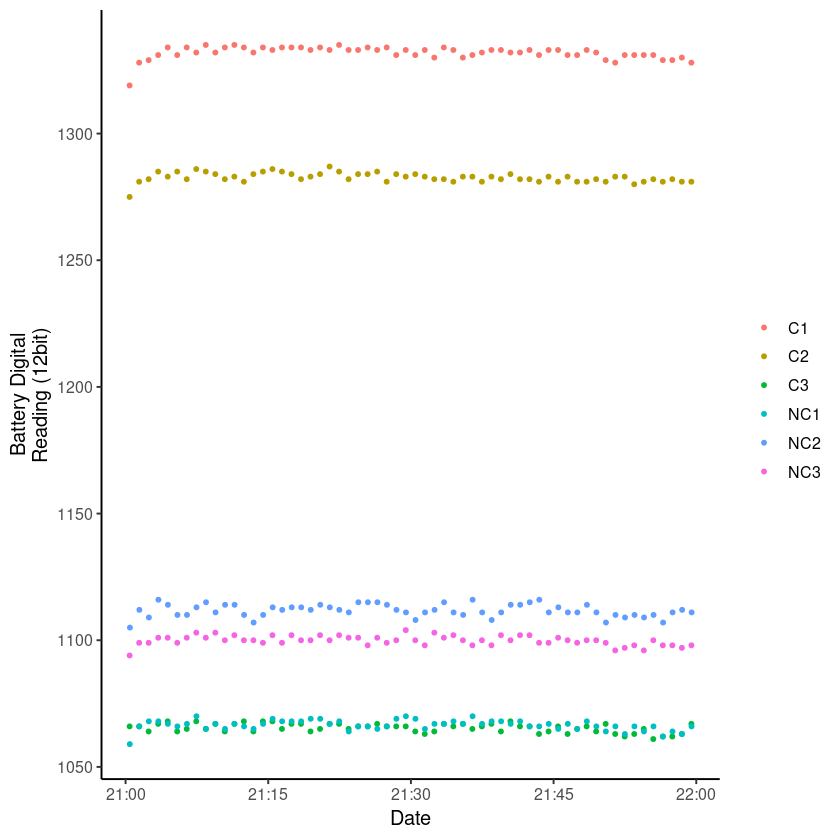

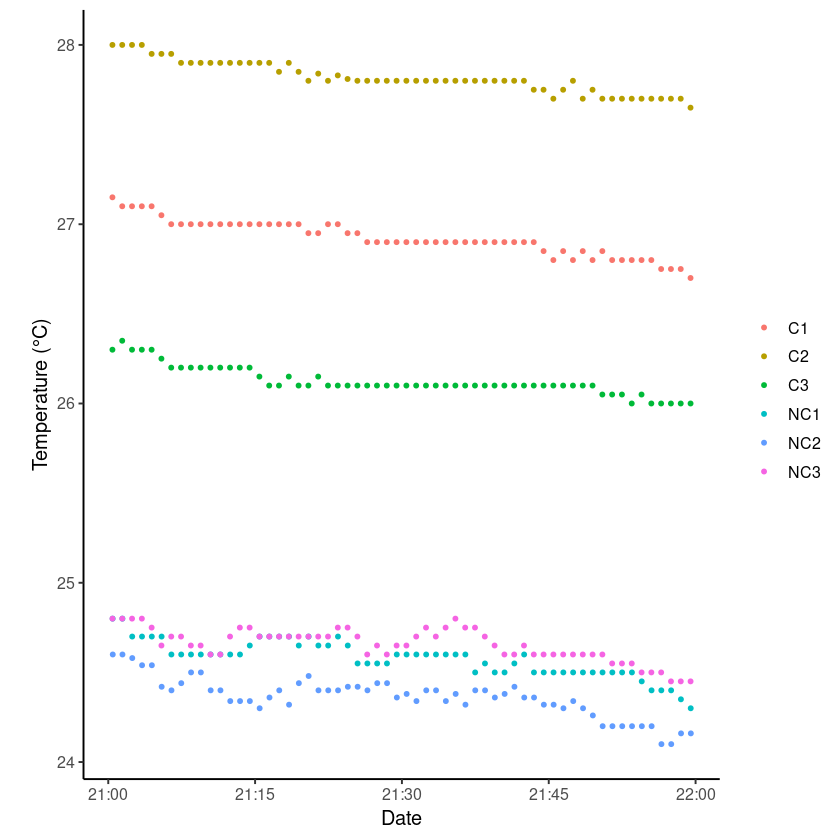

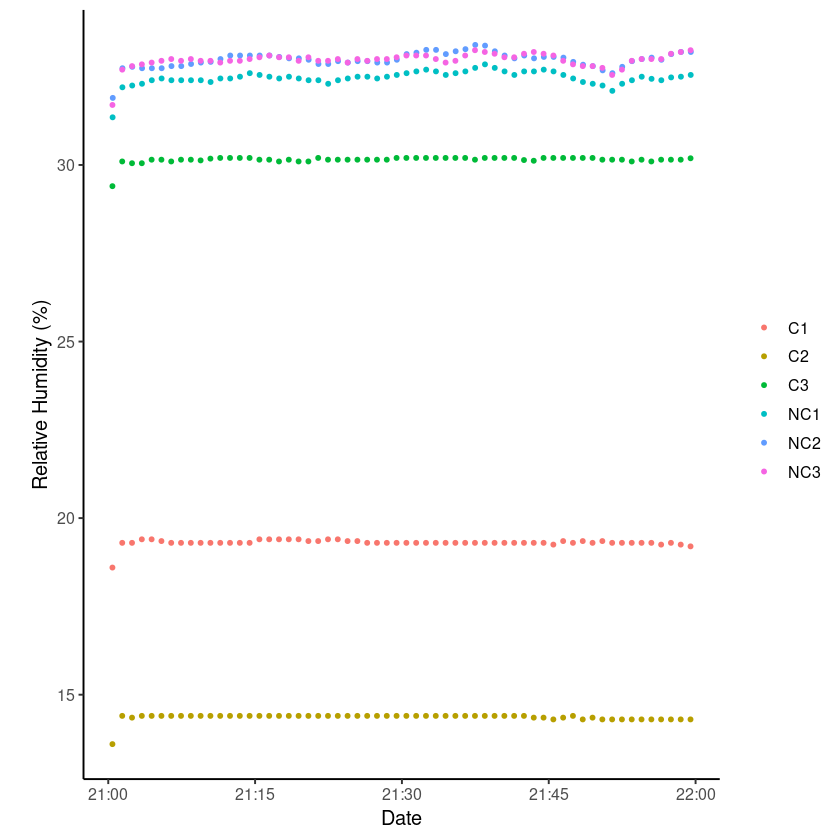

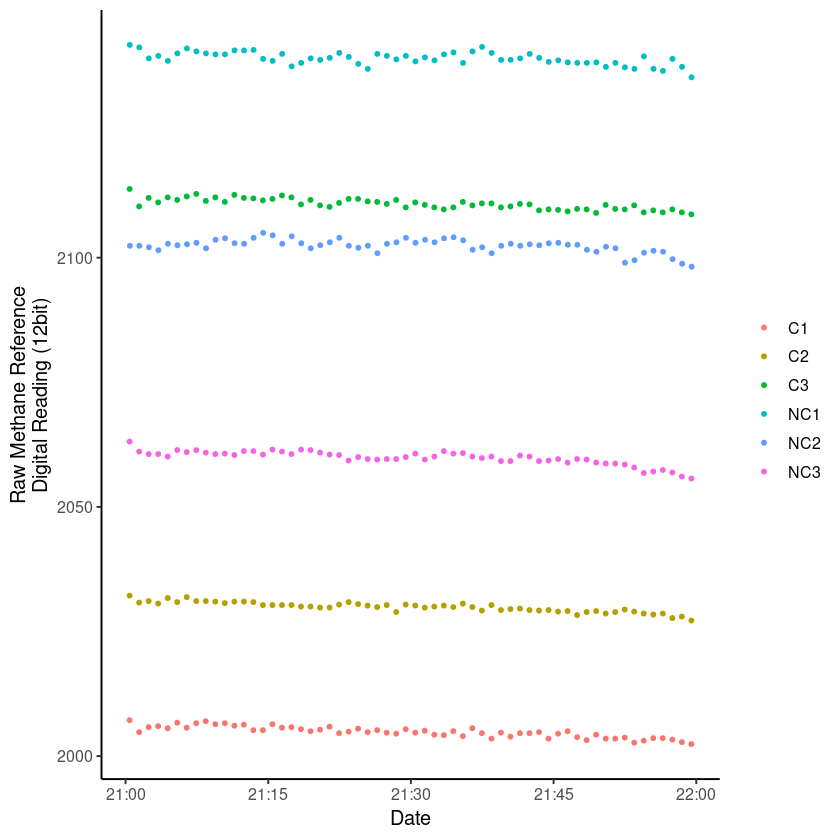

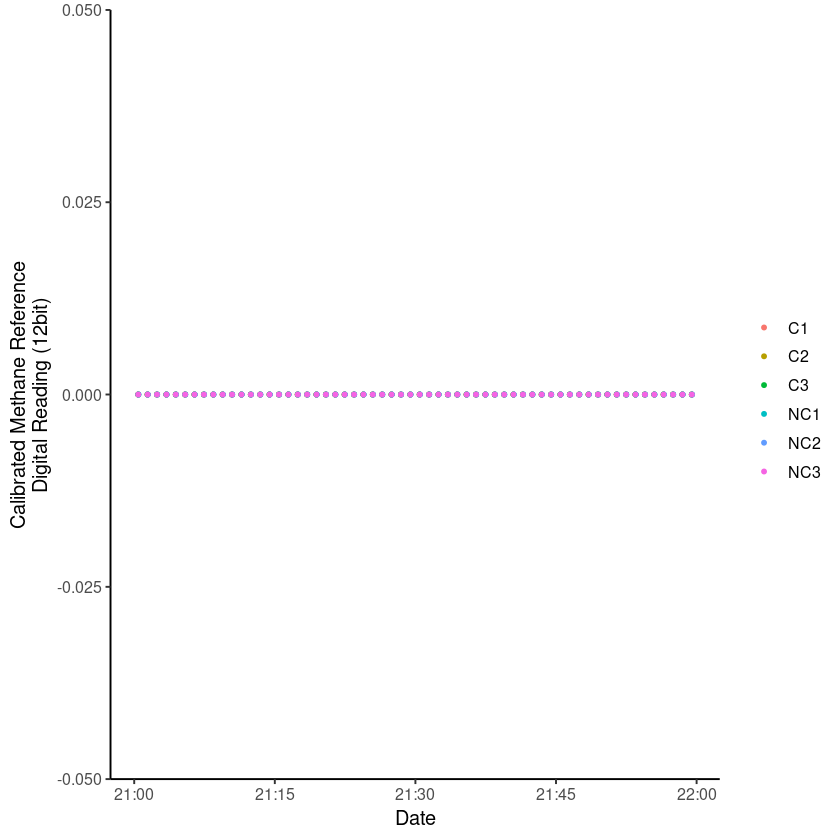

$battery.V

$dht_C

$dht_RH

$ch4rf_raw

$ch4rf_cal

$ch4_raw

$ch4_cal


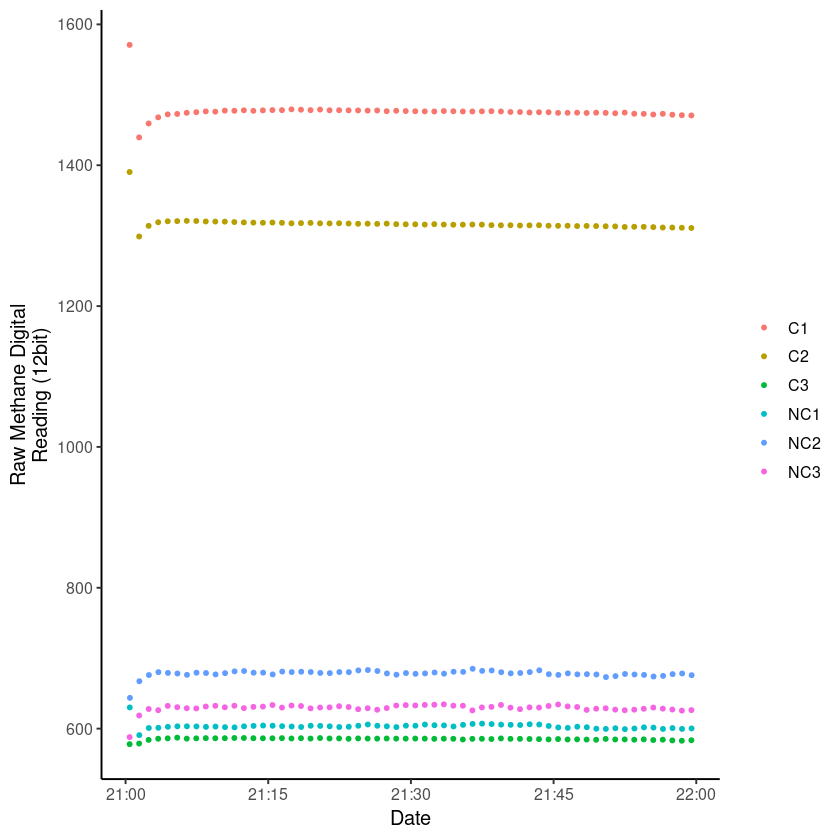

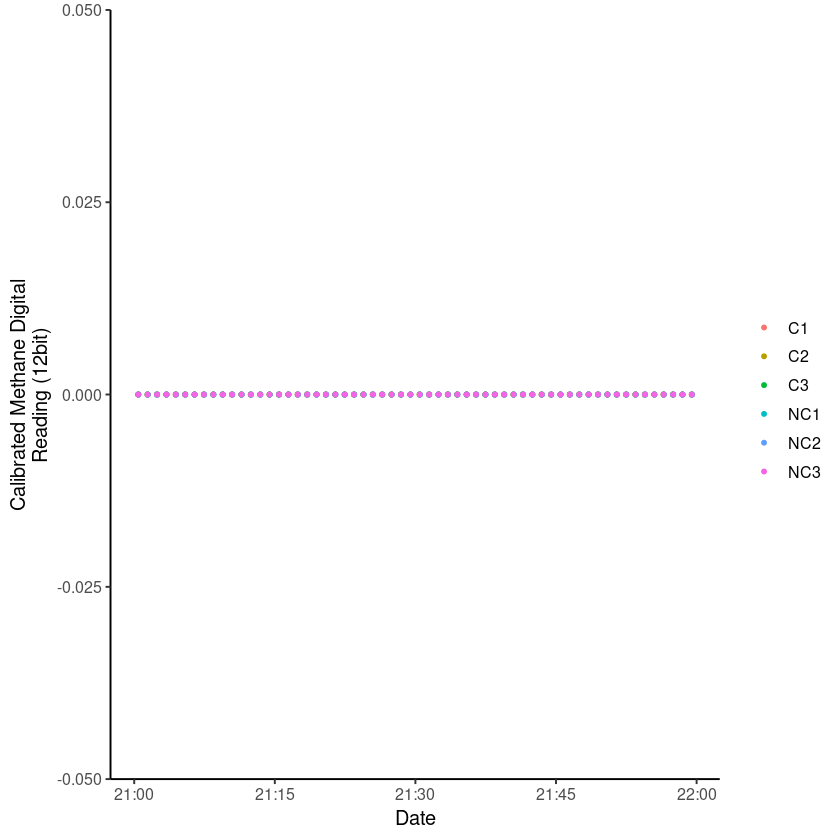

In [84]:
overlap_summaryPD_loggerPlots<-plot_Data_v_Time(overlap_summary_processed_data, "site")
overlap_summaryPD_loggerPlots

savePlotList(overlap_summaryPD_loggerPlots, "overlap_lp_all_summary_")

png 
  2

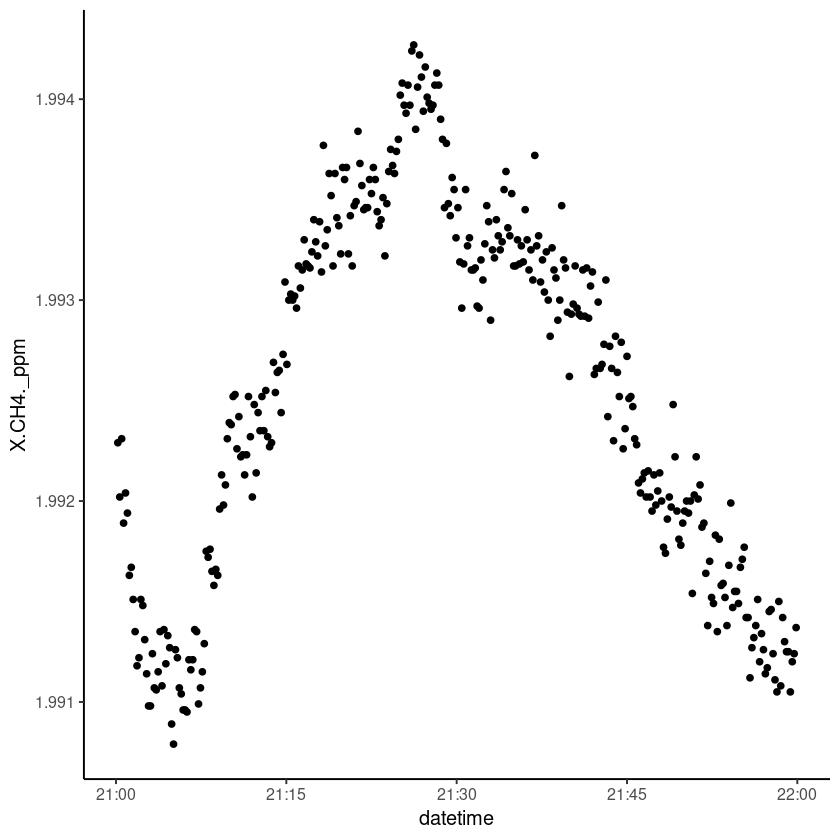

In [85]:
GA_CH4vTime<-ggplot(overlap_df_gas_analyzer,aes(x=datetime, y=X.CH4._ppm),size=1)+geom_point()+theme_classic(base_size=12)
GA_CH4vTime
savePlot(GA_CH4vTime,"GA_CH4vTime")

# Potential issues?
1. methane data shows noise whenever system sleeps, even if just a minute
2. methane data between RRIV and gas analyzer don't show matching trends
    1. could be due to lack of PTFE surface area for gas exchange
    2. could be due to thickness of PTFE
    3. could be due to trapped gases from Epoxy/PlastiDip curing
    4. could be due to bucket not being air tight at cable glands? seal with molykote or some sort of putty
    
## Test
1. calibrate sensors not in sensor case
2. devise different PTFE method, long tube method?
3. try different material, is silicone more gas permeable?

In [86]:
# # head(overlap_summary_processed_data)
# range(overlap_summary_processed_data$time.h)

# # "2023-02-02 16:01:32 UTC" "2023-02-02 19:59:49 UTC"
# startTime<-"2023-02-02 11:00:00"
# endTime<-"2023-02-02 12:00:00"
# subset_ol_sum_pd<-overlap_summary_processed_data[overlap_summary_processed_data$time.h > startTime &
#                                        overlap_summary_processed_data$time.h < endTime,]
# subset_ol_df_ga<-overlap_df_gas_analyzer[overlap_df_gas_analyzer$datetime > startTime &
#                                         overlap_df_gas_analyzer$datetime < endTime,]

# ggplot(data=subset_ol_sum_pd,aes(x=time.h, y=ch4_raw, color=site))+geom_point()

# # ggplot(data=subset_ol_sum_pd[subset_ol_sum_pd$logger=="21001",],aes(x=time.h, y=ch4_raw))+geom_point()
# # ggplot(data=subset_ol_sum_pd[subset_ol_sum_pd$logger=="21011",],aes(x=time.h, y=ch4_raw))+geom_point()
# ggplot(data=subset_ol_df_ga,aes(x=datetime, y=X.CH4._ppm))+geom_point()

# # ggplot(data=subset_ol_sum_pd[subset_ol_sum_pd$logger=="21001",],aes(x=time.h, y=dht_C))+geom_point()
# # ggplot(data=subset_ol_sum_pd[subset_ol_sum_pd$logger=="21011",],aes(x=time.h, y=dht_C))+geom_point()

# # ggplot(data=subset_ol_sum_pd[subset_ol_sum_pd$logger=="21001",],aes(x=time.h, y=dht_RH))+geom_point()
# # ggplot(data=subset_ol_sum_pd[subset_ol_sum_pd$logger=="21011",],aes(x=time.h, y=dht_RH))+geom_point()

In [87]:
# startTime<-"2023-02-02 11:00:00"
# endTime<-"2023-02-02 12:00:00"
# subset_ol_sum_pd<-overlap_summary_processed_data[overlap_summary_processed_data$time.h > startTime &
#                                        overlap_summary_processed_data$time.h < endTime,]
# subset_ol_df_ga<-overlap_df_gas_analyzer[overlap_df_gas_analyzer$datetime > startTime &
#                                         overlap_df_gas_analyzer$datetime < endTime,]

# ggplot(data=subset_ol_sum_pd,aes(x=time.h, y=ch4_raw, color=site))+geom_point()

# ggplot(data=subset_ol_df_ga,aes(x=datetime, y=X.CH4._ppm))+geom_point()

# interpolate and save data

In [88]:
# head(summary_processed_data)
#separate data from each logger, then add gas analyzer data to each merged by time stamps

#interpolate data using approx() function
overlap_summary_processed_data$ch4_ppm<-approx(x=overlap_df_gas_analyzer$datetime, y=overlap_df_gas_analyzer$X.CH4._ppm, xout=overlap_summary_processed_data$time.h)$y
interpolated_data<-overlap_summary_processed_data

head(interpolated_data)

saveDFcsv(interpolated_data)
saveDFrds(interpolated_data)

type    site logger deployment                                       
121603 summary C1   21010  floatWaterBin-57FF70068387575129270167-1675266374
121678 summary C1   21010  floatWaterBin-57FF70068387575129270167-1675266374
121753 summary C1   21010  floatWaterBin-57FF70068387575129270167-1675266374
121828 summary C1   21010  floatWaterBin-57FF70068387575129270167-1675266374
121903 summary C1   21010  floatWaterBin-57FF70068387575129270167-1675266374
121978 summary C1   21010  floatWaterBin-57FF70068387575129270167-1675266374
       deployed_at uuid                     time.s     time.h             
121603 1675266374  57FF70068387575129270167 1676062826 2023-02-10 21:00:25
121678 1675266374  57FF70068387575129270167 1676062886 2023-02-10 21:01:25
121753 1675266374  57FF70068387575129270167 1676062946 2023-02-10 21:02:25
121828 1675266374  57FF70068387575129270167 1676063006 2023-02-10 21:03:25
121903 1675266374  57FF70068387575129270167 1676063066 2023-02-10 21:04:25
121978 1675266374  57FF70068387575129270167 1676063126 2023-02-10 21:05:25
       battery.V measurementCycle burstCycle dht_C dht_RH ch4rf_raw ch4rf_cal
121603 1319      2344             1          27.15 18.60  2007.2    0        
121678 1328      2344             2          27.10 19.30  2004.8    0        
121753 1329      2344             3          27.10 19.30  2005.8    0        
121828 1331      2344             4          27.10 19.40  2006.0    0        
121903 1334      2344             5          27.10 19.40  2005.6    0        
121978 1331      2344             6          27.05 19.35  2006.7    0        
       ch4_raw ch4_cal user_note user_value ch4_ppm 
121603 1570.8  0       NA        NA         1.992183
121678 1439.5  0       NA        NA         1.991593
121753 1459.3  0       NA        NA         1.991413
121828 1468.0  0       NA        NA         1.991067
121903 1472.2  0       NA        NA         1.991222
121978 1472.8  0       NA        NA         1.991198

[1] "~/Desktop/data/mesoBinTests/20230210_calibration_roomAir/interpolated_data.csv"
[1] "~/Desktop/data/mesoBinTests/20230210_calibration_roomAir/interpolated_data.rds"


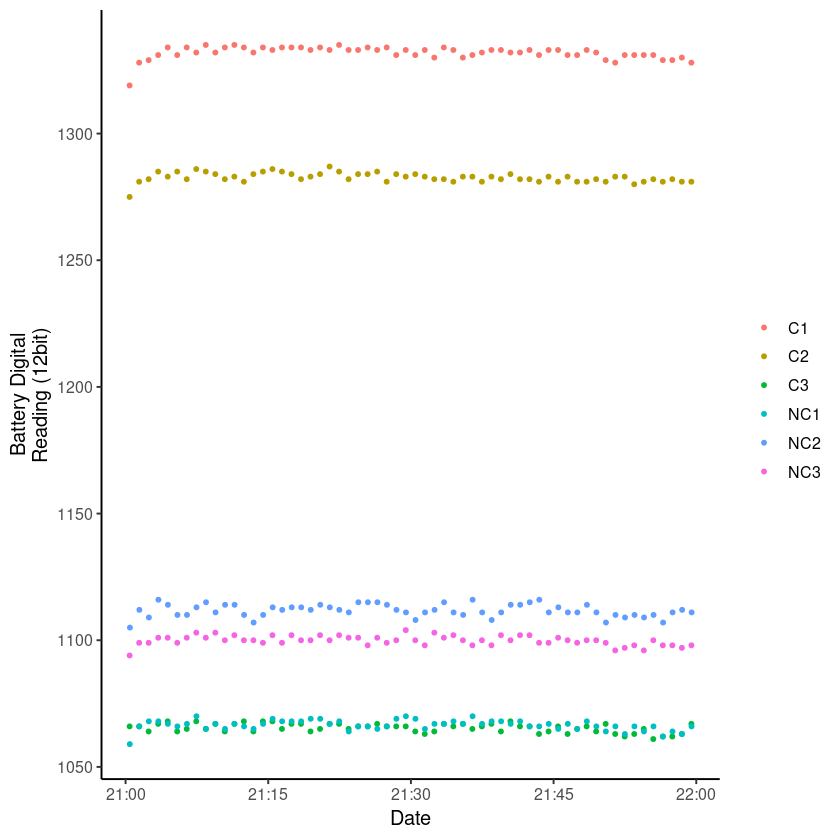

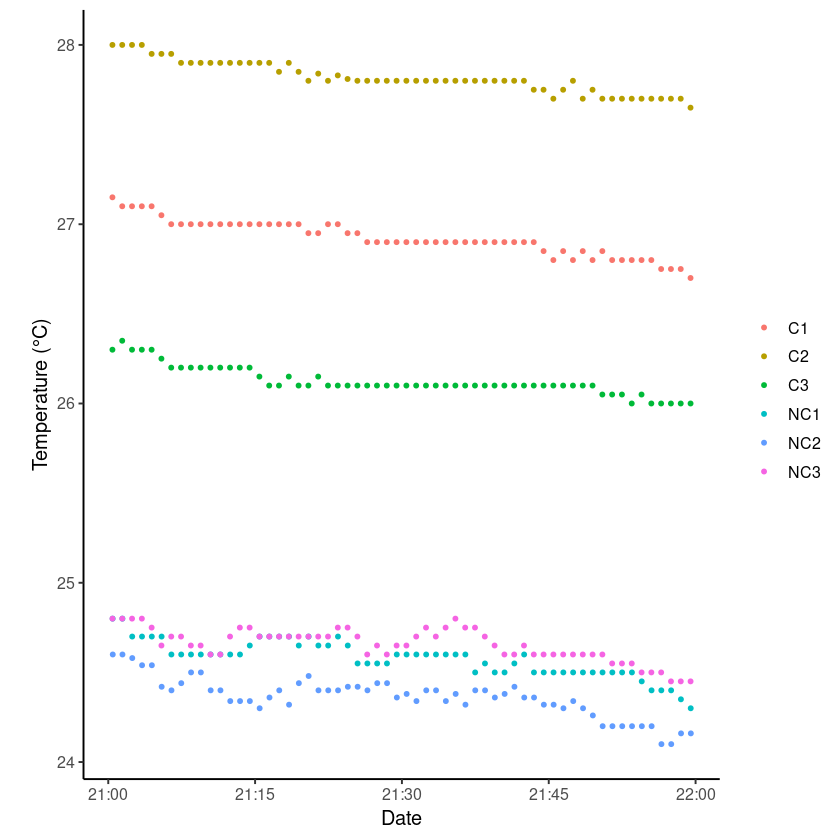

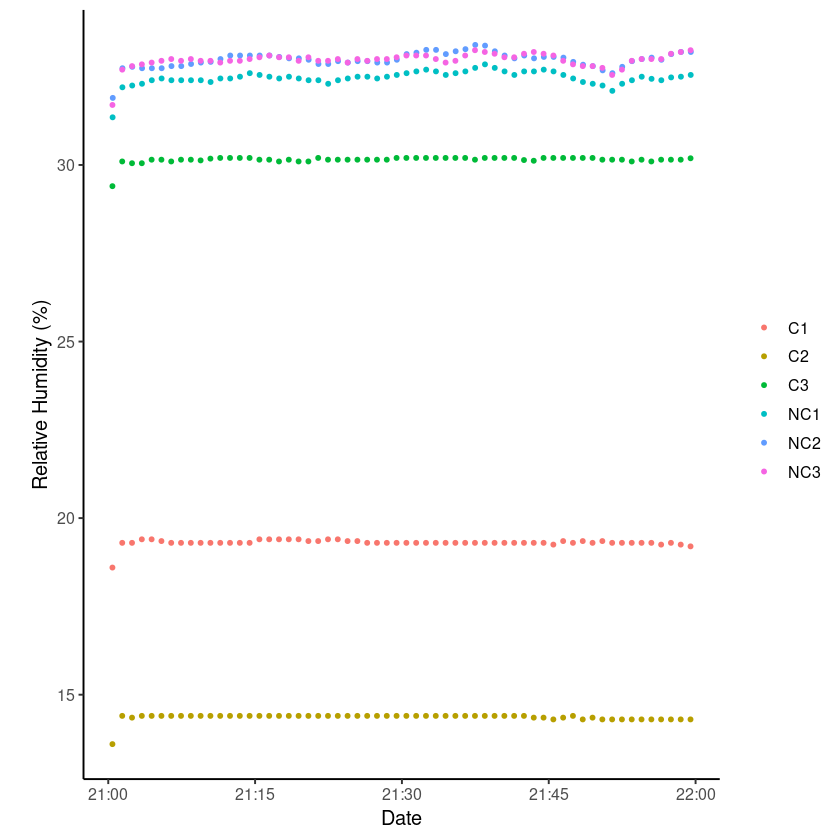

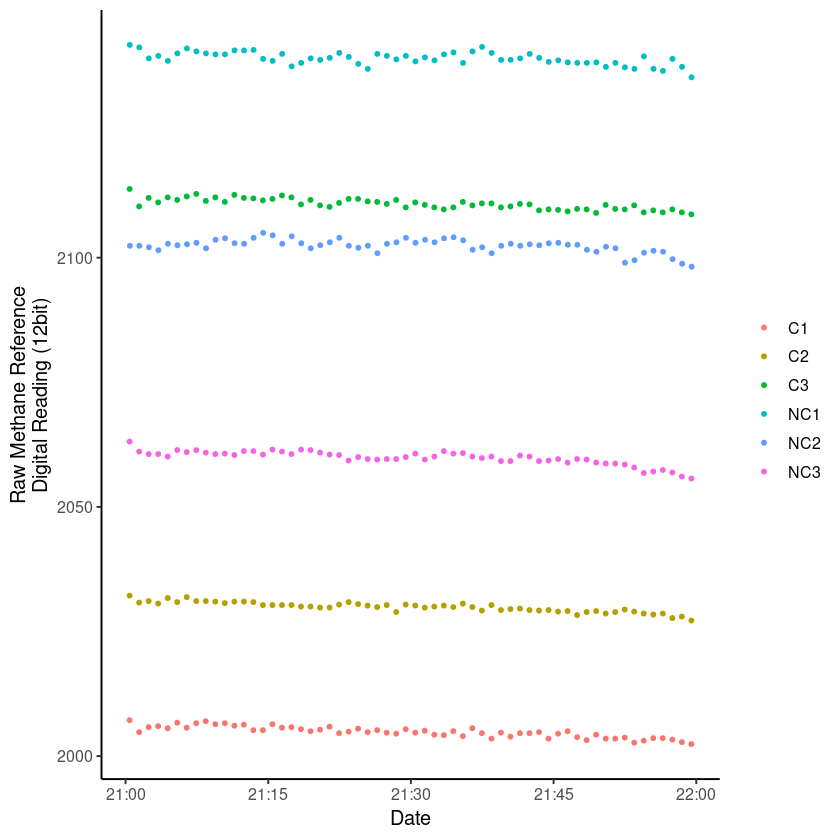

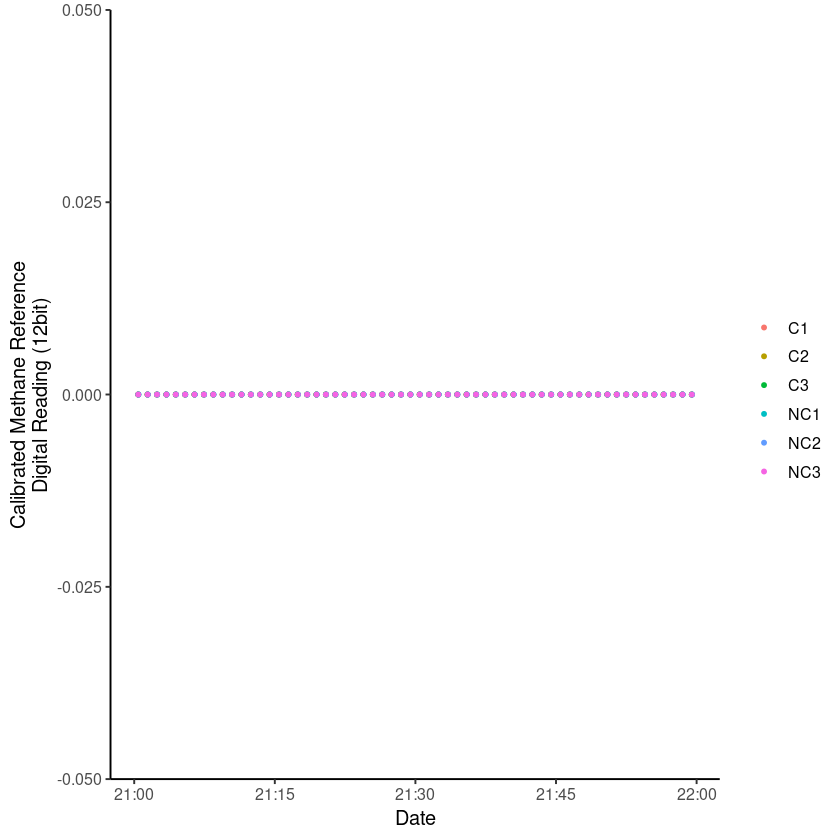

$battery.V

$dht_C

$dht_RH

$ch4rf_raw

$ch4rf_cal

$ch4_raw

$ch4_cal


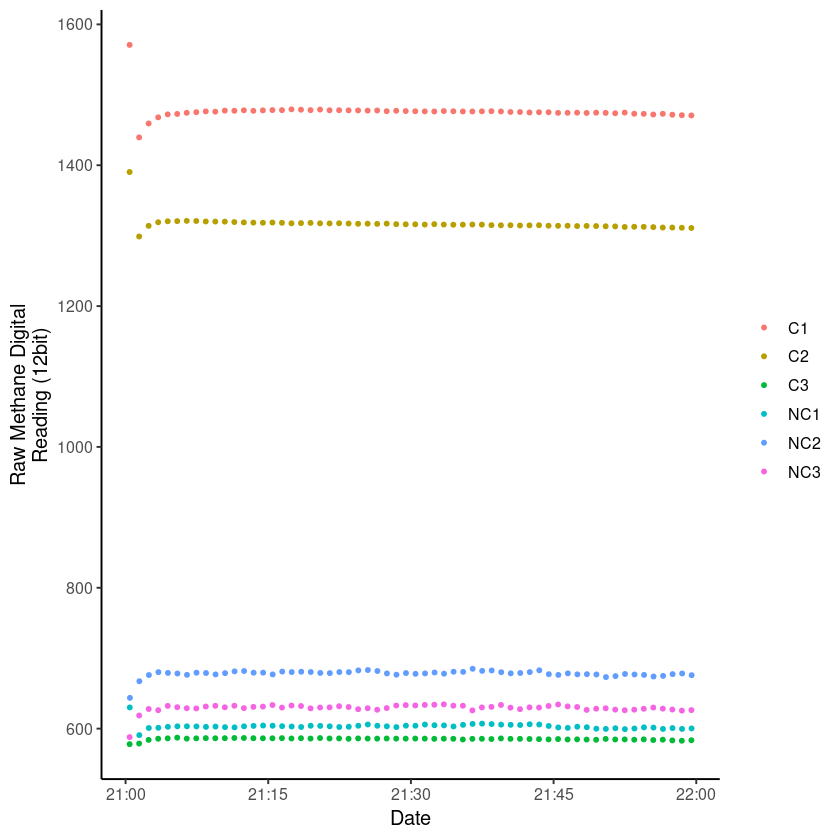

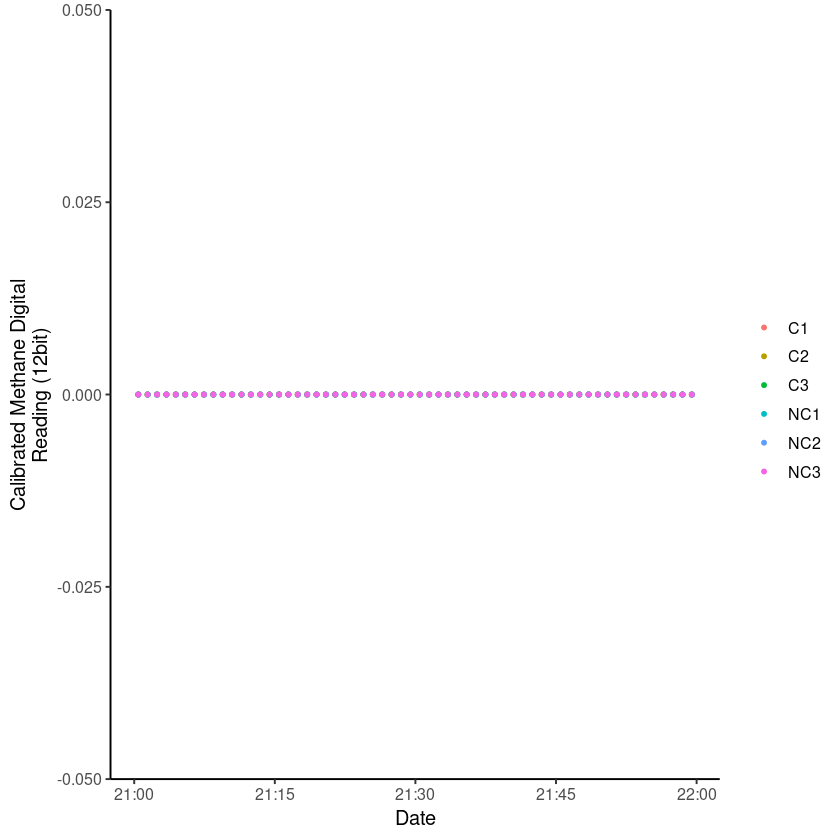

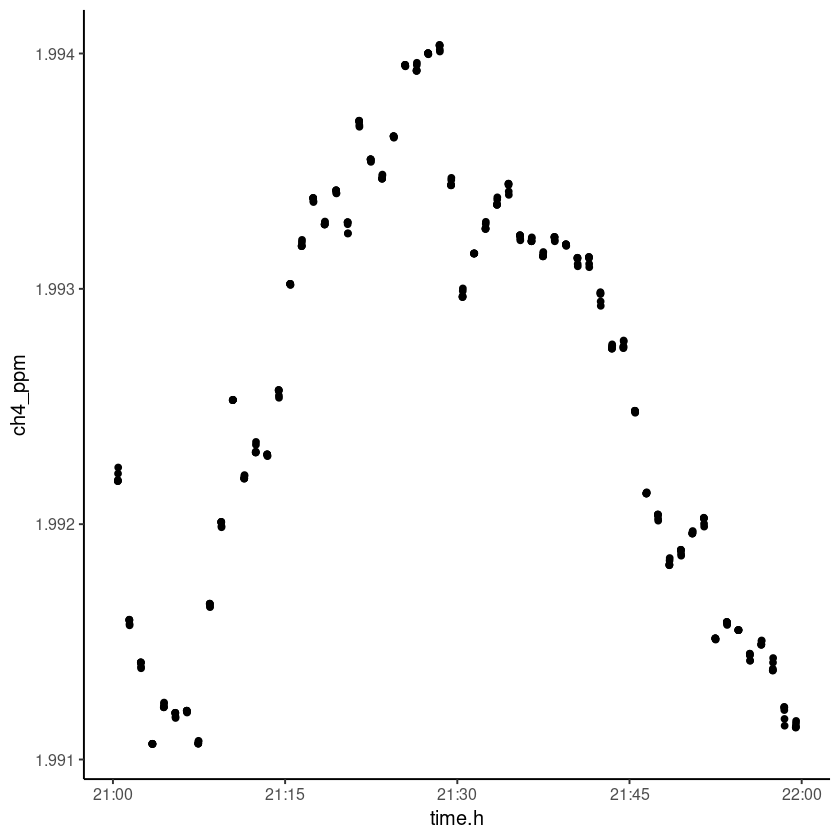

In [89]:
interpolatedPlots<-plot_Data_v_Time(interpolated_data, "site")
interpolatedPlots

interpolated_GA_CH4vTime<-ggplot(interpolated_data,aes(x=time.h, y=ch4_ppm),size=1)+geom_point()+theme_classic(base_size=12)
interpolated_GA_CH4vTime

In [90]:
# 5 min window
calibration_start <-startTime+30*60
calibration_end <-startTime+35*60

# interpolated_data$time.h > calibration_start & interpolated_data$time.h < calibration_end

calibration_data<-interpolated_data[interpolated_data$time.h > calibration_start &
                 interpolated_data$time.h < calibration_end,]

range(calibration_data$time.h)

calibration_data

saveDFcsv(calibration_data)
saveDFrds(calibration_data)

[1] "2023-02-10 21:30:27 UTC" "2023-02-10 21:34:29 UTC"

type    site logger deployment                                       
123853  summary C1   21010  floatWaterBin-57FF70068387575129270167-1675266374
123928  summary C1   21010  floatWaterBin-57FF70068387575129270167-1675266374
124003  summary C1   21010  floatWaterBin-57FF70068387575129270167-1675266374
124078  summary C1   21010  floatWaterBin-57FF70068387575129270167-1675266374
124153  summary C1   21010  floatWaterBin-57FF70068387575129270167-1675266374
1238531 summary C2   21011  floatWaterBin-57FF6C068387575136470767-1675179576
1239281 summary C2   21011  floatWaterBin-57FF6C068387575136470767-1675179576
1240031 summary C2   21011  floatWaterBin-57FF6C068387575136470767-1675179576
1240781 summary C2   21011  floatWaterBin-57FF6C068387575136470767-1675179576
1241531 summary C2   21011  floatWaterBin-57FF6C068387575136470767-1675179576
1238532 summary C3   kcdev  floatWaterBin-50FF6F068678545226521667-1675179820
1239282 summary C3   kcdev  floatWaterBin-50FF6F068678545226521667-1675179820
1240032 summary C3   kcdev  floatWaterBin-50FF6F068678545226521667-1675179820
1240782 summary C3   kcdev  floatWaterBin-50FF6F068678545226521667-1675179820
1241532 summary C3   kcdev  floatWaterBin-50FF6F068678545226521667-1675179820
1238533 summary NC1  21012  floatWaterBin-50FF6C068678545210222467-1675179416
1239283 summary NC1  21012  floatWaterBin-50FF6C068678545210222467-1675179416
1240033 summary NC1  21012  floatWaterBin-50FF6C068678545210222467-1675179416
1240783 summary NC1  21012  floatWaterBin-50FF6C068678545210222467-1675179416
1241533 summary NC1  21012  floatWaterBin-50FF6C068678545210222467-1675179416
68276   summary NC2  21013  floatWaterBin-57FF6E068387575145101167-1675179693
69026   summary NC2  21013  floatWaterBin-57FF6E068387575145101167-1675179693
69776   summary NC2  21013  floatWaterBin-57FF6E068387575145101167-1675179693
70526   summary NC2  21013  floatWaterBin-57FF6E068387575145101167-1675179693
71276   summary NC2  21013  floatWaterBin-57FF6E068387575145101167-1675179693
68278   summary NC3  21001  floatWaterBin-57FF74068387575109431367-1675179148
69028   summary NC3  21001  floatWaterBin-57FF74068387575109431367-1675179148
69778   summary NC3  21001  floatWaterBin-57FF74068387575109431367-1675179148
70528   summary NC3  21001  floatWaterBin-57FF74068387575109431367-1675179148
71278   summary NC3  21001  floatWaterBin-57FF74068387575109431367-1675179148
        deployed_at uuid                     time.s     time.h             
123853  1675266374  57FF70068387575129270167 1676064627 2023-02-10 21:30:27
123928  1675266374  57FF70068387575129270167 1676064687 2023-02-10 21:31:27
124003  1675266374  57FF70068387575129270167 1676064747 2023-02-10 21:32:27
124078  1675266374  57FF70068387575129270167 1676064807 2023-02-10 21:33:27
124153  1675266374  57FF70068387575129270167 1676064868 2023-02-10 21:34:27
1238531 1675179576  57FF6C068387575136470767 1676064627 2023-02-10 21:30:27
1239281 1675179576  57FF6C068387575136470767 1676064687 2023-02-10 21:31:27
1240031 1675179576  57FF6C068387575136470767 1676064747 2023-02-10 21:32:27
1240781 1675179576  57FF6C068387575136470767 1676064807 2023-02-10 21:33:27
1241531 1675179576  57FF6C068387575136470767 1676064868 2023-02-10 21:34:27
1238532 1675179820  50FF6F068678545226521667 1676064627 2023-02-10 21:30:27
1239282 1675179820  50FF6F068678545226521667 1676064687 2023-02-10 21:31:27
1240032 1675179820  50FF6F068678545226521667 1676064747 2023-02-10 21:32:27
1240782 1675179820  50FF6F068678545226521667 1676064807 2023-02-10 21:33:27
1241532 1675179820  50FF6F068678545226521667 1676064868 2023-02-10 21:34:27
1238533 1675179416  50FF6C068678545210222467 1676064628 2023-02-10 21:30:28
1239283 1675179416  50FF6C068678545210222467 1676064689 2023-02-10 21:31:28
1240033 1675179416  50FF6C068678545210222467 1676064749 2023-02-10 21:32:28
1240783 1675179416  50FF6C068678545210222467 1676064809 2023-02-10 21:33:28
1241533 1675179416  50FF6C068678545210222467 1676064869 2023-02-10 21:

[1] "~/Desktop/data/mesoBinTests/20230210_calibration_roomAir/calibration_data.csv"
[1] "~/Desktop/data/mesoBinTests/20230210_calibration_roomAir/calibration_data.rds"


# read in all calibration data from each calibration run

In [91]:
# new script? making Methane_Calibration.pynb

# math moving to Methane_Calibration.pynb

In [92]:
# df<-overlap_summary_processed_data
# df$dht_K<-df$dht_C+273.15

# #determine water vapor saturation point (https://www.orslabs.fr/pdf/Humidity%20Equations.pdf)
# P<-1013.25 #millibar, standard pressure ~1 atmosphere
# df$ews_mbar<-(1.0007+3.46*10^-6*P)*6.1121^(17.502*df$dht_C/(240.9+df$dht_C))
# df$ews_kPa<-df$ews_mbar/10

# # # function to lookup pressure at temperatures(https://www.nist.gov/system/files/documents/srd/NISTIR5078-Tab1.pdf)
# # # digitized version provided by University of Colorado Boulder (https://learncheme.com/student-resources/steam-tables/)
# # steamTablePath<-"~/Desktop/data/mesoBinTests/saturated_by_temperature_V1.4.csv"
# # steamTable<-read.csv(steamTablePath, skip=6, header=TRUE)
# # # TODO: need to round 0 C or below to 0.01 C, interpolate for values in between table values?
# # steamTableLookup<-function(temperature_C){
# #     return(as.numeric(steamTable[steamTable[1]==temperature_C,][2]*1000)) # 1MPa=1000kPa
# # }
# # df$PH2O_kPa<-lapply(round(df$dht_C),steamTableLookup)
# # df$PH2O_kPa<-as.numeric(df$PH2O_kPa)
# # # df[c("dht_C","PH2O_kPa")]

# #convert relative humidity to molar PPM (https://www.learnthermo.com/examples/ch02/p-2d-9.php)
# # note: assuming 1 atmosphere, 101.325 kPa, and volume of 1
# # df$H2O_mol<-df$dht_RH*df$PH2O_kPa/101.325

# df$H2O_mol<-df$dht_RH*df$ews_kPa/101.325
# df$BDA_mol<-1-df$H2O_mol #mass of dry air

# MW_H2O<-18.01528
# MW_BDA<-28.97

# df$MW_gas<-df$BDA_mol*MW_BDA+df$H2O_mol*MW_H2O


# #vaisala absolute humidity equation (https://www.hatchability.com/Vaisala.pdf)
# C<-2.16679 #gK/J
# # df$aH_gm3<-C*df$PH2O_kPa*(df$dht_RH/100)*1000/(273.15+df$dht_C)
# df$aH_gm3<-C*df$ews_kPa*(df$dht_RH/100)*1000/(273.15+df$dht_C)

# df

In [93]:
#separate data for each logger

# data_21001<-overlap_summary_processed_data[overlap_summary_processed_data$logger=="21001",]
# data_21011<-overlap_summary_processed_data[overlap_summary_processed_data$logger=="21011",]

In [94]:
# summary_processed_data$ch4_ppm

In [95]:
# # ggplot(data=summary_processed_data)+geom_point(color='blue',aes(x=time.h, y=ch4_raw))
# # ggplot(data=summary_processed_data)+geom_point(color='red',aes(x=time.h, y=ch4_ppm))

# # df_gas_analyzer$X.CH4._ppm-raw
# ggplot()+geom_point(data=df_gas_analyzer[df_gas_analyzer$datetime > "2023-01-19 00:00:00 UTC",],aes(x=datetime, y=X.CH4._ppm))
# ggplot()+geom_point(data=summary_processed_data[summary_processed_data$time.h > "2023-01-19 00:00:00 UTC",], aes(x=time.h, y=ch4_raw))

In [96]:
#convert dht_RH from % to ppm
#hardcode 1013 millibar standard pressure ~ 1 atmosphere
#local pressure can be pulled from Purdue's airport weather station


In [97]:
# df_gas_analyzer$datetime
# range(df_gas_analyzer$datetime, na.rm=TRUE)
# range(summary_processed_data$time.h)

In [98]:
# df_gas_analyzer$datetime[1]
# as.numeric(df_gas_analyzer$datetime[1])

## match time range of data sets

In [99]:
# startTime<-min(df_gas_analyzer$datetime)
# endTime<-max(df_gas_analyzer$datetime)

# # subset manual cv data (not going to be relevant)
# subset_manualCVdata<-summary_manualCVdata[summary_manualCVdata$time.h > startTime &
#                                  summary_manualCVdata$time.h < endTime,]

# #subset raw lines of processed data (summary lines would be better)
# subset_raw_processed_data<-raw_processed_data[raw_processed_data$time.h > startTime &
#                                              raw_processed_data$time.h < endTime,]

# #subset summary lines of processed data
# subset_summary_processed_data<-summary_processed_data[summary_processed_data$time.h > startTime &
#                                                      summary_processed_data$time.h < endTime,]

## rudimentary plots, for general trends
note: compare to all summary lines (not raw lines either) rather than CV, since these runs are 1 minute readings, there should only be 1 warm up

In [100]:
# ggplot()+geom_point(data=df_gas_analyzer, aes(x=datetime,y=X.CH4._ppm))

# ggplot()+geom_point(data=subset_manualCVdata, aes(x=time.h, y=ch4_raw, color=logger))

# ggplot()+geom_point(data=subset_raw_processed_data, aes(x=time.h, y=ch4_raw, color=logger))

#  ggplot()+geom_point(data=subset_summary_processed_data, aes(x=time.h, y=ch4_raw, color=logger))

In [101]:
# ggplot()+geom_point(data=df_gas_analyzer, aes(x=datetime,y=X.CO2._ppm))

In [102]:
# ggplot()+geom_point(data=df_gas_analyzer, aes(x=datetime,y=GasP_torr))

In [103]:
# ggplot()+
#     geom_point(data=subset_summary_processed_data, aes(x=time.h, y=dht_C, color=logger))+
#     geom_point(data=df_gas_analyzer, aes(x=datetime,y=AmbT_C))

# ggplot()+
#     geom_point(data=summary_processed_data, aes(x=time.h, y=dht_C, color=logger))+
#     geom_point(data=df_gas_analyzer, aes(x=datetime,y=AmbT_C))


## TODO: merge gas analyzer with RRIV data based on timestamps, then plot values together

Then need to fit a calibration equation that includes temperature, relative humidity, and reference voltage effects on CH4 to calibrate